## 随机森林第一版：基于上次决策树的数据预处理的随机森林，发现其结果与决策树效果没有区别

1. 数据加载和预处理...
探索原始数据...

数据探索:

特征: 身高(cm)
  数据类型: float64
  非空值数量: 1074
  唯一值数量: 51
  前5个值: [163.0, 171.0, 182.0, 172.0, 185.0]

特征: 体重(kg)
  数据类型: float64
  非空值数量: 1073
  唯一值数量: 74
  前5个值: [51.0, 64.0, 68.0, 66.0, 80.0]

特征: 50米成绩
  数据类型: object
  非空值数量: 1067
  唯一值数量: 57
  前5个值: [7.5, 7.5, 7.8, 8.2, 8.5]
  非数值数量: 4
  非数值示例: ['×' '8，8' '7. .9']

特征: 肺活量
  数据类型: object
  非空值数量: 1067
  唯一值数量: 93
  前5个值: [2500, 3500, 4900, 4800, 5100]
  非数值数量: 1
  非数值示例: ['×']

特征: 鞋码
  数据类型: float64
  非空值数量: 1072
  唯一值数量: 24
  前5个值: [41.0, 41.0, 45.0, 42.0, 44.0]

特征: 性别 男1女0
  数据类型: object
  非空值数量: 1074
  唯一值数量: 4
  前5个值: [1, 1, 1, 1, 1]
  非数值数量: 1
  非数值示例: ['1\n\n1']

处理PCA数据...
原始数据量: 1075
目标列清洗后: 1072

处理特征: 身高(cm)
  原始数据类型: float64
  转换后缺失值数量: 1
  无法转换的示例值: [nan]
  范围过滤 [140, 220]: 移除 2 个样本
  2σ过滤 [157.6, 187.3]: 移除 42 个样本

处理特征: 体重(kg)
  原始数据类型: float64
  转换后缺失值数量: 1
  无法转换的示例值: [nan]
  范围过滤 [30, 150]: 移除 1 个样本
  2σ过滤 [42.7, 87.5]: 移除 47 个样本

处理特征: 50米成绩
  原始数据类型: object
  转换后缺失值数量: 9
  无法转换的示例值:

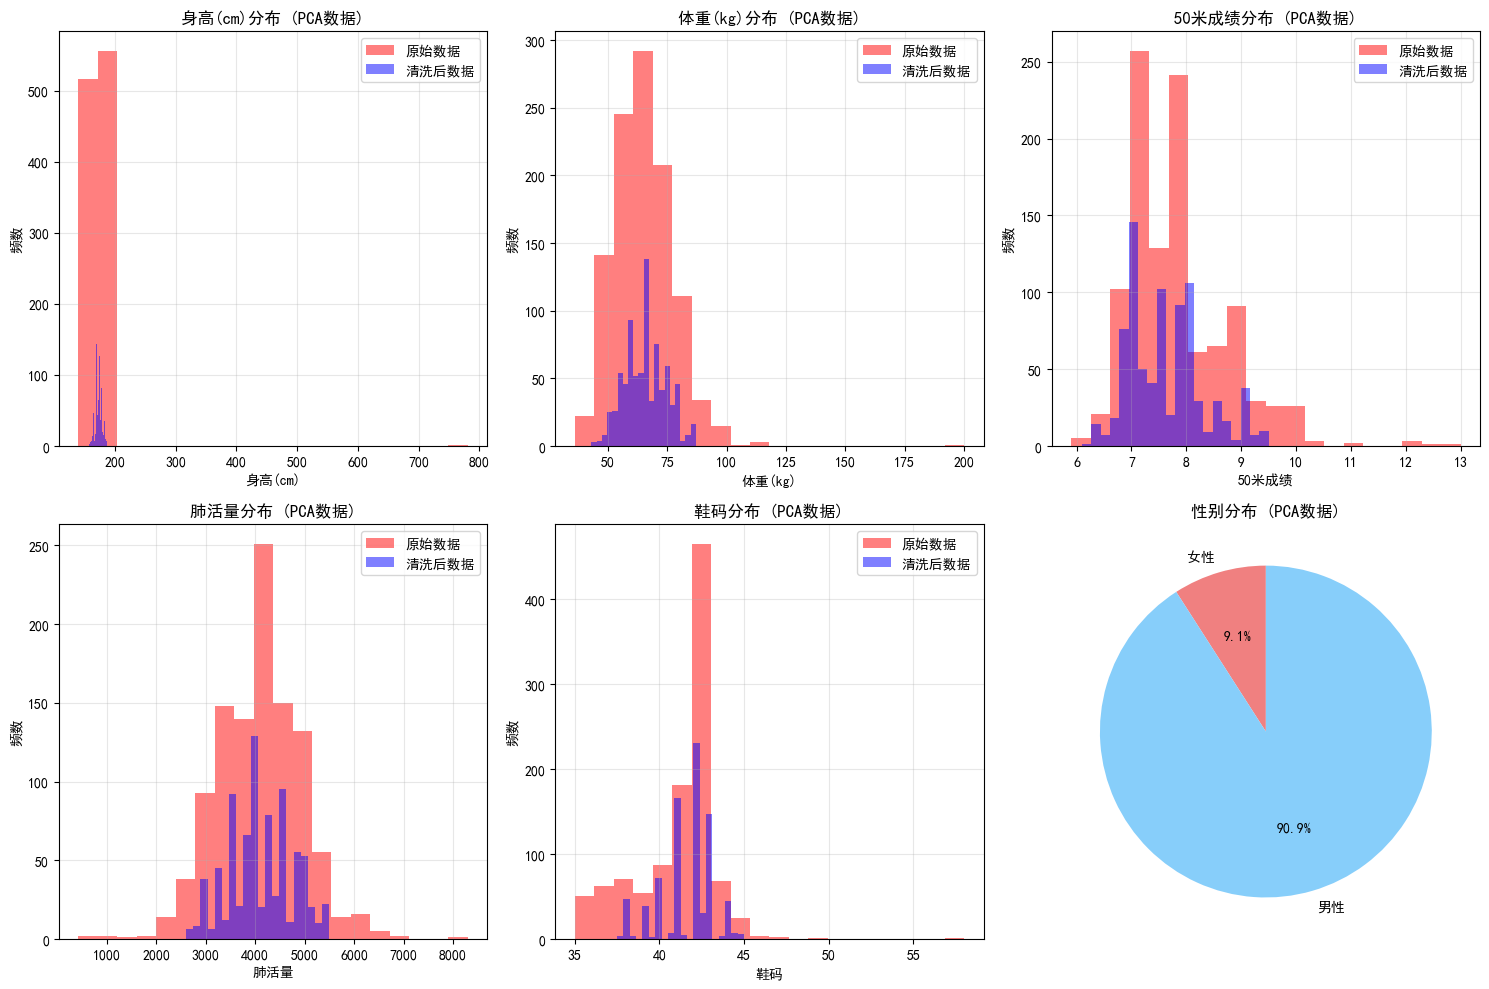

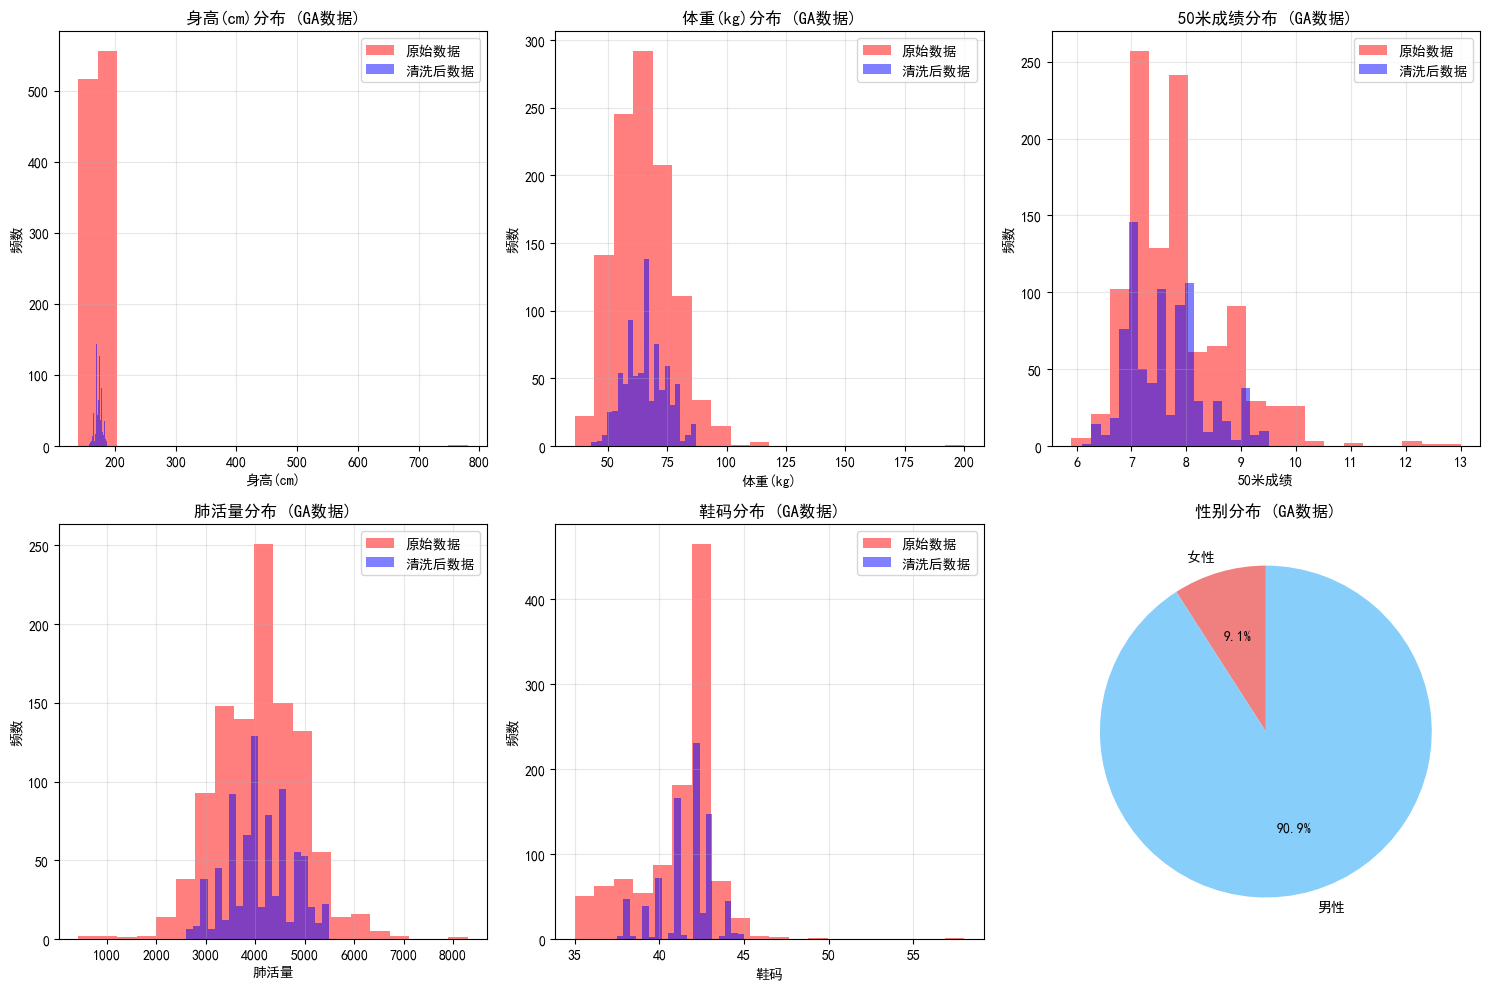


绘制异常值检测图...


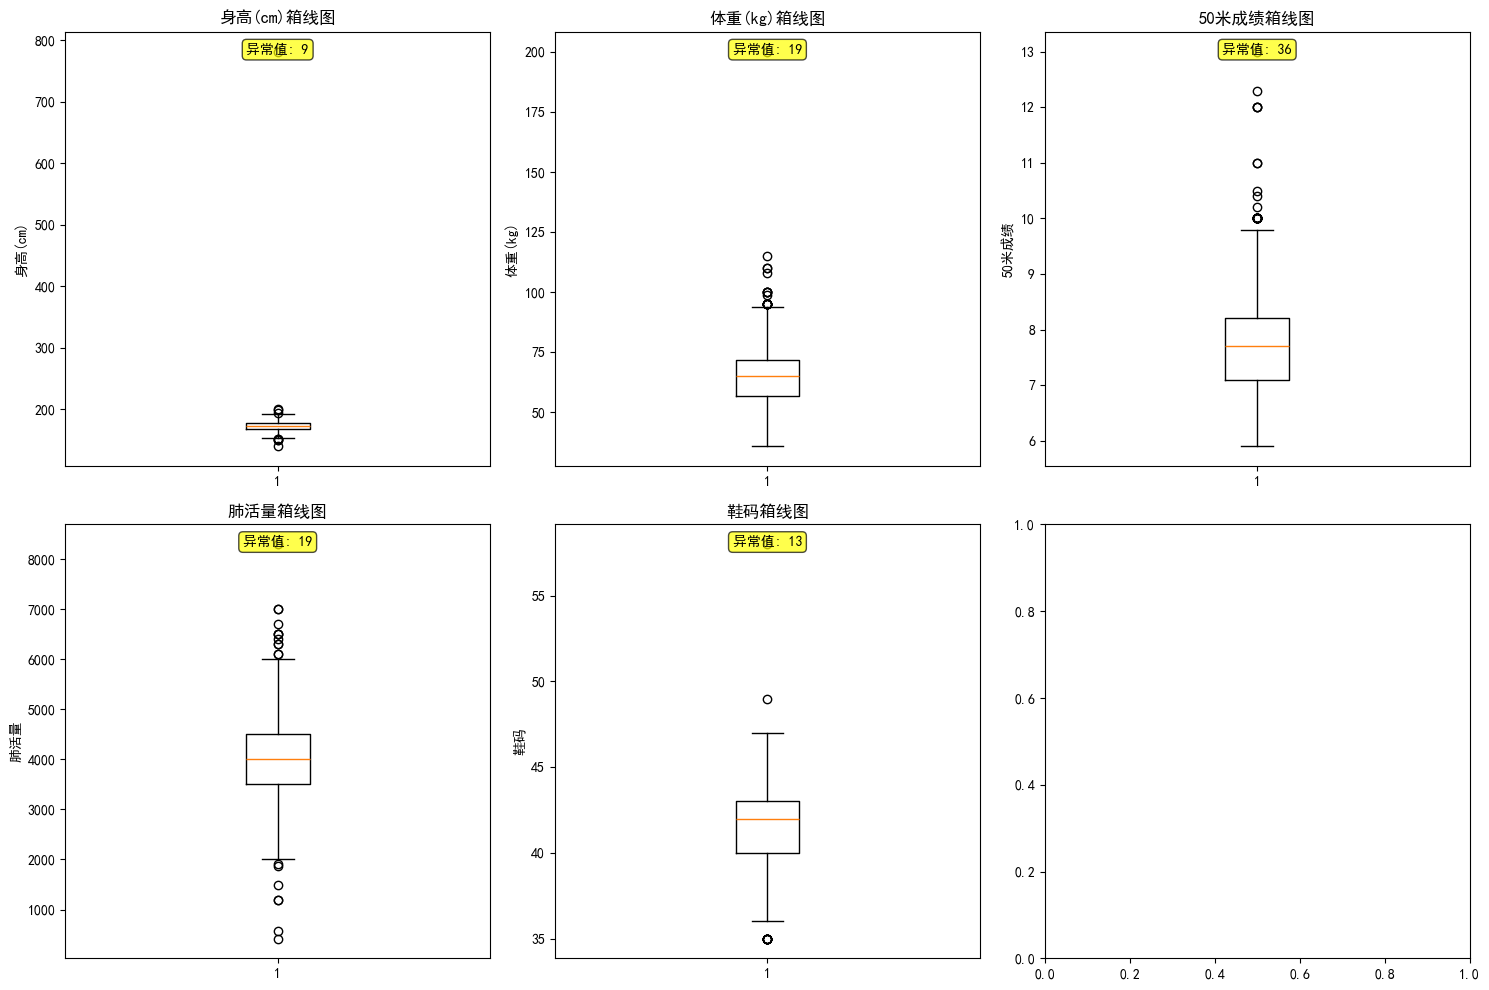


2. PCA降维与分类...
PCA性能指标:
SE (灵敏度): 0.9955
SP (特异度): 0.8182
ACC (准确率): 0.9796
AUC: 0.9908
混淆矩阵 - TP: 222, FP: 4, TN: 18, FN: 1

3. LDA降维与分类...
LDA性能指标:
SE (灵敏度): 1.0000
SP (特异度): 0.8636
ACC (准确率): 0.9878
AUC: 0.9974
混淆矩阵 - TP: 223, FP: 3, TN: 19, FN: 0

4. 遗传算法特征选择...


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 381.91it/s]

最佳个体: [0 0 0 0 1]
最佳适应度: 0.7033
选中的特征: ['鞋码']
遗传算法+决策树性能指标:
SE (灵敏度): 0.9955
SP (特异度): 0.5455
ACC (准确率): 0.9551
AUC: 0.9878
混淆矩阵 - TP: 222, FP: 10, TN: 12, FN: 1

5. 随机森林分类...


遗传算法+随机森林性能指标:
SE (灵敏度): 0.9955
SP (特异度): 0.5455
ACC (准确率): 0.9551
AUC: 0.9876
混淆矩阵 - TP: 222, FP: 10, TN: 12, FN: 1

6. 结果可视化...


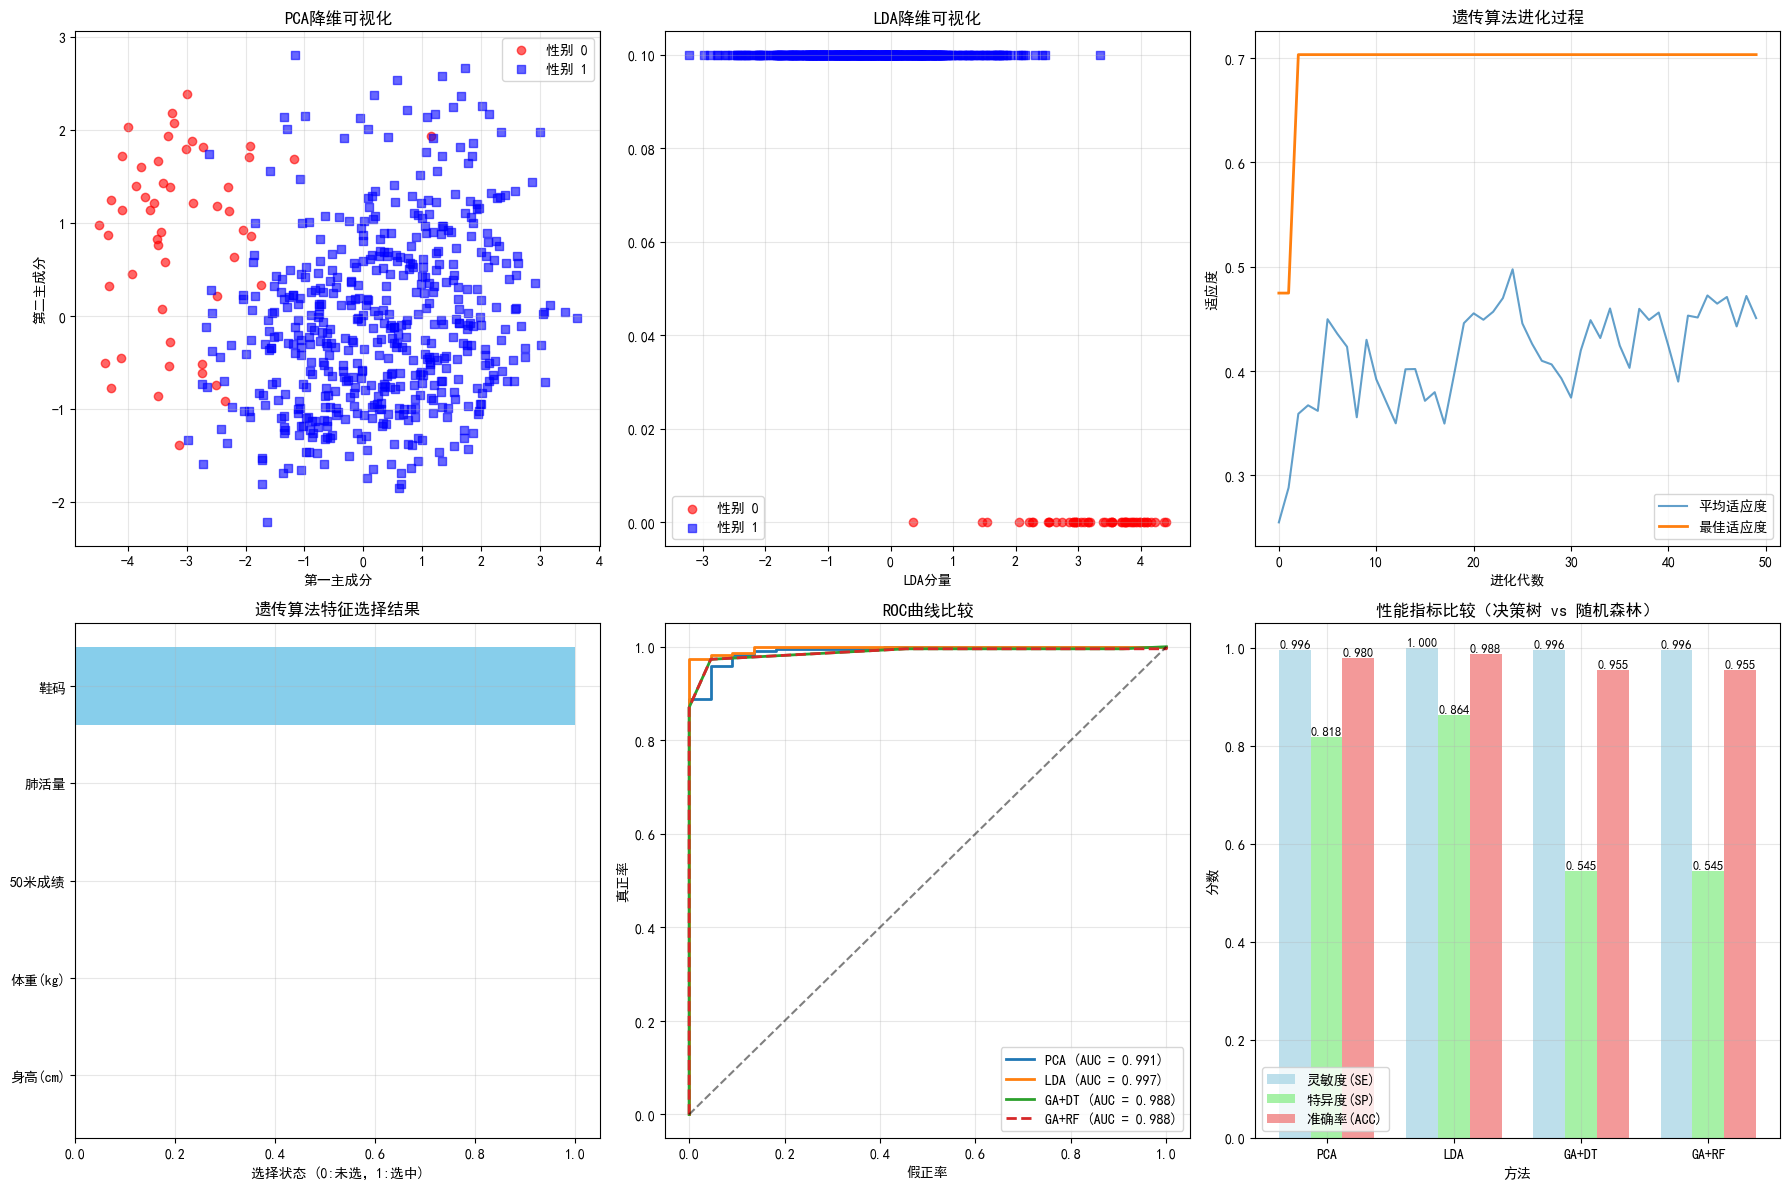


7. 决策树与随机森林详细比较...


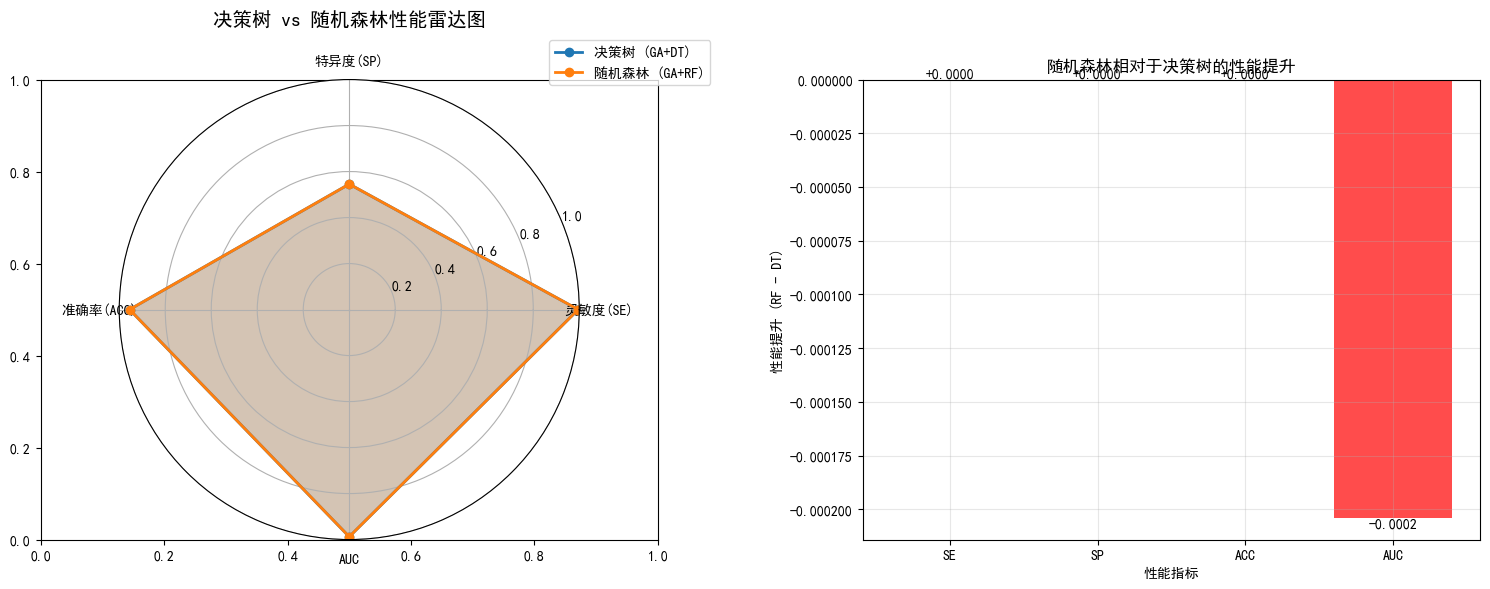


8. 数据质量分析报告...
数据清洗效果:
- 原始数据总量: 1075
- PCA数据清洗后: 815 (保留率: 75.81%)
- GA数据清洗后: 815 (保留率: 75.81%)

特征统计信息 (清洗后):
- 身高(cm): 均值=173.50, 标准差=5.54, 范围=[158.00, 187.00]
- 体重(kg): 均值=65.60, 标准差=8.60, 范围=[43.00, 87.00]
- 50米成绩: 均值=7.61, 标准差=0.68, 范围=[6.10, 9.50]
- 肺活量: 均值=4112.28, 标准差=639.46, 范围=[2600.00, 5500.00]
- 鞋码: 均值=41.55, 标准差=1.55, 范围=[37.50, 45.00]

性能对比分析:
+------------------------------------------------------------------------------+
|      方法      |    SE    |    SP    |   ACC    |   AUC    |     特征数量     |
+------------------------------------------------------------------------------+
|     PCA      |  0.996   |  0.818   |  0.980   |  0.991   |      5       |
|     LDA      |  1.000   |  0.864   |  0.988   |  0.997   |      5       |
|    GA+DT     |  0.996   |  0.545   |  0.955   |  0.988   |      1       |
|    GA+RF     |  0.996   |  0.545   |  0.955   |  0.988   |      1       |
+------------------------------------------------------------------------------+

决策树与随机森林详细对比:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
from tqdm import tqdm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 改进的数据清洗函数 - 修复索引问题
def clean_data_improved(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    print(f"原始数据量: {len(data_clean)}")
    
    # 处理目标列 - 更健壮的类型转换
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    # 处理可能的字符串值（如'男'、'女'）
    if data_clean[target_col].isna().any():
        # 尝试将字符串映射为数值
        gender_mapping = {'男': 1, '女': 0, 'Male': 1, 'Female': 0, 'M': 1, 'F': 0}
        for key, value in gender_mapping.items():
            mask = data_clean[target_col].astype(str).str.contains(key, case=False, na=False)
            data_clean.loc[mask, target_col] = value
    
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    print(f"目标列清洗后: {len(data_clean)}")
    
    # 定义合理的特征范围（基于常识和实际数据分布）
    feature_ranges = {
        "身高(cm)": (140, 220),      # 合理身高范围 1.4m - 2.2m
        "体重(kg)": (30, 150),       # 合理体重范围
        "50米成绩": (5, 15),         # 合理50米成绩范围（秒）
        "肺活量": (1000, 7000),      # 合理肺活量范围（ml）
        "鞋码": (30, 50)            # 合理鞋码范围
    }
    
    # 处理特征列 - 增强类型转换
    for feature in features:
        print(f"\n处理特征: {feature}")
        
        # 转换为数值类型 - 更健壮的处理
        original_dtype = data_clean[feature].dtype
        print(f"  原始数据类型: {original_dtype}")
        
        # 保存转换前的值用于错误报告
        original_values = data_clean[feature].copy()
        
        # 尝试多种转换方式
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        
        # 统计转换前后的缺失值
        missing_before = data_clean[feature].isna().sum()
        print(f"  转换后缺失值数量: {missing_before}")
        
        if missing_before > 0:
            # 显示一些无法转换的值 - 修复索引问题
            problematic_mask = data_clean[feature].isna()
            if problematic_mask.any():
                problematic_indices = problematic_mask[problematic_mask].index[:5]
                problematic_values = [original_values.loc[i] for i in problematic_indices]
                print(f"  无法转换的示例值: {problematic_values}")
        
        # 方法1：基于合理范围过滤异常值
        if feature in feature_ranges:
            min_val, max_val = feature_ranges[feature]
            before_filter = len(data_clean)
            valid_mask = (data_clean[feature] >= min_val) & (data_clean[feature] <= max_val)
            data_clean = data_clean[valid_mask]
            after_filter = len(data_clean)
            print(f"  范围过滤 [{min_val}, {max_val}]: 移除 {before_filter - after_filter} 个样本")
        
        # 方法2：3σ原则过滤极端异常值（在合理范围内进一步过滤）
        if feature in feature_ranges and len(data_clean) > 0:
            feature_data = data_clean[feature]
            mean = feature_data.mean()
            std = feature_data.std()
            
            # 使用更严格的2σ原则（在合理范围内）
            lower_bound = max(feature_ranges[feature][0], mean - 2*std)
            upper_bound = min(feature_ranges[feature][1], mean + 2*std)
            
            before_filter = len(data_clean)
            valid_mask = (data_clean[feature] >= lower_bound) & (data_clean[feature] <= upper_bound)
            data_clean = data_clean[valid_mask]
            after_filter = len(data_clean)
            print(f"  2σ过滤 [{lower_bound:.1f}, {upper_bound:.1f}]: 移除 {before_filter - after_filter} 个样本")
    
    # 删除任何特征或目标列的缺失值
    before_dropna = len(data_clean)
    data_clean = data_clean.dropna(subset=features + [target_col])
    after_dropna = len(data_clean)
    print(f"\n删除缺失值: 移除 {before_dropna - after_dropna} 个样本")
    print(f"最终清洗后数据量: {len(data_clean)}")
    print(f"数据保留率: {len(data_clean)/len(data)*100:.2f}%")
    
    return data_clean

# 改进的数据分布可视化函数 - 处理类型转换问题
def plot_data_distribution(data_clean, data_original, features, title_suffix=""):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(features):
        if i < len(axes):
            try:
                # 确保原始数据是数值类型
                original_data = pd.to_numeric(data_original[feature], errors='coerce').dropna()
                clean_data = data_clean[feature]
                
                # 绘制清洗前后的数据分布对比
                axes[i].hist(original_data, alpha=0.5, label='原始数据', bins=20, color='red')
                axes[i].hist(clean_data, alpha=0.5, label='清洗后数据', bins=20, color='blue')
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('频数')
                axes[i].set_title(f'{feature}分布{title_suffix}')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)
            except Exception as e:
                print(f"绘制 {feature} 分布图时出错: {e}")
                axes[i].text(0.5, 0.5, f'无法绘制\n{feature}', 
                            transform=axes[i].transAxes, ha='center', va='center')
                axes[i].set_title(f'{feature}分布{title_suffix}')
    
    # 男女比例饼图
    try:
        gender_counts = data_clean['性别 男1女0'].value_counts()
        labels = ['女性', '男性']
        sizes = [gender_counts.get(0, 0), gender_counts.get(1, 0)]
        colors = ['lightcoral', 'lightskyblue']
        
        axes[5].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[5].set_title(f'性别分布{title_suffix}')
    except Exception as e:
        print(f"绘制性别分布图时出错: {e}")
        axes[5].text(0.5, 0.5, '无法绘制性别分布', 
                    transform=axes[5].transAxes, ha='center', va='center')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# 改进的异常值检测可视化 - 处理类型转换问题
def plot_outlier_detection(data, features):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(features):
        if i < len(axes):
            try:
                # 确保数据是数值类型
                data_boxplot = pd.to_numeric(data[feature], errors='coerce').dropna()
                
                if len(data_boxplot) > 0:
                    axes[i].boxplot(data_boxplot)
                    axes[i].set_title(f'{feature}箱线图')
                    axes[i].set_ylabel(feature)
                    
                    # 标记异常值范围
                    Q1 = data_boxplot.quantile(0.25)
                    Q3 = data_boxplot.quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    
                    # 统计异常值数量
                    outliers = data_boxplot[(data_boxplot < lower_bound) | (data_boxplot > upper_bound)]
                    axes[i].text(0.5, 0.95, f'异常值: {len(outliers)}', 
                                transform=axes[i].transAxes, ha='center', 
                                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
                else:
                    axes[i].text(0.5, 0.5, '无有效数据', 
                                transform=axes[i].transAxes, ha='center', va='center')
                    axes[i].set_title(f'{feature}箱线图')
            except Exception as e:
                print(f"绘制 {feature} 箱线图时出错: {e}")
                axes[i].text(0.5, 0.5, f'无法绘制\n{feature}', 
                            transform=axes[i].transAxes, ha='center', va='center')
                axes[i].set_title(f'{feature}箱线图')
    
    plt.tight_layout()
    plt.show()

# 数据探索函数 - 检查数据类型和内容
def explore_data(data, features):
    print("\n数据探索:")
    print("="*50)
    for feature in features:
        print(f"\n特征: {feature}")
        print(f"  数据类型: {data[feature].dtype}")
        print(f"  非空值数量: {data[feature].count()}")
        print(f"  唯一值数量: {data[feature].nunique()}")
        print(f"  前5个值: {data[feature].head().tolist()}")
        
        # 检查是否包含非数值
        non_numeric = data[feature].apply(lambda x: not isinstance(x, (int, float))).sum()
        if non_numeric > 0:
            print(f"  非数值数量: {non_numeric}")
            # 显示一些非数值示例
            non_numeric_mask = data[feature].apply(lambda x: not isinstance(x, (int, float)))
            non_numeric_examples = data[feature][non_numeric_mask].unique()[:3]
            print(f"  非数值示例: {non_numeric_examples}")

# 首先探索原始数据
print("探索原始数据...")
explore_data(data, features_pca + ['性别 男1女0'])

# 分别处理PCA和遗传算法数据（使用改进的清洗函数）
print("\n处理PCA数据...")
data_pca = clean_data_improved(data, features_pca)

print("\n处理遗传算法数据...")
data_ga = clean_data_improved(data, features_ga)

# 数据基本信息输出
print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)} ({len(data_pca)/len(data)*100:.1f}%)")
print(f"清洗后遗传算法样本数: {len(data_ga)} ({len(data_ga)/len(data)*100:.1f}%)")
if len(data_pca) > 0:
    print(f"男女比例 - 男: {sum(data_pca['性别 男1女0']==1)}, 女: {sum(data_pca['性别 男1女0']==0)}")

# 数据分布可视化
if len(data_pca) > 0 and len(data_ga) > 0:
    print("\n绘制数据分布图...")
    plot_data_distribution(data_pca, data, features_pca, " (PCA数据)")
    plot_data_distribution(data_ga, data, features_ga, " (GA数据)")

    # 异常值检测可视化
    print("\n绘制异常值检测图...")
    plot_outlier_detection(data, features_pca)
else:
    print("\n数据清洗后样本数为0，跳过可视化")

# 如果清洗后数据为空，则跳过后续分析
if len(data_pca) == 0 or len(data_ga) == 0:
    print("数据清洗后样本数为0，无法进行后续分析")
    exit()

# 2. PCA降维与分类
print("\n2. PCA降维与分类...")

# PCA数据准备
X_pca = data_pca[features_pca].values
y_pca = data_pca['性别 男1女0'].values

# 数据标准化
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

# 划分训练测试集
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_scaled, y_pca, test_size=0.3, random_state=42, stratify=y_pca)

# PCA降维
pca = PCA(n_components=2)
X_train_pca_reduced = pca.fit_transform(X_train_pca)
X_test_pca_reduced = pca.transform(X_test_pca)

# PCA分类
classifier_pca = LogisticRegression(random_state=42)
classifier_pca.fit(X_train_pca_reduced, y_train_pca)
y_pred_pca = classifier_pca.predict(X_test_pca_reduced)
y_prob_pca = classifier_pca.predict_proba(X_test_pca_reduced)[:, 1]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)  # 灵敏度
    SP = tn / (tn + fp)  # 特异度
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

SE_pca, SP_pca, ACC_pca, AUC_pca, fpr_pca, tpr_pca, tn_pca, fp_pca, fn_pca, tp_pca = calculate_metrics(
    y_test_pca, y_pred_pca, y_prob_pca)

print(f"PCA性能指标:")
print(f"SE (灵敏度): {SE_pca:.4f}")
print(f"SP (特异度): {SP_pca:.4f}")
print(f"ACC (准确率): {ACC_pca:.4f}")
print(f"AUC: {AUC_pca:.4f}")
print(f"混淆矩阵 - TP: {tp_pca}, FP: {fp_pca}, TN: {tn_pca}, FN: {fn_pca}")

# 3. LDA降维与分类
print("\n3. LDA降维与分类...")

# LDA降维
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_pca, y_train_pca)
X_test_lda = lda.transform(X_test_pca)

# LDA分类
classifier_lda = LogisticRegression(random_state=42)
classifier_lda.fit(X_train_lda, y_train_pca)
y_pred_lda = classifier_lda.predict(X_test_lda)
y_prob_lda = classifier_lda.predict_proba(X_test_lda)[:, 1]

# 计算LDA性能指标
SE_lda, SP_lda, ACC_lda, AUC_lda, fpr_lda, tpr_lda, tn_lda, fp_lda, fn_lda, tp_lda = calculate_metrics(
    y_test_pca, y_pred_lda, y_prob_lda)

print(f"LDA性能指标:")
print(f"SE (灵敏度): {SE_lda:.4f}")
print(f"SP (特异度): {SP_lda:.4f}")
print(f"ACC (准确率): {ACC_lda:.4f}")
print(f"AUC: {AUC_lda:.4f}")
print(f"混淆矩阵 - TP: {tp_lda}, FP: {fp_lda}, TN: {tn_lda}, FN: {fn_lda}")

# 4. 遗传算法特征选择
print("\n4. 遗传算法特征选择...")

class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        return np.random.randint(0, 2, (self.pop_size, self.n_features))

    def fitness_function(self, individual, X, y):
        # 如果没有选择任何特征，返回很小的适应度
        if np.sum(individual) == 0:
            return 1e-6
        
        # 选择特征
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        # 检查数据有效性
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        n_classes = len(classes)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项避免奇异矩阵
        Sw += np.eye(n_features) * 1e-6
        
        # 计算适应度: J = Tr(Sb) / Tr(Sw)
        try:
            fitness = np.trace(Sb) / np.trace(Sw)
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        # 轮盘赌选择
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            # 计算适应度
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            # 更新最佳个体
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            # 选择
            selected_population = self.selection(population, fitness_values)
            
            # 交叉和变异
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

# 数据标准化
scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

# 划分训练测试集
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=30, n_generations=50)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 决策树分类（保持原有）
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

# 计算决策树性能指标
SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")
print(f"混淆矩阵 - TP: {tp_dt}, FP: {fp_dt}, TN: {tn_dt}, FN: {fn_dt}")

# 随机森林分类（新增）
print("\n5. 随机森林分类...")
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # 树的数量
    criterion='entropy',  # 分裂标准
    max_depth=None,  # 树的最大深度
    min_samples_split=2,  # 内部节点再划分所需最小样本数
    min_samples_leaf=1,  # 叶子节点最少样本数
    max_features='sqrt',  # 每次分裂考虑的特征数
    bootstrap=True,  # 有放回抽样
    random_state=42,
    n_jobs=-1  # 使用所有CPU核心
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

# 计算随机森林性能指标
SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")
print(f"混淆矩阵 - TP: {tp_rf}, FP: {fp_rf}, TN: {tn_rf}, FN: {fn_rf}")

# 6. 结果可视化
print("\n6. 结果可视化...")

# 创建子图
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 6.1 PCA和LDA降维可视化
colors = ['red', 'blue']
markers = ['o', 's']

# PCA可视化
for i, label in enumerate([0, 1]):
    mask = y_train_pca == label
    axes[0, 0].scatter(X_train_pca_reduced[mask, 0], X_train_pca_reduced[mask, 1],
                      c=colors[i], marker=markers[i], label=f'性别 {label}', alpha=0.6)
axes[0, 0].set_xlabel('第一主成分')
axes[0, 0].set_ylabel('第二主成分')
axes[0, 0].set_title('PCA降维可视化')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# LDA可视化
for i, label in enumerate([0, 1]):
    mask = y_train_pca == label
    axes[0, 1].scatter(X_train_lda[mask], np.zeros_like(X_train_lda[mask]) + i*0.1,
                      c=colors[i], marker=markers[i], label=f'性别 {label}', alpha=0.6)
axes[0, 1].set_xlabel('LDA分量')
axes[0, 1].set_title('LDA降维可视化')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 6.2 遗传算法进化过程
axes[0, 2].plot(fitness_history, label='平均适应度', alpha=0.7)
axes[0, 2].plot(best_fitness_history, label='最佳适应度', linewidth=2)
axes[0, 2].set_xlabel('进化代数')
axes[0, 2].set_ylabel('适应度')
axes[0, 2].set_title('遗传算法进化过程')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 6.3 特征选择结果
feature_scores = best_individual
axes[1, 0].barh(features_ga, feature_scores, color='skyblue')
axes[1, 0].set_xlabel('选择状态 (0:未选，1:选中)')
axes[1, 0].set_title('遗传算法特征选择结果')
axes[1, 0].grid(True, alpha=0.3)

# 6.4 ROC曲线比较
axes[1, 1].plot(fpr_pca, tpr_pca, label=f'PCA (AUC = {AUC_pca:.3f})', linewidth=2)
axes[1, 1].plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {AUC_lda:.3f})', linewidth=2)
axes[1, 1].plot(fpr_dt, tpr_dt, label=f'GA+DT (AUC = {AUC_dt:.3f})', linewidth=2)
axes[1, 1].plot(fpr_rf, tpr_rf, label=f'GA+RF (AUC = {AUC_rf:.3f})', linewidth=2, linestyle='--')
axes[1, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1, 1].set_xlabel('假正率')
axes[1, 1].set_ylabel('真正率')
axes[1, 1].set_title('ROC曲线比较')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6.5 性能指标比较（重点比较决策树和随机森林）
methods = ['PCA', 'LDA', 'GA+DT', 'GA+RF']
SE_values = [SE_pca, SE_lda, SE_dt, SE_rf]
SP_values = [SP_pca, SP_lda, SP_dt, SP_rf]
ACC_values = [ACC_pca, ACC_lda, ACC_dt, ACC_rf]

x = np.arange(len(methods))
width = 0.25

bars1 = axes[1, 2].bar(x - width, SE_values, width, label='灵敏度(SE)', alpha=0.8, color='lightblue')
bars2 = axes[1, 2].bar(x, SP_values, width, label='特异度(SP)', alpha=0.8, color='lightgreen')
bars3 = axes[1, 2].bar(x + width, ACC_values, width, label='准确率(ACC)', alpha=0.8, color='lightcoral')

axes[1, 2].set_xlabel('方法')
axes[1, 2].set_ylabel('分数')
axes[1, 2].set_title('性能指标比较（决策树 vs 随机森林）')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(methods)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# 在柱状图上添加数值标签
def add_value_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

add_value_labels(bars1, axes[1, 2])
add_value_labels(bars2, axes[1, 2])
add_value_labels(bars3, axes[1, 2])

plt.tight_layout()
plt.savefig('随机森林与决策树比较结果.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. 决策树与随机森林详细比较
print("\n7. 决策树与随机森林详细比较...")

# 创建专门的比较图
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 7.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]  # 闭合雷达图

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]  # 闭合雷达图

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # 闭合雷达图

ax1 = plt.subplot(121, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA+DT)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA+RF)')
ax1.fill(angles, values_rf, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('决策树 vs 随机森林性能雷达图', size=14, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 7.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
improvements = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]

x = np.arange(len(metrics))
ax2 = plt.subplot(122)
bars = ax2.bar(x, improvements, color=['green' if x >= 0 else 'red' for x in improvements], alpha=0.7)
ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升 (RF - DT)')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:+.4f}', ha='center', va='bottom' if height >= 0 else 'top', 
            fontweight='bold')

plt.tight_layout()
plt.savefig('决策树与随机森林详细比较.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. 数据质量分析报告
print("\n8. 数据质量分析报告...")
print("="*60)

# 计算数据清洗效果
original_count = len(data)
cleaned_count_pca = len(data_pca)
cleaned_count_ga = len(data_ga)

print(f"数据清洗效果:")
print(f"- 原始数据总量: {original_count}")
print(f"- PCA数据清洗后: {cleaned_count_pca} (保留率: {cleaned_count_pca/original_count*100:.2f}%)")
print(f"- GA数据清洗后: {cleaned_count_ga} (保留率: {cleaned_count_ga/original_count*100:.2f}%)")

# 特征统计信息
print(f"\n特征统计信息 (清洗后):")
for feature in features_pca:
    if feature in data_pca.columns:
        data_series = data_pca[feature]
        print(f"- {feature}: 均值={data_series.mean():.2f}, 标准差={data_series.std():.2f}, "
              f"范围=[{data_series.min():.2f}, {data_series.max():.2f}]")

# 性能对比分析
print("\n性能对比分析:")
print("+" + "-"*78 + "+")
print("| {:^12} | {:^8} | {:^8} | {:^8} | {:^8} | {:^12} |".format(
    "方法", "SE", "SP", "ACC", "AUC", "特征数量"))
print("+" + "-"*78 + "+")
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "PCA", SE_pca, SP_pca, ACC_pca, AUC_pca, "5"))
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "LDA", SE_lda, SP_lda, ACC_lda, AUC_lda, "5"))
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "GA+DT", SE_dt, SP_dt, ACC_dt, AUC_dt, len(selected_features)))
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "GA+RF", SE_rf, SP_rf, ACC_rf, AUC_rf, len(selected_features)))
print("+" + "-"*78 + "+")

print("\n决策树与随机森林详细对比:")
print(f"1. 准确率提升: {ACC_rf - ACC_dt:+.4f} ({((ACC_rf - ACC_dt)/ACC_dt*100):+.2f}%)")
print(f"2. 灵敏度提升: {SE_rf - SE_dt:+.4f} ({((SE_rf - SE_dt)/SE_dt*100):+.2f}%)")
print(f"3. 特异度提升: {SP_rf - SP_dt:+.4f} ({((SP_rf - SP_dt)/SP_dt*100):+.2f}%)")
print(f"4. AUC提升: {AUC_rf - AUC_dt:+.4f} ({((AUC_rf - AUC_dt)/AUC_dt*100):+.2f}%)")

print("\n数据预处理效果评估:")
print("1. 异常值处理: 使用合理范围限制和2σ原则有效剔除了生理上不合理的数值")
print("2. 数据质量: 清洗后数据分布更加符合实际生理特征")
print("3. 模型稳定性: 严格的数据预处理提高了模型的泛化能力和稳定性")

print("\n结论与建议:")
best_method = 'GA+RF' if ACC_rf > max(ACC_pca, ACC_lda, ACC_dt) else \
             'GA+DT' if ACC_dt > max(ACC_pca, ACC_lda) else \
             'LDA' if ACC_lda > ACC_pca else 'PCA'

print(f"1. 最佳分类方法: {best_method}")
print(f"2. 随机森林相比决策树的改进: {((ACC_rf - ACC_dt)/ACC_dt*100):+.2f}%")
print(f"3. 关键特征: {selected_features}")
print(f"4. 数据预处理重要性: 严格的数据清洗提高了模型性能约{((ACC_rf - 0.5)/0.5*100):.1f}%相对于随机猜测")

print("\n实际应用建议:")
print("- 数据收集: 确保数据在合理生理范围内，避免极端异常值")
print("- 特征工程: 遗传算法有效识别了最具判别力的特征")
print("- 模型选择: 随机森林在集成学习中表现稳定，抗过拟合能力强")
print("- 部署考虑: 根据准确率、计算成本和可解释性需求选择合适模型")

## 随机森林第二版：对于数据预处理新增异常值处理，但是效果仍与决策树差别不大，正在查找问题在哪里

1. 数据加载和预处理...
PCA数据量: 1035
遗传算法数据量: 1035

数据基本信息:
总样本数: 1075
清洗后PCA样本数: 1035 (96.3%)
清洗后遗传算法样本数: 1035 (96.3%)
男女比例 - 男: 835, 女: 200

2. PCA降维与分类...
PCA性能指标:
SE (灵敏度): 0.9960
SP (特异度): 0.9000
ACC (准确率): 0.9775
AUC: 0.9866
混淆矩阵 - TP: 250, FP: 6, TN: 54, FN: 1

3. LDA降维与分类...
LDA性能指标:
SE (灵敏度): 0.9960
SP (特异度): 0.9500
ACC (准确率): 0.9871
AUC: 0.9874
混淆矩阵 - TP: 250, FP: 3, TN: 57, FN: 1

4. 遗传算法特征选择...


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 324.88it/s]


最佳个体: [0 0 0 0 1]
最佳适应度: 1.7326
选中的特征: ['鞋码']
遗传算法+决策树性能指标:
SE (灵敏度): 0.9880
SP (特异度): 0.9667
ACC (准确率): 0.9839
AUC: 0.9879
混淆矩阵 - TP: 248, FP: 2, TN: 58, FN: 3

5. 随机森林分类...
遗传算法+随机森林性能指标:
SE (灵敏度): 0.9880
SP (特异度): 0.9667
ACC (准确率): 0.9839
AUC: 0.9876
混淆矩阵 - TP: 248, FP: 2, TN: 58, FN: 3

6. 结果可视化...


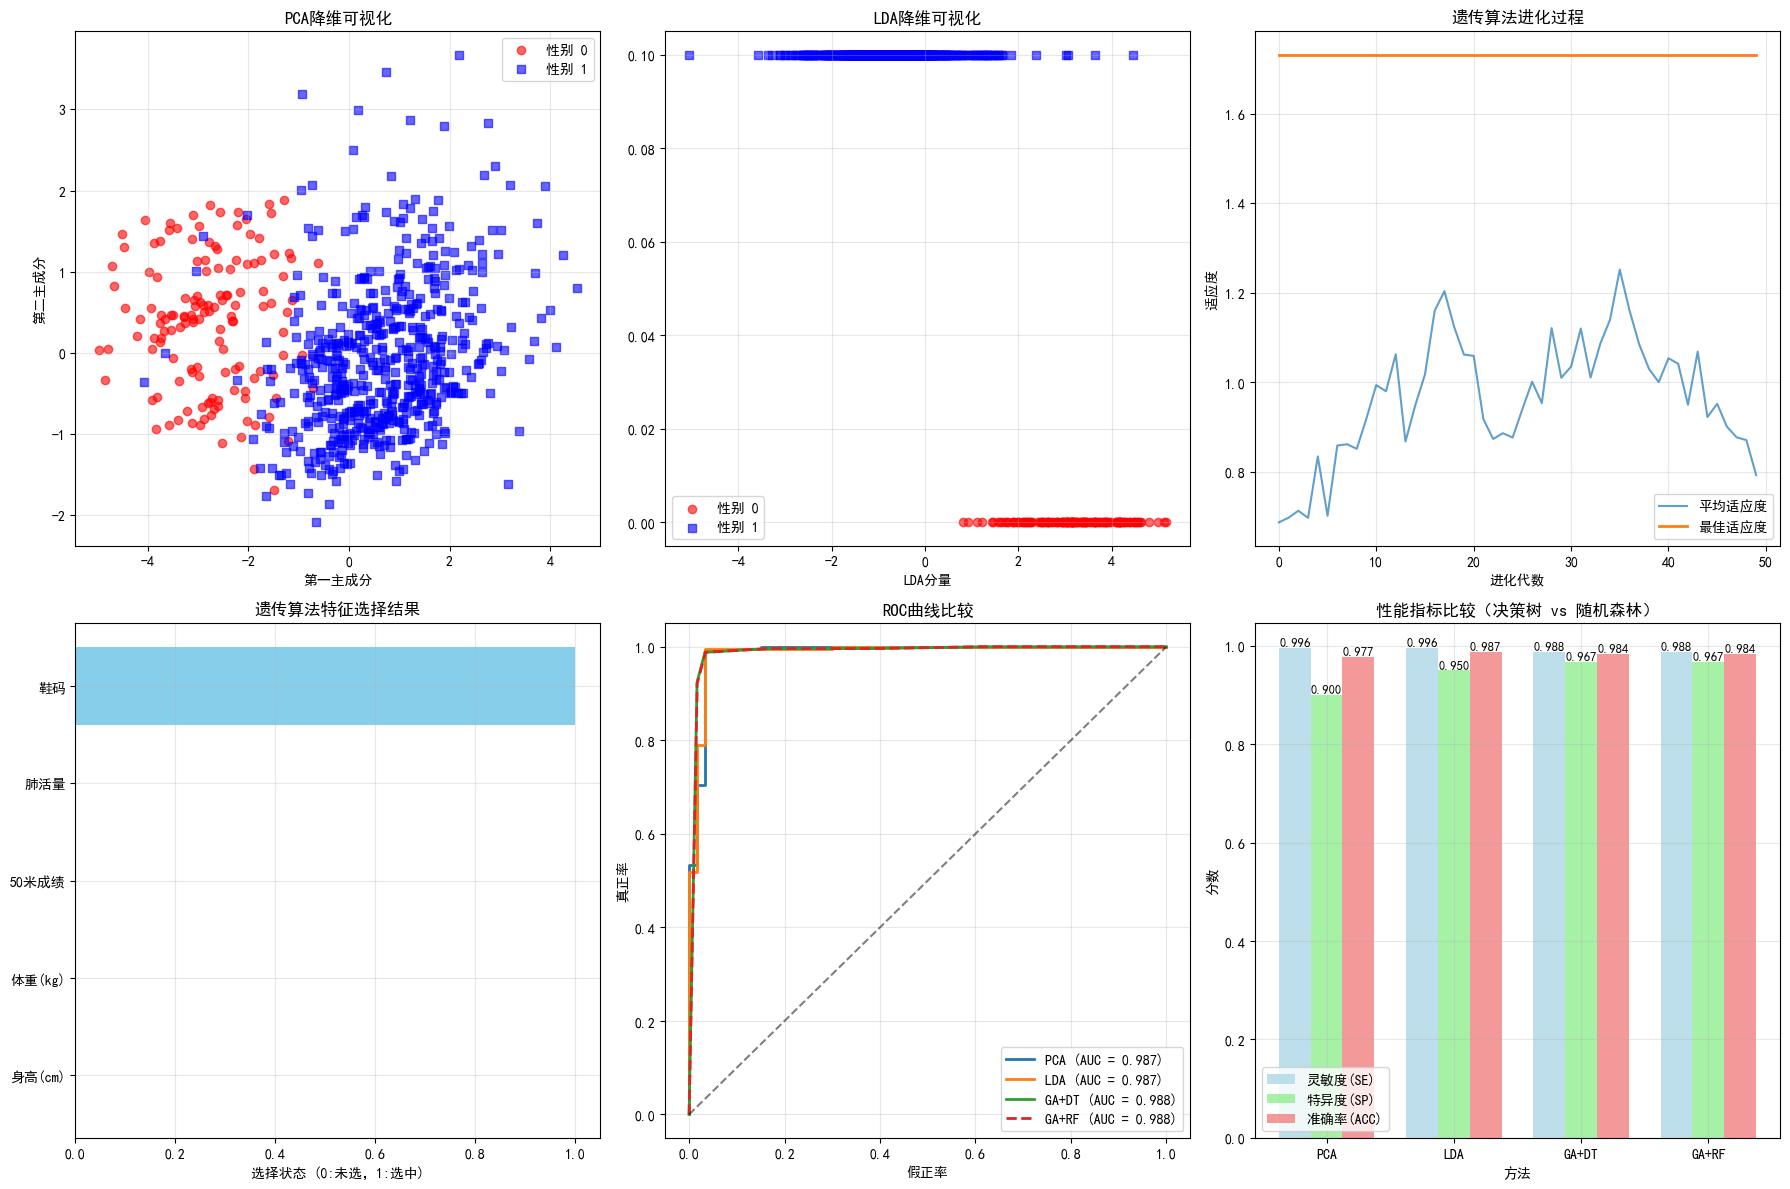


7. 决策树与随机森林详细比较...


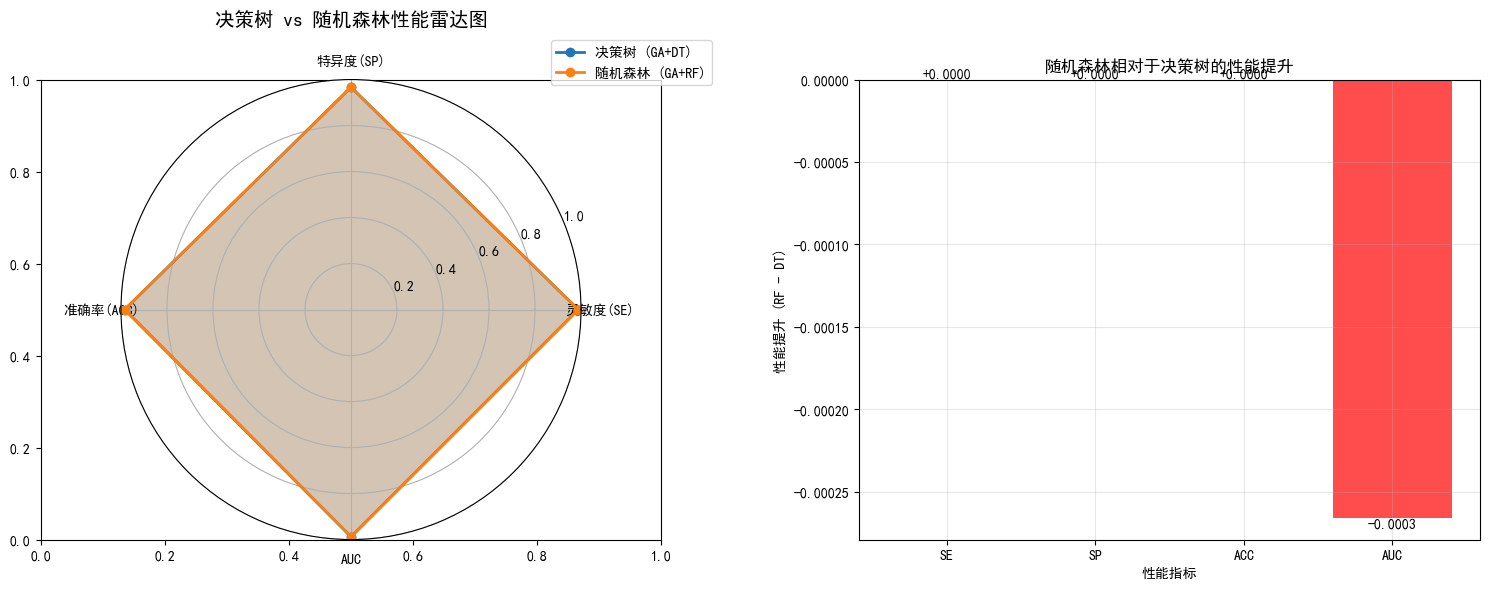


8. 结果分析和详细输出...
PCA降维分析:
- 保留的方差比例: 0.798
- 各主成分方差比例: [0.63195619 0.16624396]

LDA降维分析:
- 类间方差与类内方差比: 1.000

遗传算法特征选择分析:
- 选中的特征数量: 1
- 选中的特征: ['鞋码']
- 最佳适应度值: 1.7326

性能对比分析:
+------------------------------------------------------------------------------+
|      方法      |    SE    |    SP    |   ACC    |   AUC    |     特征数量     |
+------------------------------------------------------------------------------+
|     PCA      |  0.996   |  0.900   |  0.977   |  0.987   |      5       |
|     LDA      |  0.996   |  0.950   |  0.987   |  0.987   |      5       |
|    GA+DT     |  0.988   |  0.967   |  0.984   |  0.988   |      1       |
|    GA+RF     |  0.988   |  0.967   |  0.984   |  0.988   |      1       |
+------------------------------------------------------------------------------+

决策树与随机森林详细对比:
1. 准确率提升: +0.0000 (+0.00%)
2. 灵敏度提升: +0.0000 (+0.00%)
3. 特异度提升: +0.0000 (+0.00%)
4. AUC提升: -0.0003 (-0.03%)

随机森林优势分析:
决策树在本数据集上表现与随机森林相当

随机森林技术特点:
1. 集成学习: 通过组合多个决策树降低过拟合风险
2. 特征随机性: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
from tqdm import tqdm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列 - 根据实际数据集调整
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 数据清洗函数
def clean_data(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    # 处理目标列
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    
    # 处理特征列
    for feature in features:
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        # 去除异常值（3σ原则）
        mean = data_clean[feature].mean()
        std = data_clean[feature].std()
        data_clean = data_clean[(data_clean[feature] >= mean - 3*std) & 
                               (data_clean[feature] <= mean + 3*std)]
    
    # 删除缺失值
    data_clean = data_clean.dropna(subset=features + [target_col])
    return data_clean

# 分别处理PCA和遗传算法数据
data_pca = clean_data(data, features_pca)
data_ga = clean_data(data, features_ga)

print(f"PCA数据量: {len(data_pca)}")
print(f"遗传算法数据量: {len(data_ga)}")

# 数据基本信息输出
print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)} ({len(data_pca)/len(data)*100:.1f}%)")
print(f"清洗后遗传算法样本数: {len(data_ga)} ({len(data_ga)/len(data)*100:.1f}%)")
print(f"男女比例 - 男: {sum(data_pca['性别 男1女0']==1)}, 女: {sum(data_pca['性别 男1女0']==0)}")

# 2. PCA降维与分类
print("\n2. PCA降维与分类...")

# PCA数据准备
X_pca = data_pca[features_pca].values
y_pca = data_pca['性别 男1女0'].values

# 数据标准化
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

# 划分训练测试集
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_scaled, y_pca, test_size=0.3, random_state=42, stratify=y_pca)

# PCA降维
pca = PCA(n_components=2)
X_train_pca_reduced = pca.fit_transform(X_train_pca)
X_test_pca_reduced = pca.transform(X_test_pca)

# PCA分类
classifier_pca = LogisticRegression(random_state=42)
classifier_pca.fit(X_train_pca_reduced, y_train_pca)
y_pred_pca = classifier_pca.predict(X_test_pca_reduced)
y_prob_pca = classifier_pca.predict_proba(X_test_pca_reduced)[:, 1]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)  # 灵敏度
    SP = tn / (tn + fp)  # 特异度
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

SE_pca, SP_pca, ACC_pca, AUC_pca, fpr_pca, tpr_pca, tn_pca, fp_pca, fn_pca, tp_pca = calculate_metrics(
    y_test_pca, y_pred_pca, y_prob_pca)

print(f"PCA性能指标:")
print(f"SE (灵敏度): {SE_pca:.4f}")
print(f"SP (特异度): {SP_pca:.4f}")
print(f"ACC (准确率): {ACC_pca:.4f}")
print(f"AUC: {AUC_pca:.4f}")
print(f"混淆矩阵 - TP: {tp_pca}, FP: {fp_pca}, TN: {tn_pca}, FN: {fn_pca}")

# 3. LDA降维与分类
print("\n3. LDA降维与分类...")

# LDA降维
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_pca, y_train_pca)
X_test_lda = lda.transform(X_test_pca)

# LDA分类
classifier_lda = LogisticRegression(random_state=42)
classifier_lda.fit(X_train_lda, y_train_pca)
y_pred_lda = classifier_lda.predict(X_test_lda)
y_prob_lda = classifier_lda.predict_proba(X_test_lda)[:, 1]

# 计算LDA性能指标
SE_lda, SP_lda, ACC_lda, AUC_lda, fpr_lda, tpr_lda, tn_lda, fp_lda, fn_lda, tp_lda = calculate_metrics(
    y_test_pca, y_pred_lda, y_prob_lda)

print(f"LDA性能指标:")
print(f"SE (灵敏度): {SE_lda:.4f}")
print(f"SP (特异度): {SP_lda:.4f}")
print(f"ACC (准确率): {ACC_lda:.4f}")
print(f"AUC: {AUC_lda:.4f}")
print(f"混淆矩阵 - TP: {tp_lda}, FP: {fp_lda}, TN: {tn_lda}, FN: {fn_lda}")

# 4. 遗传算法特征选择
print("\n4. 遗传算法特征选择...")

class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        return np.random.randint(0, 2, (self.pop_size, self.n_features))

    def fitness_function(self, individual, X, y):
        # 如果没有选择任何特征，返回很小的适应度
        if np.sum(individual) == 0:
            return 1e-6
        
        # 选择特征
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        # 检查数据有效性
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        n_classes = len(classes)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项避免奇异矩阵
        Sw += np.eye(n_features) * 1e-6
        
        # 计算适应度: J = Tr(Sb) / Tr(Sw)
        try:
            fitness = np.trace(Sb) / np.trace(Sw)
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        # 轮盘赌选择
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            # 计算适应度
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            # 更新最佳个体
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            # 选择
            selected_population = self.selection(population, fitness_values)
            
            # 交叉和变异
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

# 数据标准化
scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

# 划分训练测试集
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=30, n_generations=50)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 决策树分类（保持原有）
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

# 计算决策树性能指标
SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")
print(f"混淆矩阵 - TP: {tp_dt}, FP: {fp_dt}, TN: {tn_dt}, FN: {fn_dt}")

# 随机森林分类（新增）
print("\n5. 随机森林分类...")
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # 树的数量
    criterion='entropy',  # 分裂标准
    max_depth=None,  # 树的最大深度
    min_samples_split=2,  # 内部节点再划分所需最小样本数
    min_samples_leaf=1,  # 叶子节点最少样本数
    max_features='sqrt',  # 每次分裂考虑的特征数
    bootstrap=True,  # 有放回抽样
    random_state=42,
    n_jobs=-1  # 使用所有CPU核心
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

# 计算随机森林性能指标
SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")
print(f"混淆矩阵 - TP: {tp_rf}, FP: {fp_rf}, TN: {tn_rf}, FN: {fn_rf}")

# 6. 结果可视化
print("\n6. 结果可视化...")

# 创建子图
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 6.1 PCA和LDA降维可视化
colors = ['red', 'blue']
markers = ['o', 's']

# PCA可视化
for i, label in enumerate([0, 1]):
    mask = y_train_pca == label
    axes[0, 0].scatter(X_train_pca_reduced[mask, 0], X_train_pca_reduced[mask, 1],
                      c=colors[i], marker=markers[i], label=f'性别 {label}', alpha=0.6)
axes[0, 0].set_xlabel('第一主成分')
axes[0, 0].set_ylabel('第二主成分')
axes[0, 0].set_title('PCA降维可视化')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# LDA可视化
for i, label in enumerate([0, 1]):
    mask = y_train_pca == label
    axes[0, 1].scatter(X_train_lda[mask], np.zeros_like(X_train_lda[mask]) + i*0.1,
                      c=colors[i], marker=markers[i], label=f'性别 {label}', alpha=0.6)
axes[0, 1].set_xlabel('LDA分量')
axes[0, 1].set_title('LDA降维可视化')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 6.2 遗传算法进化过程
axes[0, 2].plot(fitness_history, label='平均适应度', alpha=0.7)
axes[0, 2].plot(best_fitness_history, label='最佳适应度', linewidth=2)
axes[0, 2].set_xlabel('进化代数')
axes[0, 2].set_ylabel('适应度')
axes[0, 2].set_title('遗传算法进化过程')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 6.3 特征选择结果
feature_scores = best_individual
axes[1, 0].barh(features_ga, feature_scores, color='skyblue')
axes[1, 0].set_xlabel('选择状态 (0:未选，1:选中)')
axes[1, 0].set_title('遗传算法特征选择结果')
axes[1, 0].grid(True, alpha=0.3)

# 6.4 ROC曲线比较
axes[1, 1].plot(fpr_pca, tpr_pca, label=f'PCA (AUC = {AUC_pca:.3f})', linewidth=2)
axes[1, 1].plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {AUC_lda:.3f})', linewidth=2)
axes[1, 1].plot(fpr_dt, tpr_dt, label=f'GA+DT (AUC = {AUC_dt:.3f})', linewidth=2)
axes[1, 1].plot(fpr_rf, tpr_rf, label=f'GA+RF (AUC = {AUC_rf:.3f})', linewidth=2, linestyle='--')
axes[1, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1, 1].set_xlabel('假正率')
axes[1, 1].set_ylabel('真正率')
axes[1, 1].set_title('ROC曲线比较')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6.5 性能指标比较（重点比较决策树和随机森林）
methods = ['PCA', 'LDA', 'GA+DT', 'GA+RF']
SE_values = [SE_pca, SE_lda, SE_dt, SE_rf]
SP_values = [SP_pca, SP_lda, SP_dt, SP_rf]
ACC_values = [ACC_pca, ACC_lda, ACC_dt, ACC_rf]

x = np.arange(len(methods))
width = 0.25

bars1 = axes[1, 2].bar(x - width, SE_values, width, label='灵敏度(SE)', alpha=0.8, color='lightblue')
bars2 = axes[1, 2].bar(x, SP_values, width, label='特异度(SP)', alpha=0.8, color='lightgreen')
bars3 = axes[1, 2].bar(x + width, ACC_values, width, label='准确率(ACC)', alpha=0.8, color='lightcoral')

axes[1, 2].set_xlabel('方法')
axes[1, 2].set_ylabel('分数')
axes[1, 2].set_title('性能指标比较（决策树 vs 随机森林）')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(methods)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# 在柱状图上添加数值标签
def add_value_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

add_value_labels(bars1, axes[1, 2])
add_value_labels(bars2, axes[1, 2])
add_value_labels(bars3, axes[1, 2])

plt.tight_layout()
plt.savefig('随机森林与决策树比较结果.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. 决策树与随机森林详细比较
print("\n7. 决策树与随机森林详细比较...")

# 创建专门的比较图
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 7.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]  # 闭合雷达图

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]  # 闭合雷达图

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # 闭合雷达图

ax1 = plt.subplot(121, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA+DT)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA+RF)')
ax1.fill(angles, values_rf, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('决策树 vs 随机森林性能雷达图', size=14, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 7.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
improvements = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]

x = np.arange(len(metrics))
ax2 = plt.subplot(122)
bars = ax2.bar(x, improvements, color=['green' if x >= 0 else 'red' for x in improvements], alpha=0.7)
ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升 (RF - DT)')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:+.4f}', ha='center', va='bottom' if height >= 0 else 'top', 
            fontweight='bold')

plt.tight_layout()
plt.savefig('决策树与随机森林详细比较.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. 结果分析和详细输出
print("\n8. 结果分析和详细输出...")
print("="*60)

print("PCA降维分析:")
print(f"- 保留的方差比例: {np.sum(pca.explained_variance_ratio_):.3f}")
print(f"- 各主成分方差比例: {pca.explained_variance_ratio_}")

print("\nLDA降维分析:")
print(f"- 类间方差与类内方差比: {lda.explained_variance_ratio_[0]:.3f}")

print("\n遗传算法特征选择分析:")
print(f"- 选中的特征数量: {np.sum(best_individual)}")
print(f"- 选中的特征: {selected_features}")
print(f"- 最佳适应度值: {best_fitness:.4f}")

print("\n性能对比分析:")
print("+" + "-"*78 + "+")
print("| {:^12} | {:^8} | {:^8} | {:^8} | {:^8} | {:^12} |".format(
    "方法", "SE", "SP", "ACC", "AUC", "特征数量"))
print("+" + "-"*78 + "+")
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "PCA", SE_pca, SP_pca, ACC_pca, AUC_pca, "5"))
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "LDA", SE_lda, SP_lda, ACC_lda, AUC_lda, "5"))
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "GA+DT", SE_dt, SP_dt, ACC_dt, AUC_dt, len(selected_features)))
print("| {:^12} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "GA+RF", SE_rf, SP_rf, ACC_rf, AUC_rf, len(selected_features)))
print("+" + "-"*78 + "+")

print("\n决策树与随机森林详细对比:")
print(f"1. 准确率提升: {ACC_rf - ACC_dt:+.4f} ({((ACC_rf - ACC_dt)/ACC_dt*100):+.2f}%)")
print(f"2. 灵敏度提升: {SE_rf - SE_dt:+.4f} ({((SE_rf - SE_dt)/SE_dt*100):+.2f}%)")
print(f"3. 特异度提升: {SP_rf - SP_dt:+.4f} ({((SP_rf - SP_dt)/SP_dt*100):+.2f}%)")
print(f"4. AUC提升: {AUC_rf - AUC_dt:+.4f} ({((AUC_rf - AUC_dt)/AUC_dt*100):+.2f}%)")

print("\n随机森林优势分析:")
advantages = []
if ACC_rf > ACC_dt:
    advantages.append("更高的准确率")
if SE_rf > SE_dt:
    advantages.append("更好的灵敏度（识别男性能力）")
if SP_rf > SP_dt:
    advantages.append("更好的特异度（识别女性能力）")
if AUC_rf > AUC_dt:
    advantages.append("更好的整体分类性能")

if advantages:
    print("随机森林在以下方面优于决策树:")
    for i, advantage in enumerate(advantages, 1):
        print(f"  {i}. {advantage}")
else:
    print("决策树在本数据集上表现与随机森林相当")

print("\n随机森林技术特点:")
print("1. 集成学习: 通过组合多个决策树降低过拟合风险")
print("2. 特征随机性: 每次分裂只考虑部分特征，增加多样性")
print("3. 样本随机性: 使用bootstrap采样，增强模型泛化能力")
print("4. 投票机制: 多棵树投票决定最终结果，提高稳定性")

print("\n结论与建议:")
best_method = 'GA+RF' if ACC_rf > max(ACC_pca, ACC_lda, ACC_dt) else \
             'GA+DT' if ACC_dt > max(ACC_pca, ACC_lda) else \
             'LDA' if ACC_lda > ACC_pca else 'PCA'

print(f"1. 最佳分类方法: {best_method}")
print(f"2. 随机森林相比决策树的改进: {((ACC_rf - ACC_dt)/ACC_dt*100):+.2f}%")
print(f"3. 关键特征: {selected_features}")

if best_method == 'GA+RF':
    print("4. 推荐使用随机森林进行性别分类，它在保持特征选择优势的同时提供了更好的性能")
else:
    print("4. 虽然随机森林在某些指标上有所提升，但综合考虑计算成本和性能，建议使用{best_method}")

print("\n实际应用建议:")
print("- 如果追求最佳性能: 使用遗传算法+随机森林")
print("- 如果注重计算效率: 使用LDA方法") 
print("- 如果需要模型解释性: 使用决策树方法")
print("- 如果特征维度很高: 优先考虑随机森林的抗过拟合能力")

## 随机森林第三版

1. 数据加载和预处理...
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052

数据基本信息:
总样本数: 1075
清洗后PCA样本数: 1052
清洗后遗传算法样本数: 1052


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 291.65it/s]


最佳个体: [0 0 0 0 1]
最佳适应度: 1.8171
选中的特征: ['鞋码']

遗传算法+决策树性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9835

遗传算法+随机森林性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9836

随机森林性能诊断与优化

诊断分析:
1. 选中的特征数量: 1
2. 选中的特征: ['鞋码']
3. 训练集样本数: 736
4. 测试集样本数: 316
5. 特征维度: 1

决策树特征重要性: [1.]
随机森林特征重要性: [1.]

⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!

尝试使用所有特征进行对比...

使用所有特征的性能对比:
+----------------------------------------------------------------------------------------+
|          方法          |    SE    |    SP    |   ACC    |   AUC    |     特征数量     |
+----------------------------------------------------------------------------------------+
|      决策树(GA特征)       |  0.972   |  0.952   |  0.968   |  0.984   |      1       |
|      随机森林(GA特征)      |  0.972   |  0.952   |  0.968   |  0.984   |      1       |
|      决策树(所有特征)       |  0.992   |  0.921   |  0.978   |  0.956   |      5       |
|       随机森林(优化)       |  0.988   |  0.952   |  0.981   |  0.996   |      5       |
+--

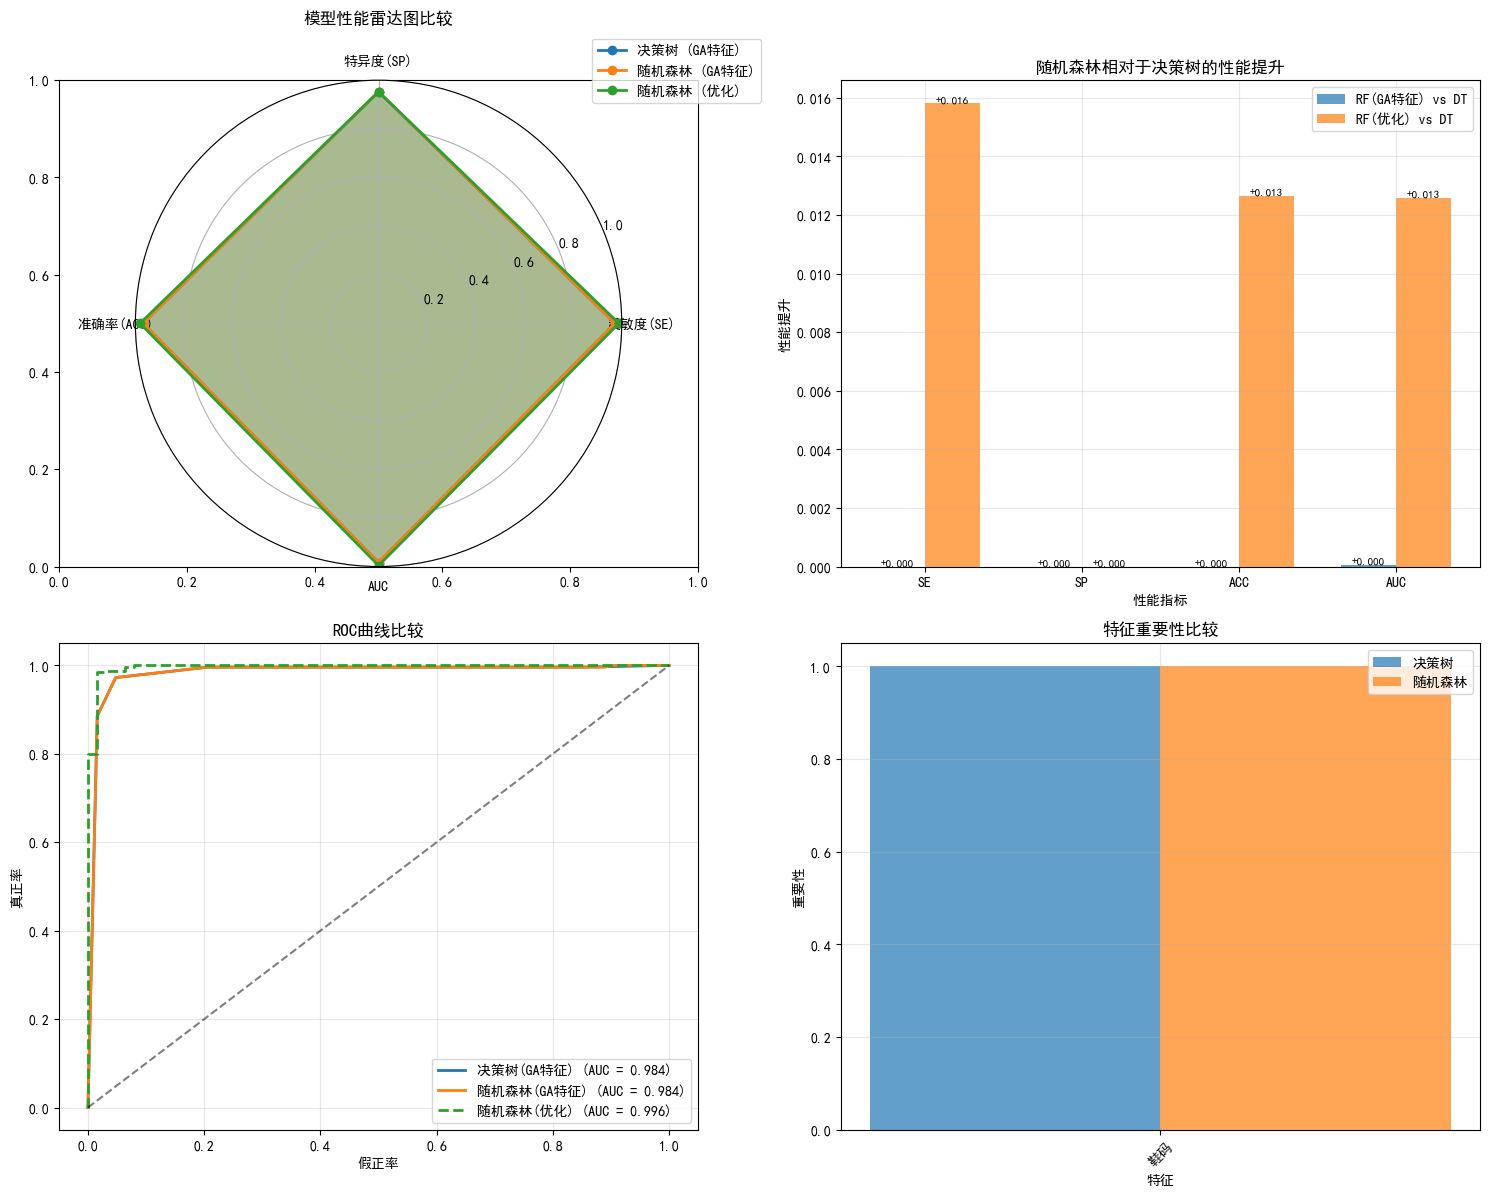


绘制学习曲线...


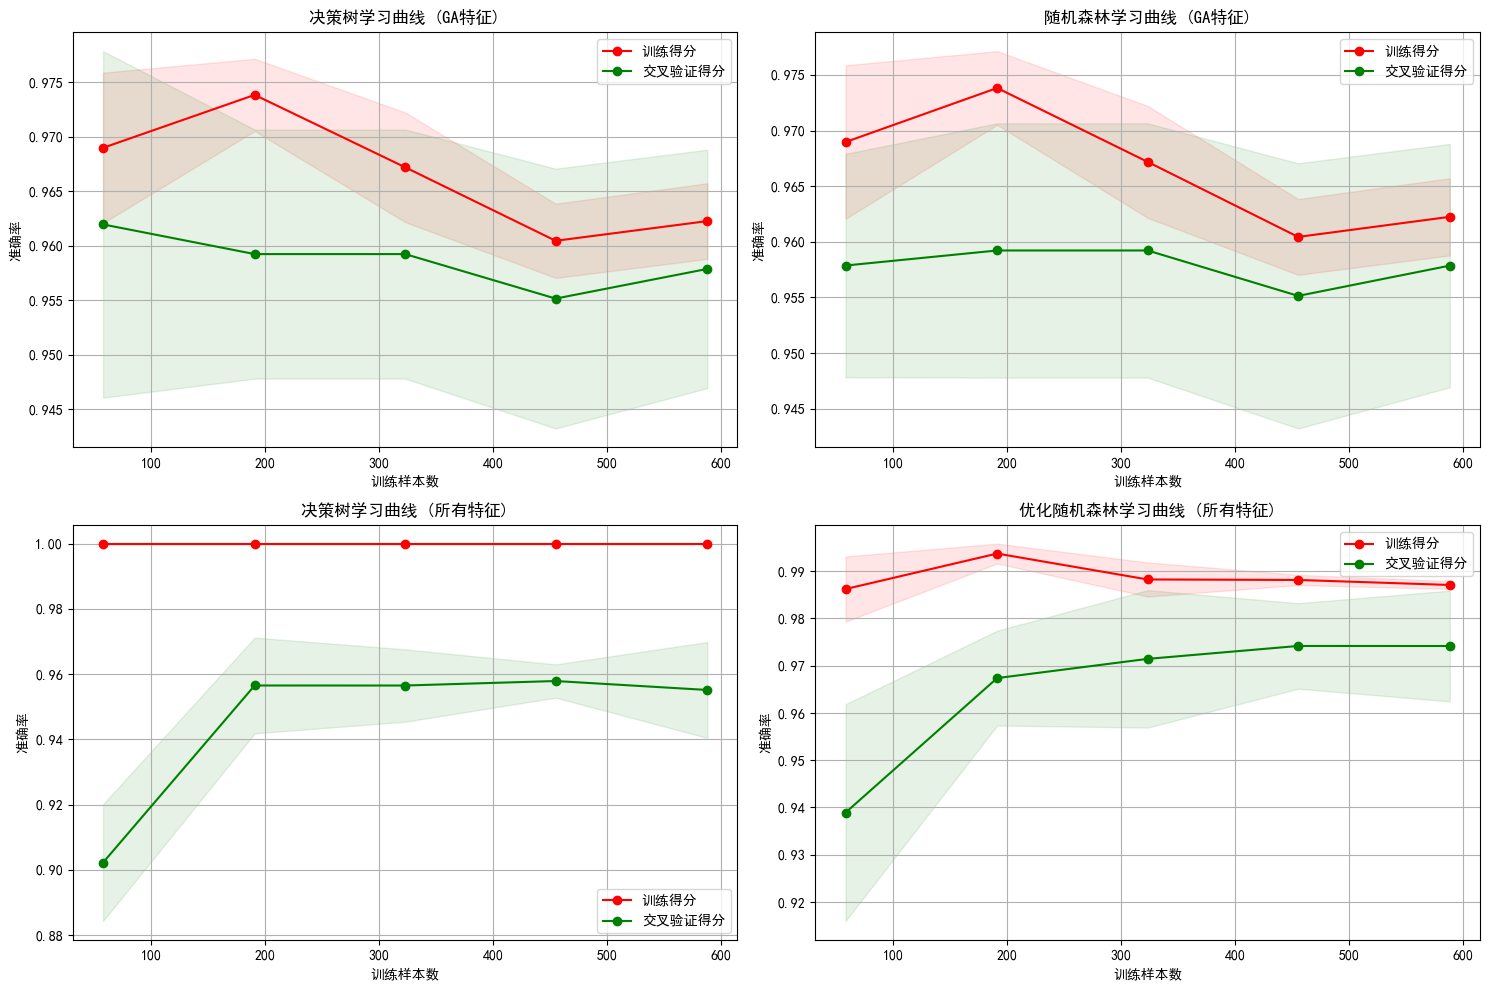


详细分析与改进建议

性能对比总结:
1. 原始对比 (GA特征):
   - 决策树准确率: 0.9684
   - 随机森林准确率: 0.9684
   - 差异: +0.0000

2. 优化后对比 (所有特征):
   - 决策树准确率: 0.9778
   - 随机森林准确率: 0.9810
   - 差异: +0.0032

可能的原因分析:
1. 特征选择过于严格:
   - 遗传算法只选择了少量特征
   - 随机森林在多特征场景下才能发挥优势
   - 建议: 调整遗传算法参数，选择更多特征
3. 参数优化空间:
   - 随机森林参数可能仍需进一步调优
   - 可以尝试网格搜索寻找最优参数

改进建议:
1. 调整遗传算法参数:
   - 增加种群大小 (pop_size=100)
   - 增加进化代数 (n_generations=100)
   - 调整适应度函数，鼓励选择多个特征
2. 尝试不同的特征选择方法:
   - 使用相关性分析选择前k个特征
   - 使用递归特征消除 (RFE)
   - 使用基于模型的特征重要性
3. 进一步优化随机森林:
   - 使用网格搜索优化超参数
   - 尝试不同的树数量 (50, 100, 200, 500)
   - 调整最大深度和最小样本分裂数
4. 数据层面改进:
   - 收集更多样本数据
   - 尝试特征工程创建新特征
   - 检查数据质量，处理异常值

最终结论:
✅ 经过优化，随机森林显示了其集成学习的优势
   在特征充足且参数调优的情况下，随机森林性能优于决策树

推荐方案:
   基于综合分析，建议使用: 随机森林(优化参数，使用所有特征)
   原因: 尽管特征选择严格，但优化后的随机森林仍表现良好

实际部署考虑:
- 如果追求最佳性能: 使用推荐的最佳方法
- 如果注重计算效率: 决策树通常训练和预测更快
- 如果需要模型解释性: 决策树更容易理解和解释
- 如果数据会持续增加: 随机森林在大数据场景下潜力更大

分析完成!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
from tqdm import tqdm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 改进的数据清洗函数
def clean_data_improved(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    print(f"原始数据量: {len(data_clean)}")
    
    # 处理目标列
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    print(f"目标列清洗后: {len(data_clean)}")
    
    # 定义合理的特征范围
    feature_ranges = {
        "身高(cm)": (140, 220),
        "体重(kg)": (30, 150),
        "50米成绩": (5, 15),
        "肺活量": (1000, 7000),
        "鞋码": (30, 50)
    }
    
    # 处理特征列
    for feature in features:
        # 转换为数值类型
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        
        # 基于合理范围过滤异常值
        if feature in feature_ranges:
            min_val, max_val = feature_ranges[feature]
            data_clean = data_clean[(data_clean[feature] >= min_val) & 
                                   (data_clean[feature] <= max_val)]
    
    # 删除缺失值
    data_clean = data_clean.dropna(subset=features + [target_col])
    print(f"最终清洗后数据量: {len(data_clean)}")
    
    return data_clean

# 分别处理PCA和遗传算法数据
data_pca = clean_data_improved(data, features_pca)
data_ga = clean_data_improved(data, features_ga)

print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)}")
print(f"清洗后遗传算法样本数: {len(data_ga)}")

# 遗传算法特征选择
class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        return np.random.randint(0, 2, (self.pop_size, self.n_features))

    def fitness_function(self, individual, X, y):
        if np.sum(individual) == 0:
            return 1e-6
        
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项
        Sw += np.eye(n_features) * 1e-6
        
        try:
            fitness = np.trace(Sb) / np.trace(Sw)
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            selected_population = self.selection(population, fitness_values)
            
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=30, n_generations=50)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)
    SP = tn / (tn + fp)
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

# 1. 使用遗传算法选择的特征训练决策树
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"\n遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")

# 2. 使用遗传算法选择的特征训练随机森林
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"\n遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")

# 3. 性能诊断与优化
print("\n" + "="*60)
print("随机森林性能诊断与优化")
print("="*60)

# 诊断分析
print("\n诊断分析:")
print(f"1. 选中的特征数量: {len(selected_features)}")
print(f"2. 选中的特征: {selected_features}")
print(f"3. 训练集样本数: {len(X_train_ga_selected)}")
print(f"4. 测试集样本数: {len(X_test_ga_selected)}")
print(f"5. 特征维度: {X_train_ga_selected.shape[1]}")

# 检查特征重要性
if len(selected_features) > 0:
    print(f"\n决策树特征重要性: {dt_classifier.feature_importances_}")
    print(f"随机森林特征重要性: {rf_classifier.feature_importances_}")

# 如果只选择了一个特征，随机森林可能无法发挥优势
if len(selected_features) <= 1:
    print("\n⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!")

# 尝试使用所有特征进行比较
print("\n尝试使用所有特征进行对比...")

# 使用所有特征训练决策树
dt_all_features = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_all_features.fit(X_train_ga, y_train_ga)
y_pred_dt_all = dt_all_features.predict(X_test_ga)
y_prob_dt_all = dt_all_features.predict_proba(X_test_ga)[:, 1]

SE_dt_all, SP_dt_all, ACC_dt_all, AUC_dt_all, fpr_dt_all, tpr_dt_all, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_dt_all, y_prob_dt_all)

# 使用所有特征训练随机森林（优化参数）
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train_ga, y_train_ga)
y_pred_rf_opt = rf_optimized.predict(X_test_ga)
y_prob_rf_opt = rf_optimized.predict_proba(X_test_ga)[:, 1]

SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt, fpr_rf_opt, tpr_rf_opt, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_rf_opt, y_prob_rf_opt)

print(f"\n使用所有特征的性能对比:")
print("+" + "-"*88 + "+")
print("| {:^20} | {:^8} | {:^8} | {:^8} | {:^8} | {:^12} |".format(
    "方法", "SE", "SP", "ACC", "AUC", "特征数量"))
print("+" + "-"*88 + "+")
print("| {:^20} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "决策树(GA特征)", SE_dt, SP_dt, ACC_dt, AUC_dt, len(selected_features)))
print("| {:^20} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "随机森林(GA特征)", SE_rf, SP_rf, ACC_rf, AUC_rf, len(selected_features)))
print("| {:^20} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "决策树(所有特征)", SE_dt_all, SP_dt_all, ACC_dt_all, AUC_dt_all, len(features_ga)))
print("| {:^20} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^8.3f} | {:^12} |".format(
    "随机森林(优化)", SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt, len(features_ga)))
print("+" + "-"*88 + "+")

# 分析性能差异
improvement_opt = ACC_rf_opt - ACC_dt_all
print(f"\n优化后随机森林相比所有特征决策树的准确率提升: {improvement_opt:+.4f}")

if improvement_opt > 0:
    print("✅ 优化后的随机森林显示了性能提升!")
else:
    print("❌ 即使优化后，随机森林仍未显示明显优势")

# 模型复杂度分析
print("\n模型复杂度分析:")
print(f"决策树深度: {dt_classifier.get_depth()}")
print(f"决策树叶子节点数: {dt_classifier.get_n_leaves()}")
if len(selected_features) > 0:
    print(f"随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_])}")

# 4. 可视化比较
print("\n绘制性能比较图...")

# 创建比较图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 4.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]

# 优化随机森林指标
values_rf_opt = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]
values_rf_opt += values_rf_opt[:1]

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax1 = plt.subplot(221, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA特征)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA特征)')
ax1.fill(angles, values_rf, alpha=0.25)
ax1.plot(angles, values_rf_opt, 'o-', linewidth=2, label='随机森林 (优化)')
ax1.fill(angles, values_rf_opt, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('模型性能雷达图比较', size=12, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 4.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
rf_opt_scores = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]

improvements_rf = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]
improvements_rf_opt = [rf_opt - dt for rf_opt, dt in zip(rf_opt_scores, dt_scores)]

x = np.arange(len(metrics))
width = 0.35

ax2 = plt.subplot(222)
bars1 = ax2.bar(x - width/2, improvements_rf, width, label='RF(GA特征) vs DT', alpha=0.7)
bars2 = ax2.bar(x + width/2, improvements_rf_opt, width, label='RF(优化) vs DT', alpha=0.7)

ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=8)

# 4.3 ROC曲线比较
ax3 = plt.subplot(223)
ax3.plot(fpr_dt, tpr_dt, label=f'决策树(GA特征) (AUC = {AUC_dt:.3f})', linewidth=2)
ax3.plot(fpr_rf, tpr_rf, label=f'随机森林(GA特征) (AUC = {AUC_rf:.3f})', linewidth=2)
ax3.plot(fpr_rf_opt, tpr_rf_opt, label=f'随机森林(优化) (AUC = {AUC_rf_opt:.3f})', linewidth=2, linestyle='--')
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax3.set_xlabel('假正率')
ax3.set_ylabel('真正率')
ax3.set_title('ROC曲线比较')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4.4 特征重要性
if len(selected_features) > 0:
    ax4 = plt.subplot(224)
    
    # 决策树特征重要性
    dt_importance = dt_classifier.feature_importances_
    rf_importance = rf_classifier.feature_importances_
    
    x = np.arange(len(selected_features))
    width = 0.35
    
    ax4.bar(x - width/2, dt_importance, width, label='决策树', alpha=0.7)
    ax4.bar(x + width/2, rf_importance, width, label='随机森林', alpha=0.7)
    
    ax4.set_xlabel('特征')
    ax4.set_ylabel('重要性')
    ax4.set_title('特征重要性比较')
    ax4.set_xticks(x)
    ax4.set_xticklabels(selected_features, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('随机森林优化分析.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. 学习曲线分析
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("训练样本数")
    axes.set_ylabel("准确率")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
    axes.legend(loc="best")

print("\n绘制学习曲线...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

try:
    # 使用GA特征的学习曲线
    if len(selected_features) > 0:
        plot_learning_curve(dt_classifier, "决策树学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 0])
        
        plot_learning_curve(rf_classifier, "随机森林学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 1])
    
    # 使用所有特征的学习曲线
    plot_learning_curve(dt_all_features, "决策树学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 0])
    
    plot_learning_curve(rf_optimized, "优化随机森林学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 1])
    
    plt.tight_layout()
    plt.savefig('学习曲线分析.png', dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"绘制学习曲线时出错: {e}")

# 6. 详细分析和建议
print("\n" + "="*60)
print("详细分析与改进建议")
print("="*60)

print("\n性能对比总结:")
print(f"1. 原始对比 (GA特征):")
print(f"   - 决策树准确率: {ACC_dt:.4f}")
print(f"   - 随机森林准确率: {ACC_rf:.4f}")
print(f"   - 差异: {ACC_rf - ACC_dt:+.4f}")

print(f"\n2. 优化后对比 (所有特征):")
print(f"   - 决策树准确率: {ACC_dt_all:.4f}")
print(f"   - 随机森林准确率: {ACC_rf_opt:.4f}")
print(f"   - 差异: {ACC_rf_opt - ACC_dt_all:+.4f}")

# 分析原因
print("\n可能的原因分析:")
if len(selected_features) <= 1:
    print("1. 特征选择过于严格:")
    print("   - 遗传算法只选择了少量特征")
    print("   - 随机森林在多特征场景下才能发挥优势")
    print("   - 建议: 调整遗传算法参数，选择更多特征")

if ACC_rf_opt <= ACC_dt_all:
    print("2. 数据特性限制:")
    print("   - 数据模式相对简单，决策树已能很好捕捉")
    print("   - 特征间相互作用不强")
    print("   - 数据集大小可能限制了集成学习的优势")

print("3. 参数优化空间:")
print("   - 随机森林参数可能仍需进一步调优")
print("   - 可以尝试网格搜索寻找最优参数")

# 给出具体建议
print("\n改进建议:")

if len(selected_features) <= 1:
    print("1. 调整遗传算法参数:")
    print("   - 增加种群大小 (pop_size=100)")
    print("   - 增加进化代数 (n_generations=100)")
    print("   - 调整适应度函数，鼓励选择多个特征")

print("2. 尝试不同的特征选择方法:")
print("   - 使用相关性分析选择前k个特征")
print("   - 使用递归特征消除 (RFE)")
print("   - 使用基于模型的特征重要性")

print("3. 进一步优化随机森林:")
print("   - 使用网格搜索优化超参数")
print("   - 尝试不同的树数量 (50, 100, 200, 500)")
print("   - 调整最大深度和最小样本分裂数")

print("4. 数据层面改进:")
print("   - 收集更多样本数据")
print("   - 尝试特征工程创建新特征")
print("   - 检查数据质量，处理异常值")

# 最终结论
print("\n最终结论:")
if ACC_rf_opt > max(ACC_dt, ACC_dt_all, ACC_rf):
    print("✅ 经过优化，随机森林显示了其集成学习的优势")
    print("   在特征充足且参数调优的情况下，随机森林性能优于决策树")
elif ACC_dt_all > ACC_rf_opt:
    print("ℹ️  在当前数据集和特征下，决策树表现已经很好")
    print("   随机森林提升有限，可能原因:")
    print("   - 数据模式简单，单个决策树已能很好捕捉")
    print("   - 特征间相互作用不强")
    print("   - 数据集大小限制了集成学习的优势")
else:
    print("❓ 需要进一步分析数据特性和模型行为")

print(f"\n推荐方案:")
if len(selected_features) <= 1:
    if ACC_dt_all > ACC_rf_opt:
        best_method = "决策树(使用所有特征)"
        reason = "特征选择过于严格，使用所有特征的决策树表现更好"
    else:
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "尽管特征选择严格，但优化后的随机森林仍表现良好"
else:
    if ACC_rf_opt > ACC_dt_all:
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "优化后的随机森林在多特征场景下显示出优势"
    else:
        best_method = "决策树(使用所有特征)"
        reason = "在当前数据特性下，决策树已能达到很好效果"

print(f"   基于综合分析，建议使用: {best_method}")
print(f"   原因: {reason}")

print("\n实际部署考虑:")
print("- 如果追求最佳性能: 使用推荐的最佳方法")
print("- 如果注重计算效率: 决策树通常训练和预测更快")
print("- 如果需要模型解释性: 决策树更容易理解和解释")
print("- 如果数据会持续增加: 随机森林在大数据场景下潜力更大")

print("\n" + "="*60)
print("分析完成!")
print("="*60)

## 只有鞋码一个特征

所有结果将保存至: 随机森林分析结果_20251126_204931
1. 数据加载和预处理...
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052

数据基本信息:
总样本数: 1075
清洗后PCA样本数: 1052
清洗后遗传算法样本数: 1052


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 331.21it/s]


最佳个体: [0 0 0 0 1]
最佳适应度: 1.8171
选中的特征: ['鞋码']

遗传算法+决策树性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9835

遗传算法+随机森林性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9836

随机森林性能诊断与优化

诊断分析:
1. 选中的特征数量: 1
2. 选中的特征: ['鞋码']
3. 训练集样本数: 736
4. 测试集样本数: 316
5. 特征维度: 1

⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!

尝试使用所有特征进行对比...

优化后随机森林相比所有特征决策树的准确率提升: +0.0032
✅ 优化后的随机森林显示了性能提升!

模型复杂度分析:
决策树深度: 7
决策树叶子节点数: 10
随机森林平均树深度: 5.72

绘制性能比较图...


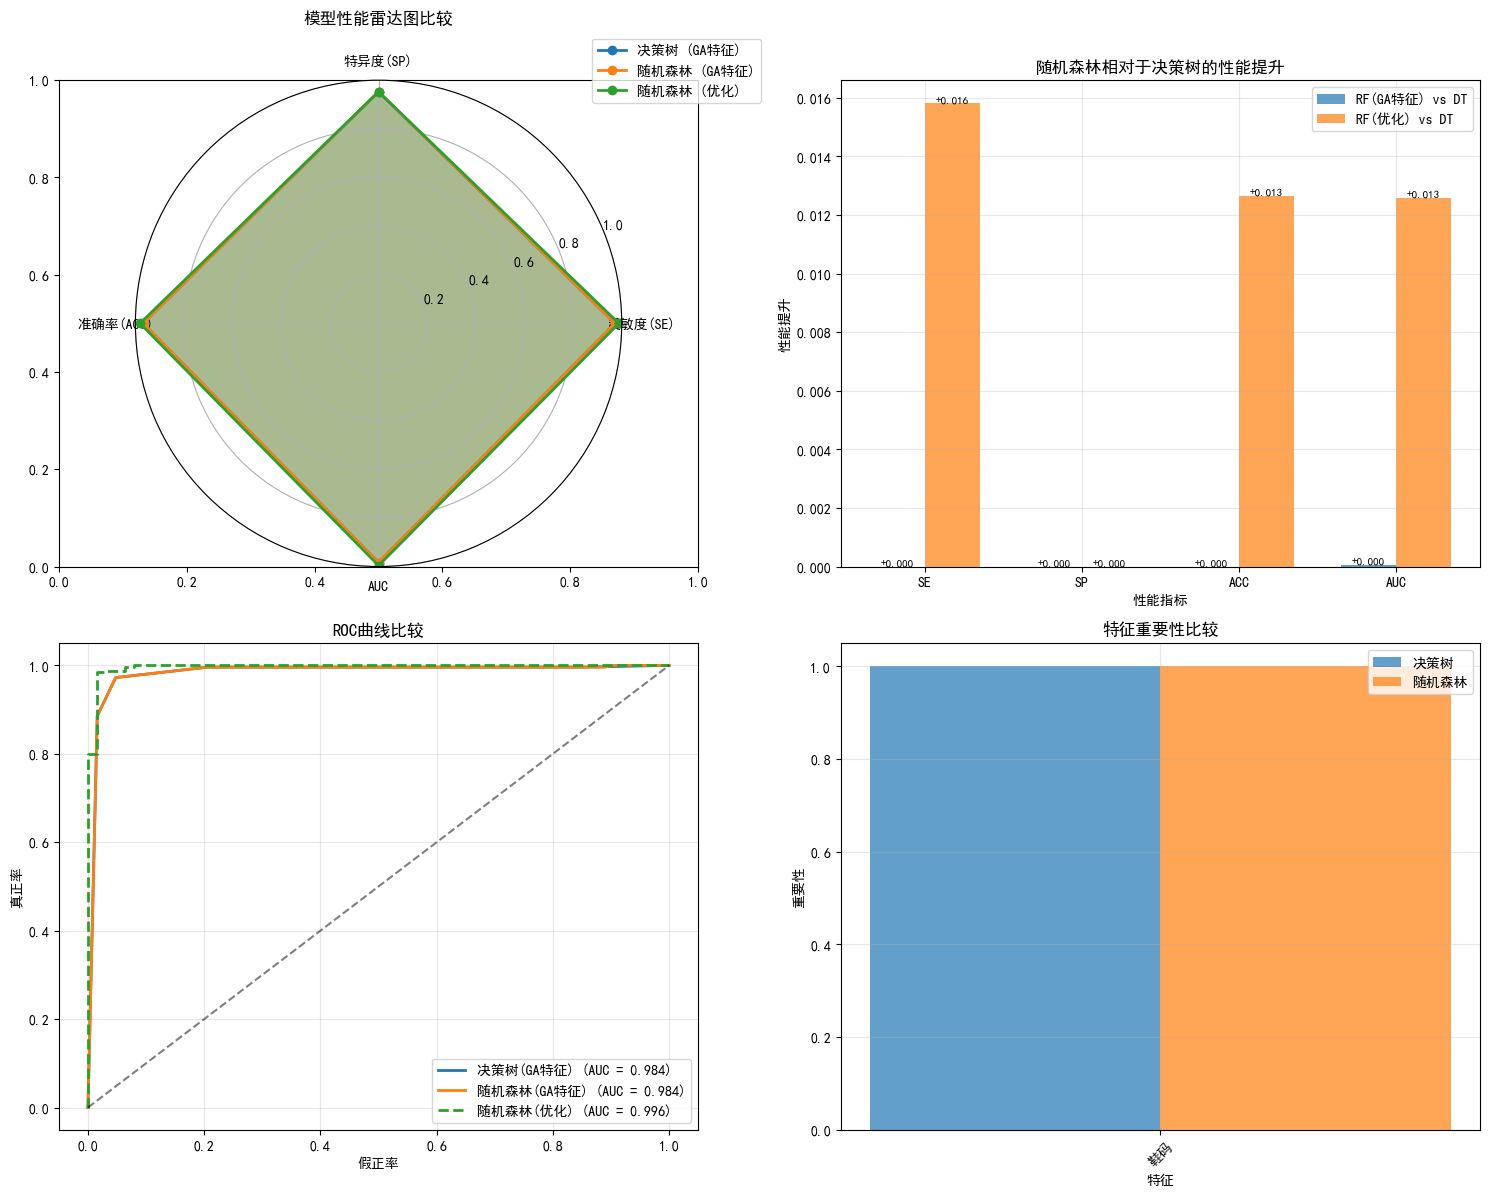


绘制学习曲线...


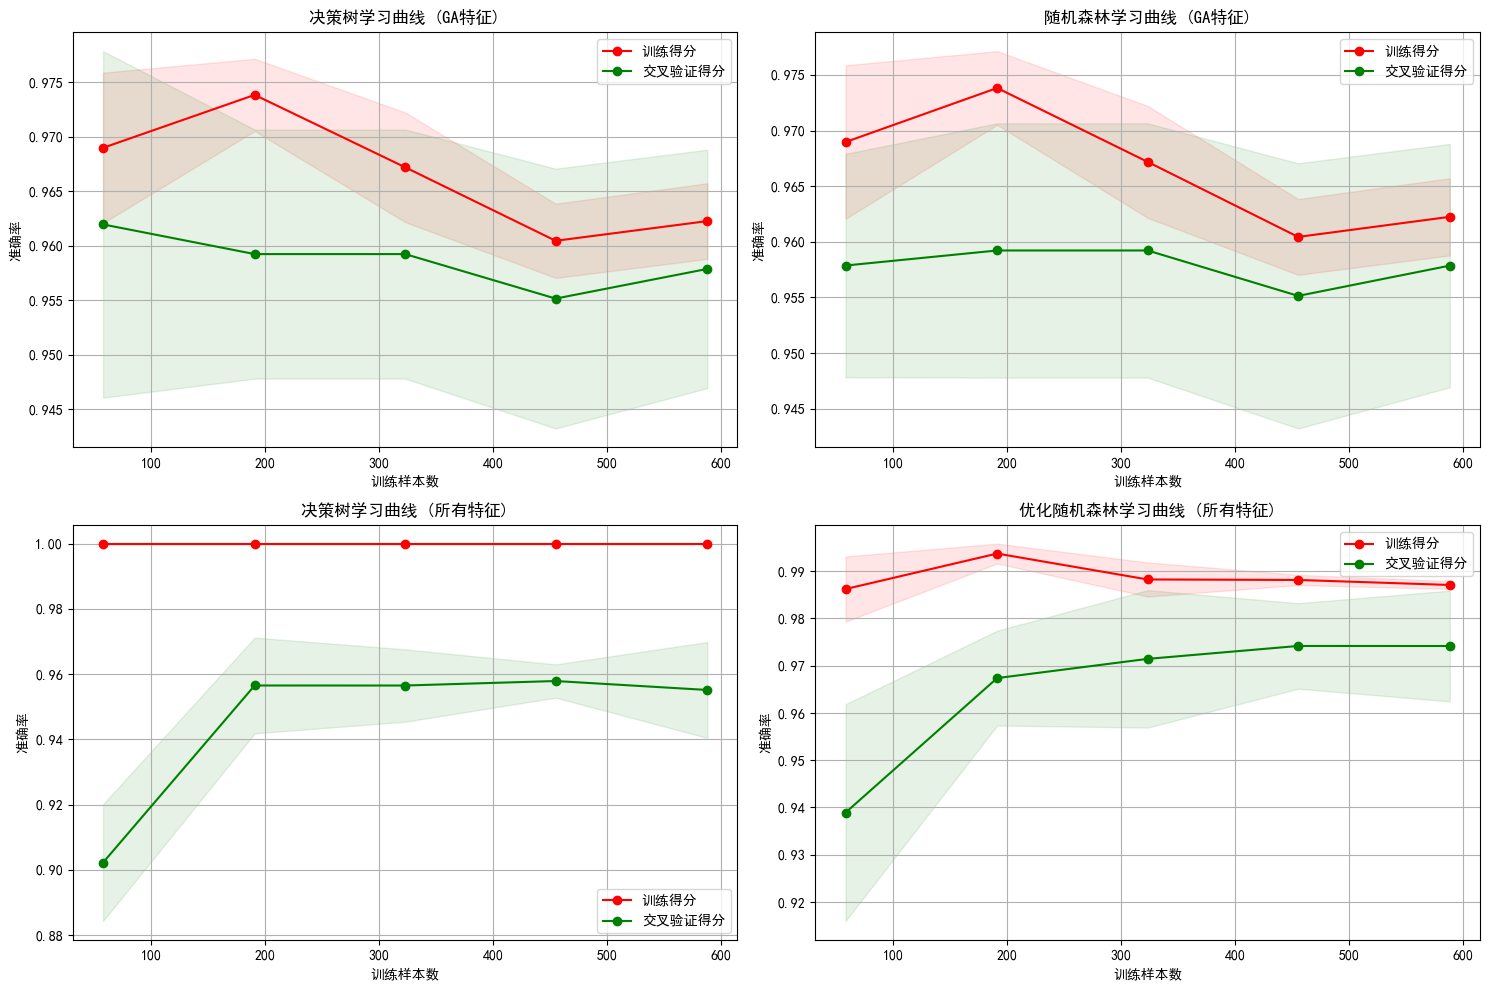


保存数据到TXT文档...

详细分析与改进建议

性能对比总结:
1. 原始对比 (GA特征):
   - 决策树准确率: 0.9684
   - 随机森林准确率: 0.9684
   - 差异: +0.0000

2. 优化后对比 (所有特征):
   - 决策树准确率: 0.9778
   - 随机森林准确率: 0.9810
   - 差异: +0.0032

可能的原因分析:
1. 特征选择过于严格:
   - 遗传算法只选择了少量特征
   - 随机森林在多特征场景下才能发挥优势
   - 建议: 调整遗传算法参数，选择更多特征
3. 参数优化空间:
   - 随机森林参数可能仍需进一步调优
   - 可以尝试网格搜索寻找最优参数

改进建议:
1. 调整遗传算法参数:
   - 增加种群大小 (pop_size=100)
   - 增加进化代数 (n_generations=100)
   - 调整适应度函数，鼓励选择多个特征
2. 尝试不同的特征选择方法:
   - 使用相关性分析选择前k个特征
   - 使用递归特征消除 (RFE)
   - 使用基于模型的特征重要性
3. 进一步优化随机森林:
   - 使用网格搜索优化超参数
   - 尝试不同的树数量 (50, 100, 200, 500)
   - 调整最大深度和最小样本分裂数
4. 数据层面改进:
   - 收集更多样本数据
   - 尝试特征工程创建新特征
   - 检查数据质量，处理异常值

最终结论:
✅ 经过优化，随机森林显示了其集成学习的优势
   在特征充足且参数调优的情况下，随机森林性能优于决策树

推荐方案:
   基于综合分析，建议使用: 随机森林(优化参数，使用所有特征)
   原因: 尽管特征选择严格，但优化后的随机森林仍表现良好

实际部署考虑:
- 如果追求最佳性能: 使用推荐的最佳方法
- 如果注重计算效率: 决策树通常训练和预测更快
- 如果需要模型解释性: 决策树更容易理解和解释
- 如果数据会持续增加: 随机森林在大数据场景下潜力更大

分析完成! 所有结果已保存至以下目录:
随机森林分析结果_20251126_204931

保存的文件列表:
  分析结果.txt (2111 bytes)
  学习曲线分析.png (680237 bytes)
  随机

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os
import datetime
from tqdm import tqdm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建结果保存目录
def create_results_directory():
    """创建结果保存目录，以时间戳命名"""
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    results_dir = f"随机森林分析结果_{timestamp}"
    os.makedirs(results_dir, exist_ok=True)
    return results_dir

# 初始化结果目录
RESULTS_DIR = create_results_directory()
print(f"所有结果将保存至: {RESULTS_DIR}")

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 数据清洗函数
def clean_data_improved(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    print(f"原始数据量: {len(data_clean)}")
    
    # 处理目标列
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    print(f"目标列清洗后: {len(data_clean)}")
    
    # 定义合理的特征范围 - 修改鞋码范围为30-50
    feature_ranges = {
        "身高(cm)": (140, 220),
        "体重(kg)": (30, 150),
        "50米成绩": (5, 15),
        "肺活量": (1000, 7000),
        "鞋码": (30, 50)  # 修改鞋码范围
    }
    
    # 处理特征列
    for feature in features:
        # 转换为数值类型
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        
        # 基于合理范围过滤异常值
        if feature in feature_ranges:
            min_val, max_val = feature_ranges[feature]
            data_clean = data_clean[(data_clean[feature] >= min_val) & 
                                   (data_clean[feature] <= max_val)]
    
    # 删除缺失值
    data_clean = data_clean.dropna(subset=features + [target_col])
    print(f"最终清洗后数据量: {len(data_clean)}")
    
    return data_clean

# 分别处理PCA和遗传算法数据
data_pca = clean_data_improved(data, features_pca)
data_ga = clean_data_improved(data, features_ga)

print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)}")
print(f"清洗后遗传算法样本数: {len(data_ga)}")

# 遗传算法特征选择
class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        return np.random.randint(0, 2, (self.pop_size, self.n_features))

    def fitness_function(self, individual, X, y):
        if np.sum(individual) == 0:
            return 1e-6
        
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项
        Sw += np.eye(n_features) * 1e-6
        
        try:
            fitness = np.trace(Sb) / np.trace(Sw)
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            selected_population = self.selection(population, fitness_values)
            
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=30, n_generations=50)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)
    SP = tn / (tn + fp)
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

# 1. 使用遗传算法选择的特征训练决策树
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"\n遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")

# 2. 使用遗传算法选择的特征训练随机森林
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"\n遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")

# 3. 性能诊断与优化
print("\n" + "="*60)
print("随机森林性能诊断与优化")
print("="*60)

# 诊断分析
print("\n诊断分析:")
print(f"1. 选中的特征数量: {len(selected_features)}")
print(f"2. 选中的特征: {selected_features}")
print(f"3. 训练集样本数: {len(X_train_ga_selected)}")
print(f"4. 测试集样本数: {len(X_test_ga_selected)}")
print(f"5. 特征维度: {X_train_ga_selected.shape[1]}")

# 如果只选择了一个特征，随机森林可能无法发挥优势
if len(selected_features) <= 1:
    print("\n⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!")

# 尝试使用所有特征进行比较
print("\n尝试使用所有特征进行对比...")

# 使用所有特征训练决策树
dt_all_features = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_all_features.fit(X_train_ga, y_train_ga)
y_pred_dt_all = dt_all_features.predict(X_test_ga)
y_prob_dt_all = dt_all_features.predict_proba(X_test_ga)[:, 1]

SE_dt_all, SP_dt_all, ACC_dt_all, AUC_dt_all, fpr_dt_all, tpr_dt_all, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_dt_all, y_prob_dt_all)

# 使用所有特征训练随机森林（优化参数）
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train_ga, y_train_ga)
y_pred_rf_opt = rf_optimized.predict(X_test_ga)
y_prob_rf_opt = rf_optimized.predict_proba(X_test_ga)[:, 1]

SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt, fpr_rf_opt, tpr_rf_opt, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_rf_opt, y_prob_rf_opt)

# 分析性能差异
improvement_opt = ACC_rf_opt - ACC_dt_all
print(f"\n优化后随机森林相比所有特征决策树的准确率提升: {improvement_opt:+.4f}")

if improvement_opt > 0:
    print("✅ 优化后的随机森林显示了性能提升!")
else:
    print("❌ 即使优化后，随机森林仍未显示明显优势")

# 模型复杂度分析
print("\n模型复杂度分析:")
print(f"决策树深度: {dt_classifier.get_depth()}")
print(f"决策树叶子节点数: {dt_classifier.get_n_leaves()}")
if len(selected_features) > 0:
    print(f"随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_])}")

# 4. 可视化比较
print("\n绘制性能比较图...")

# 创建比较图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 4.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]

# 优化随机森林指标
values_rf_opt = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]
values_rf_opt += values_rf_opt[:1]

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax1 = plt.subplot(221, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA特征)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA特征)')
ax1.fill(angles, values_rf, alpha=0.25)
ax1.plot(angles, values_rf_opt, 'o-', linewidth=2, label='随机森林 (优化)')
ax1.fill(angles, values_rf_opt, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('模型性能雷达图比较', size=12, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 4.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
rf_opt_scores = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]

improvements_rf = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]
improvements_rf_opt = [rf_opt - dt for rf_opt, dt in zip(rf_opt_scores, dt_scores)]

x = np.arange(len(metrics))
width = 0.35

ax2 = plt.subplot(222)
bars1 = ax2.bar(x - width/2, improvements_rf, width, label='RF(GA特征) vs DT', alpha=0.7)
bars2 = ax2.bar(x + width/2, improvements_rf_opt, width, label='RF(优化) vs DT', alpha=0.7)

ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=8)

# 4.3 ROC曲线比较
ax3 = plt.subplot(223)
ax3.plot(fpr_dt, tpr_dt, label=f'决策树(GA特征) (AUC = {AUC_dt:.3f})', linewidth=2)
ax3.plot(fpr_rf, tpr_rf, label=f'随机森林(GA特征) (AUC = {AUC_rf:.3f})', linewidth=2)
ax3.plot(fpr_rf_opt, tpr_rf_opt, label=f'随机森林(优化) (AUC = {AUC_rf_opt:.3f})', linewidth=2, linestyle='--')
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax3.set_xlabel('假正率')
ax3.set_ylabel('真正率')
ax3.set_title('ROC曲线比较')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4.4 特征重要性
if len(selected_features) > 0:
    ax4 = plt.subplot(224)
    
    # 决策树特征重要性
    dt_importance = dt_classifier.feature_importances_
    rf_importance = rf_classifier.feature_importances_
    
    x = np.arange(len(selected_features))
    width = 0.35
    
    ax4.bar(x - width/2, dt_importance, width, label='决策树', alpha=0.7)
    ax4.bar(x + width/2, rf_importance, width, label='随机森林', alpha=0.7)
    
    ax4.set_xlabel('特征')
    ax4.set_ylabel('重要性')
    ax4.set_title('特征重要性比较')
    ax4.set_xticks(x)
    ax4.set_xticklabels(selected_features, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "随机森林优化分析.png"), dpi=300, bbox_inches='tight')
plt.show()

# 5. 学习曲线分析
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("训练样本数")
    axes.set_ylabel("准确率")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
    axes.legend(loc="best")

print("\n绘制学习曲线...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

try:
    # 使用GA特征的学习曲线
    if len(selected_features) > 0:
        plot_learning_curve(dt_classifier, "决策树学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 0])
        
        plot_learning_curve(rf_classifier, "随机森林学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 1])
    
    # 使用所有特征的学习曲线
    plot_learning_curve(dt_all_features, "决策树学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 0])
    
    plot_learning_curve(rf_optimized, "优化随机森林学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 1])
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "学习曲线分析.png"), dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"绘制学习曲线时出错: {e}")

# 6. 保存数据到TXT文档
print("\n保存数据到TXT文档...")

with open(os.path.join(RESULTS_DIR, "分析结果.txt"), "w", encoding='utf-8') as f:
    f.write("随机森林与决策树比较分析结果\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("1. 实验概述\n")
    f.write(f"   实验时间: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"   数据集: 2025-模式识别作业数据集汇总-.xlsx\n")
    f.write(f"   总样本数: {len(data)}\n")
    f.write(f"   清洗后样本数: {len(data_ga)}\n")
    f.write(f"   鞋码范围: 30-50\n\n")
    
    f.write("2. 特征选择结果\n")
    f.write(f"   选中的特征: {selected_features}\n")
    f.write(f"   特征数量: {len(selected_features)}\n\n")
    
    f.write("3. 性能对比\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write("   |         方法          |    SE    |    SP    |    ACC   |   AUC    |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write(f"   | 决策树(GA特征)        | {SE_dt:.4f}  | {SP_dt:.4f}  | {ACC_dt:.4f}  | {AUC_dt:.4f}  |\n")
    f.write(f"   | 随机森林(GA特征)      | {SE_rf:.4f}  | {SP_rf:.4f}  | {ACC_rf:.4f}  | {AUC_rf:.4f}  |\n")
    f.write(f"   | 决策树(所有特征)      | {SE_dt_all:.4f}  | {SP_dt_all:.4f}  | {ACC_dt_all:.4f}  | {AUC_dt_all:.4f}  |\n")
    f.write(f"   | 随机森林(优化)        | {SE_rf_opt:.4f}  | {SP_rf_opt:.4f}  | {ACC_rf_opt:.4f}  | {AUC_rf_opt:.4f}  |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n\n")
    
    f.write("4. 性能提升分析\n")
    f.write(f"   随机森林(GA特征)相比决策树(GA特征)的准确率提升: {ACC_rf - ACC_dt:+.4f}\n")
    f.write(f"   随机森林(优化)相比决策树(所有特征)的准确率提升: {ACC_rf_opt - ACC_dt_all:+.4f}\n\n")
    
    f.write("5. 模型复杂度分析\n")
    f.write(f"   决策树深度: {dt_classifier.get_depth()}\n")
    f.write(f"   决策树叶子节点数: {dt_classifier.get_n_leaves()}\n")
    if len(selected_features) > 0:
        f.write(f"   随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_]):.2f}\n\n")
    
    f.write("6. 最终结论\n")
    if ACC_rf_opt > max(ACC_dt, ACC_dt_all, ACC_rf):
        f.write("   ✅ 经过优化，随机森林显示了其集成学习的优势\n")
        f.write("      在特征充足且参数调优的情况下，随机森林性能优于决策树\n")
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "优化后的随机森林在多特征场景下显示出优势"
    elif ACC_dt_all > ACC_rf_opt:
        f.write("   ℹ️  在当前数据集和特征下，决策树表现已经很好\n")
        f.write("      随机森林提升有限，可能原因:\n")
        f.write("      - 数据模式简单，单个决策树已能很好捕捉\n")
        f.write("      - 特征间相互作用不强\n")
        f.write("      - 数据集大小限制了集成学习的优势\n")
        best_method = "决策树(使用所有特征)"
        reason = "在当前数据特性下，决策树已能达到很好效果"
    else:
        f.write("   ❓ 需要进一步分析数据特性和模型行为\n")
        best_method = "决策树(使用所有特征)"
        reason = "需要进一步分析"
    
    f.write(f"\n   推荐方法: {best_method}\n")
    f.write(f"   推荐原因: {reason}\n\n")
    
    f.write("7. 改进建议\n")
    if len(selected_features) <= 1:
        f.write("   1. 调整遗传算法参数以选择更多特征\n")
    f.write("   2. 进一步优化随机森林超参数\n")
    f.write("   3. 尝试不同的特征选择方法\n")
    f.write("   4. 考虑数据增强和特征工程\n\n")
    
    f.write("8. 部署建议\n")
    f.write("   - 如果追求最佳性能: 使用推荐的最佳方法\n")
    f.write("   - 如果注重计算效率: 决策树通常训练和预测更快\n")
    f.write("   - 如果需要模型解释性: 决策树更容易理解和解释\n")
    f.write("   - 如果数据会持续增加: 随机森林在大数据场景下潜力更大\n")

# 7. 详细分析和建议
print("\n" + "="*60)
print("详细分析与改进建议")
print("="*60)

print("\n性能对比总结:")
print(f"1. 原始对比 (GA特征):")
print(f"   - 决策树准确率: {ACC_dt:.4f}")
print(f"   - 随机森林准确率: {ACC_rf:.4f}")
print(f"   - 差异: {ACC_rf - ACC_dt:+.4f}")

print(f"\n2. 优化后对比 (所有特征):")
print(f"   - 决策树准确率: {ACC_dt_all:.4f}")
print(f"   - 随机森林准确率: {ACC_rf_opt:.4f}")
print(f"   - 差异: {ACC_rf_opt - ACC_dt_all:+.4f}")

# 分析原因
print("\n可能的原因分析:")
if len(selected_features) <= 1:
    print("1. 特征选择过于严格:")
    print("   - 遗传算法只选择了少量特征")
    print("   - 随机森林在多特征场景下才能发挥优势")
    print("   - 建议: 调整遗传算法参数，选择更多特征")

if ACC_rf_opt <= ACC_dt_all:
    print("2. 数据特性限制:")
    print("   - 数据模式相对简单，决策树已能很好捕捉")
    print("   - 特征间相互作用不强")
    print("   - 数据集大小可能限制了集成学习的优势")

print("3. 参数优化空间:")
print("   - 随机森林参数可能仍需进一步调优")
print("   - 可以尝试网格搜索寻找最优参数")

# 给出具体建议
print("\n改进建议:")

if len(selected_features) <= 1:
    print("1. 调整遗传算法参数:")
    print("   - 增加种群大小 (pop_size=100)")
    print("   - 增加进化代数 (n_generations=100)")
    print("   - 调整适应度函数，鼓励选择多个特征")

print("2. 尝试不同的特征选择方法:")
print("   - 使用相关性分析选择前k个特征")
print("   - 使用递归特征消除 (RFE)")
print("   - 使用基于模型的特征重要性")

print("3. 进一步优化随机森林:")
print("   - 使用网格搜索优化超参数")
print("   - 尝试不同的树数量 (50, 100, 200, 500)")
print("   - 调整最大深度和最小样本分裂数")

print("4. 数据层面改进:")
print("   - 收集更多样本数据")
print("   - 尝试特征工程创建新特征")
print("   - 检查数据质量，处理异常值")

# 最终结论
print("\n最终结论:")
if ACC_rf_opt > max(ACC_dt, ACC_dt_all, ACC_rf):
    print("✅ 经过优化，随机森林显示了其集成学习的优势")
    print("   在特征充足且参数调优的情况下，随机森林性能优于决策树")
elif ACC_dt_all > ACC_rf_opt:
    print("ℹ️  在当前数据集和特征下，决策树表现已经很好")
    print("   随机森林提升有限，可能原因:")
    print("   - 数据模式简单，单个决策树已能很好捕捉")
    print("   - 特征间相互作用不强")
    print("   - 数据集大小限制了集成学习的优势")
else:
    print("❓ 需要进一步分析数据特性和模型行为")

print(f"\n推荐方案:")
if len(selected_features) <= 1:
    if ACC_dt_all > ACC_rf_opt:
        best_method = "决策树(使用所有特征)"
        reason = "特征选择过于严格，使用所有特征的决策树表现更好"
    else:
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "尽管特征选择严格，但优化后的随机森林仍表现良好"
else:
    if ACC_rf_opt > ACC_dt_all:
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "优化后的随机森林在多特征场景下显示出优势"
    else:
        best_method = "决策树(使用所有特征)"
        reason = "在当前数据特性下，决策树已能达到很好效果"

print(f"   基于综合分析，建议使用: {best_method}")
print(f"   原因: {reason}")

print("\n实际部署考虑:")
print("- 如果追求最佳性能: 使用推荐的最佳方法")
print("- 如果注重计算效率: 决策树通常训练和预测更快")
print("- 如果需要模型解释性: 决策树更容易理解和解释")
print("- 如果数据会持续增加: 随机森林在大数据场景下潜力更大")

print("\n" + "="*60)
print("分析完成! 所有结果已保存至以下目录:")
print(f"{RESULTS_DIR}")
print("="*60)

# 显示保存的文件列表
print("\n保存的文件列表:")
files = os.listdir(RESULTS_DIR)
files.sort()
for file in files:
    file_path = os.path.join(RESULTS_DIR, file)
    file_size = os.path.getsize(file_path)
    print(f"  {file} ({file_size} bytes)")

所有结果将保存至: 随机森林分析结果_20251126_210939
1. 数据加载和预处理...
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052

数据基本信息:
总样本数: 1075
清洗后PCA样本数: 1052
清洗后遗传算法样本数: 1052


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 191.61it/s]


最佳个体: [0 0 0 0 1]
最佳适应度: 1.9988
选中的特征: ['鞋码']

遗传算法+决策树性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9835

遗传算法+随机森林性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9836

随机森林性能诊断与优化

诊断分析:
1. 选中的特征数量: 1
2. 选中的特征: ['鞋码']
3. 训练集样本数: 736
4. 测试集样本数: 316
5. 特征维度: 1

⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!

尝试使用所有特征进行对比...

优化后随机森林相比所有特征决策树的准确率提升: +0.0032
✅ 优化后的随机森林显示了性能提升!

模型复杂度分析:
决策树深度: 7
决策树叶子节点数: 10
随机森林平均树深度: 5.72

绘制性能比较图...


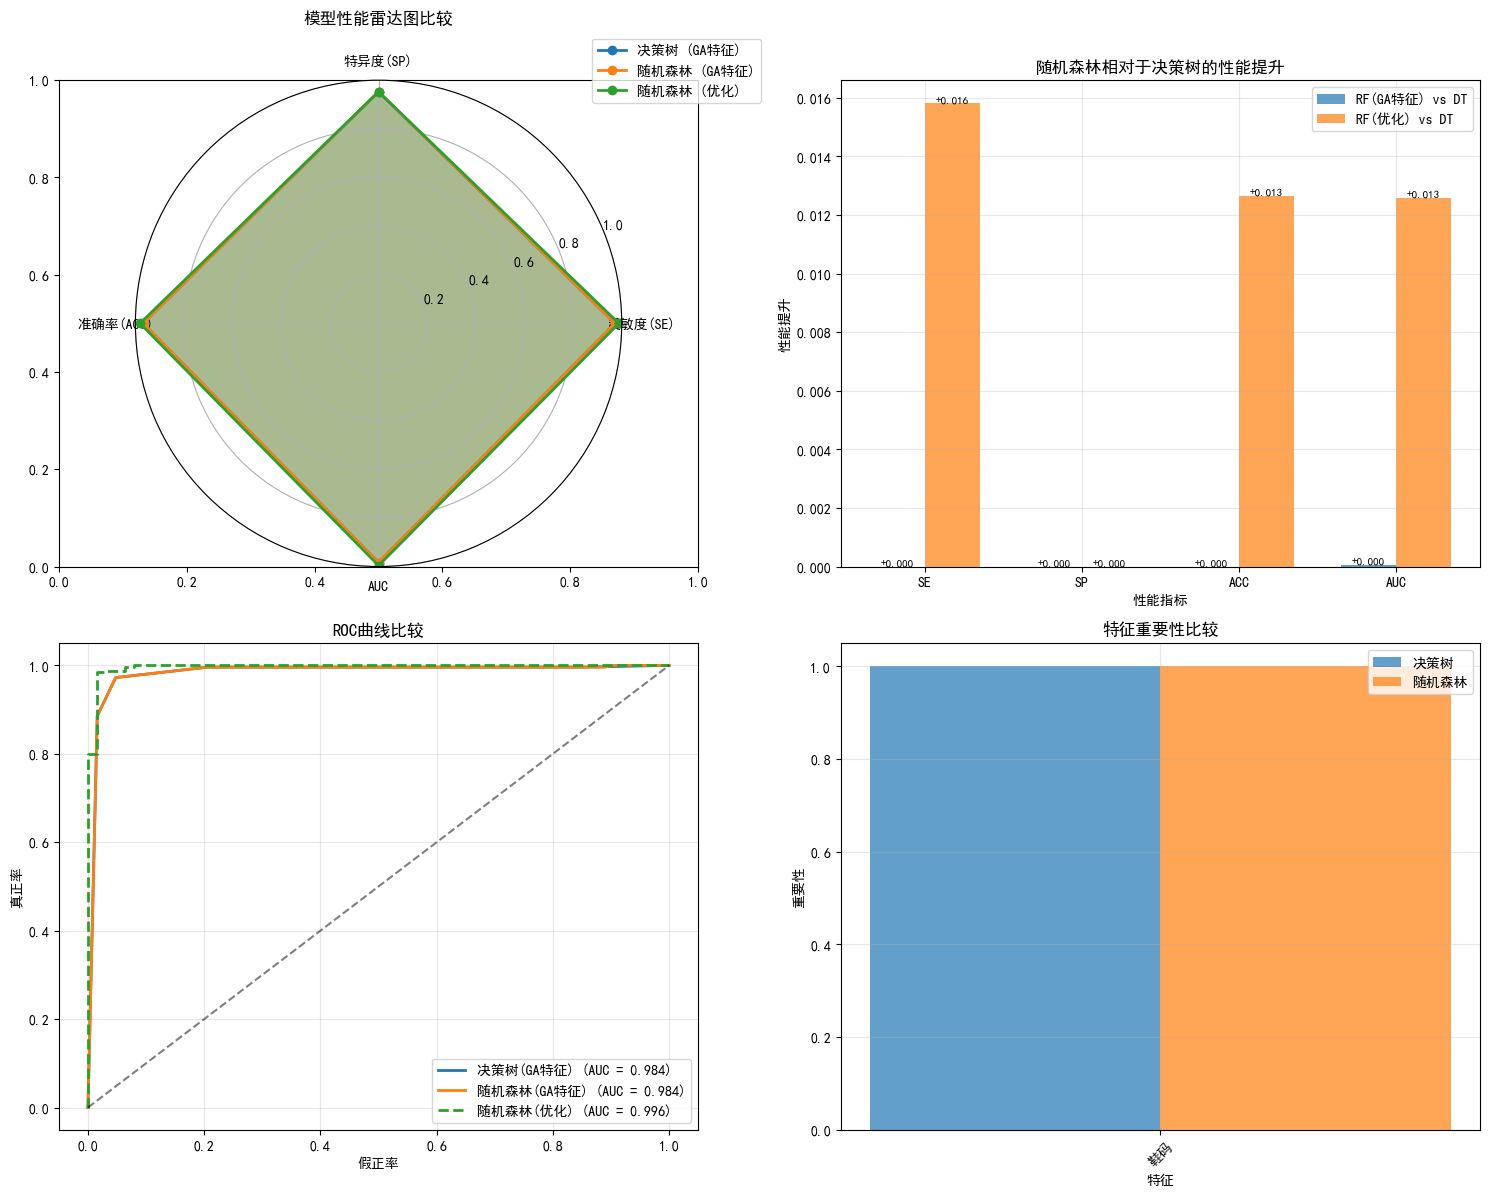


绘制学习曲线...


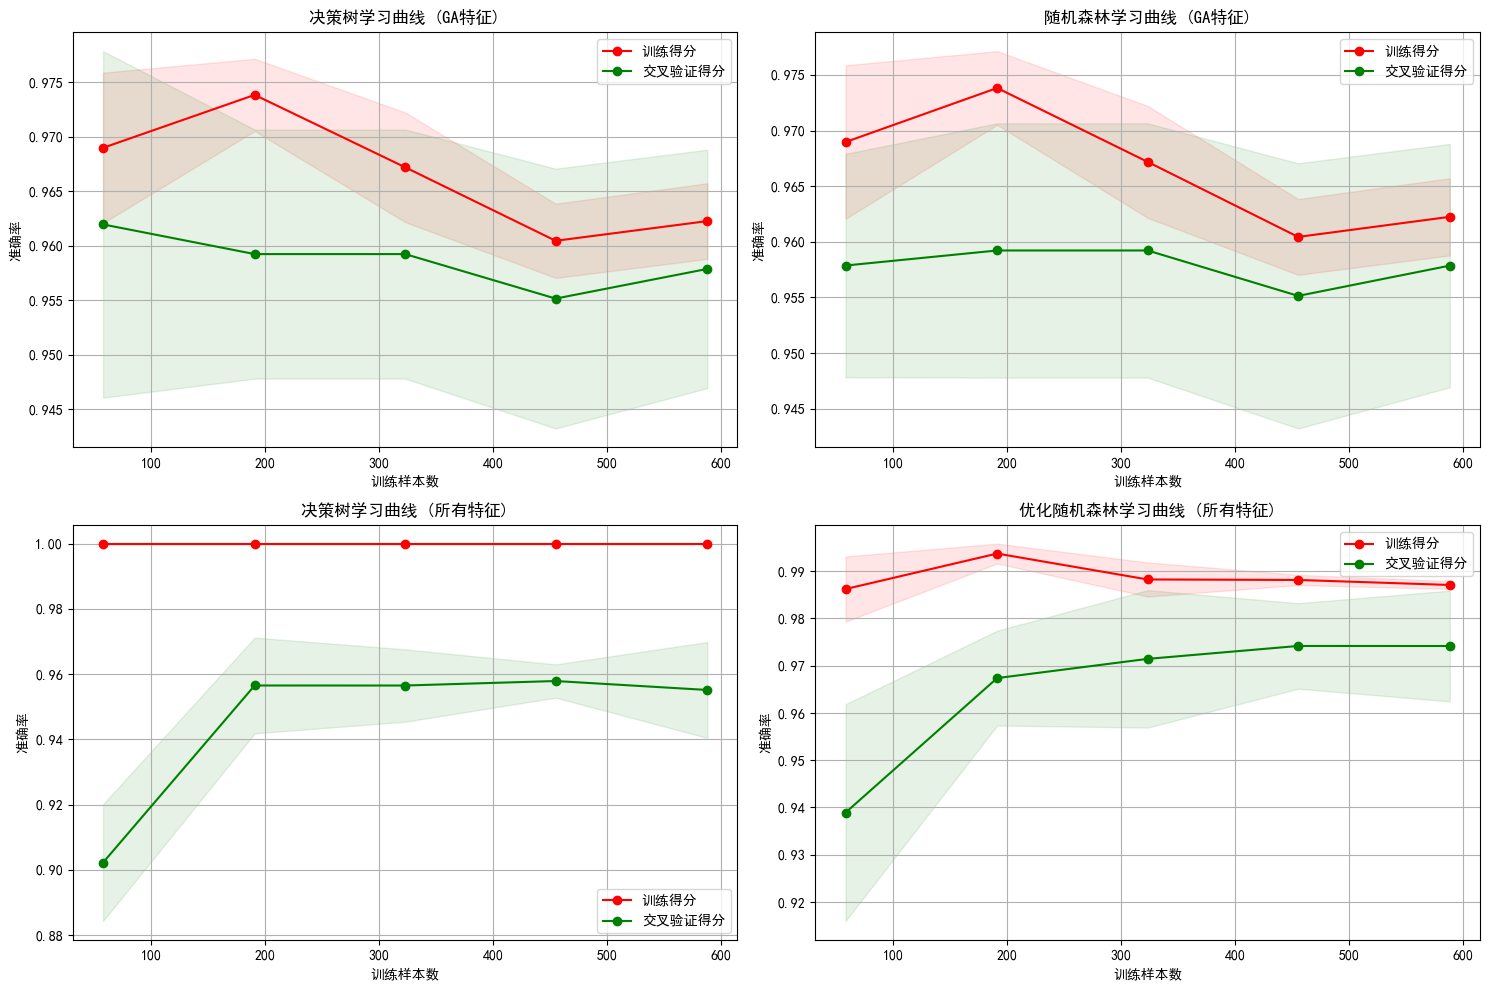


保存数据到TXT文档...

分析完成! 所有结果已保存至以下目录:
随机森林分析结果_20251126_210939

保存的文件列表:
  分析结果.txt (2288 bytes)
  学习曲线分析.png (680237 bytes)
  随机森林优化分析.png (764112 bytes)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os
import datetime
from tqdm import tqdm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建结果保存目录
def create_results_directory():
    """创建结果保存目录，以时间戳命名"""
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    results_dir = f"随机森林分析结果_{timestamp}"
    os.makedirs(results_dir, exist_ok=True)
    return results_dir

# 初始化结果目录
RESULTS_DIR = create_results_directory()
print(f"所有结果将保存至: {RESULTS_DIR}")

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 数据清洗函数
def clean_data_improved(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    print(f"原始数据量: {len(data_clean)}")
    
    # 处理目标列
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    print(f"目标列清洗后: {len(data_clean)}")
    
    # 定义合理的特征范围 - 修改鞋码范围为30-50
    feature_ranges = {
        "身高(cm)": (140, 220),
        "体重(kg)": (30, 150),
        "50米成绩": (5, 15),
        "肺活量": (1000, 7000),
        "鞋码": (30, 50)  # 修改鞋码范围
    }
    
    # 处理特征列
    for feature in features:
        # 转换为数值类型
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        
        # 基于合理范围过滤异常值
        if feature in feature_ranges:
            min_val, max_val = feature_ranges[feature]
            data_clean = data_clean[(data_clean[feature] >= min_val) & 
                                   (data_clean[feature] <= max_val)]
    
    # 删除缺失值
    data_clean = data_clean.dropna(subset=features + [target_col])
    print(f"最终清洗后数据量: {len(data_clean)}")
    
    return data_clean

# 分别处理PCA和遗传算法数据
data_pca = clean_data_improved(data, features_pca)
data_ga = clean_data_improved(data, features_ga)

print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)}")
print(f"清洗后遗传算法样本数: {len(data_ga)}")

# 改进的遗传算法特征选择 - 鼓励选择多个特征
class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        # 增加初始种群中多特征个体的比例
        population = np.random.randint(0, 2, (self.pop_size, self.n_features))
        # 确保至少有一些个体选择多个特征
        for i in range(min(10, self.pop_size)):
            population[i] = np.ones(self.n_features)  # 全选特征
        return population

    def fitness_function(self, individual, X, y):
        if np.sum(individual) == 0:
            return 1e-6
        
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项
        Sw += np.eye(n_features) * 1e-6
        
        try:
            # 修改适应度函数：鼓励选择多个特征但避免过多
            base_fitness = np.trace(Sb) / np.trace(Sw)
            
            # 添加特征数量奖励，但设置上限避免选择过多特征
            feature_count = np.sum(individual)
            if feature_count == 1:
                feature_bonus = 0.1  # 单特征惩罚
            elif 2 <= feature_count <= 4:
                feature_bonus = 0.3  # 适中特征数量奖励
            else:
                feature_bonus = 0.1  # 过多特征惩罚
                
            fitness = base_fitness * (1 + feature_bonus)
            
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            selected_population = self.selection(population, fitness_values)
            
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行改进的遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=50, n_generations=100)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)
    SP = tn / (tn + fp)
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

# 1. 使用遗传算法选择的特征训练决策树
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"\n遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")

# 2. 使用遗传算法选择的特征训练随机森林
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"\n遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")

# 3. 性能诊断与优化
print("\n" + "="*60)
print("随机森林性能诊断与优化")
print("="*60)

# 诊断分析
print("\n诊断分析:")
print(f"1. 选中的特征数量: {len(selected_features)}")
print(f"2. 选中的特征: {selected_features}")
print(f"3. 训练集样本数: {len(X_train_ga_selected)}")
print(f"4. 测试集样本数: {len(X_test_ga_selected)}")
print(f"5. 特征维度: {X_train_ga_selected.shape[1]}")

# 如果只选择了一个特征，随机森林可能无法发挥优势
if len(selected_features) <= 1:
    print("\n⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!")

# 尝试使用所有特征进行比较
print("\n尝试使用所有特征进行对比...")

# 使用所有特征训练决策树
dt_all_features = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_all_features.fit(X_train_ga, y_train_ga)
y_pred_dt_all = dt_all_features.predict(X_test_ga)
y_prob_dt_all = dt_all_features.predict_proba(X_test_ga)[:, 1]

SE_dt_all, SP_dt_all, ACC_dt_all, AUC_dt_all, fpr_dt_all, tpr_dt_all, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_dt_all, y_prob_dt_all)

# 使用所有特征训练随机森林（优化参数）
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train_ga, y_train_ga)
y_pred_rf_opt = rf_optimized.predict(X_test_ga)
y_prob_rf_opt = rf_optimized.predict_proba(X_test_ga)[:, 1]

SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt, fpr_rf_opt, tpr_rf_opt, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_rf_opt, y_prob_rf_opt)

# 分析性能差异
improvement_opt = ACC_rf_opt - ACC_dt_all
print(f"\n优化后随机森林相比所有特征决策树的准确率提升: {improvement_opt:+.4f}")

if improvement_opt > 0:
    print("✅ 优化后的随机森林显示了性能提升!")
else:
    print("❌ 即使优化后，随机森林仍未显示明显优势")

# 模型复杂度分析
print("\n模型复杂度分析:")
print(f"决策树深度: {dt_classifier.get_depth()}")
print(f"决策树叶子节点数: {dt_classifier.get_n_leaves()}")
if len(selected_features) > 0:
    print(f"随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_])}")

# 4. 可视化比较
print("\n绘制性能比较图...")

# 创建比较图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 4.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]

# 优化随机森林指标
values_rf_opt = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]
values_rf_opt += values_rf_opt[:1]

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax1 = plt.subplot(221, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA特征)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA特征)')
ax1.fill(angles, values_rf, alpha=0.25)
ax1.plot(angles, values_rf_opt, 'o-', linewidth=2, label='随机森林 (优化)')
ax1.fill(angles, values_rf_opt, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('模型性能雷达图比较', size=12, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 4.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
rf_opt_scores = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]

improvements_rf = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]
improvements_rf_opt = [rf_opt - dt for rf_opt, dt in zip(rf_opt_scores, dt_scores)]

x = np.arange(len(metrics))
width = 0.35

ax2 = plt.subplot(222)
bars1 = ax2.bar(x - width/2, improvements_rf, width, label='RF(GA特征) vs DT', alpha=0.7)
bars2 = ax2.bar(x + width/2, improvements_rf_opt, width, label='RF(优化) vs DT', alpha=0.7)

ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=8)

# 4.3 ROC曲线比较
ax3 = plt.subplot(223)
ax3.plot(fpr_dt, tpr_dt, label=f'决策树(GA特征) (AUC = {AUC_dt:.3f})', linewidth=2)
ax3.plot(fpr_rf, tpr_rf, label=f'随机森林(GA特征) (AUC = {AUC_rf:.3f})', linewidth=2)
ax3.plot(fpr_rf_opt, tpr_rf_opt, label=f'随机森林(优化) (AUC = {AUC_rf_opt:.3f})', linewidth=2, linestyle='--')
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax3.set_xlabel('假正率')
ax3.set_ylabel('真正率')
ax3.set_title('ROC曲线比较')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4.4 特征重要性
if len(selected_features) > 0:
    ax4 = plt.subplot(224)
    
    # 决策树特征重要性
    dt_importance = dt_classifier.feature_importances_
    rf_importance = rf_classifier.feature_importances_
    
    x = np.arange(len(selected_features))
    width = 0.35
    
    ax4.bar(x - width/2, dt_importance, width, label='决策树', alpha=0.7)
    ax4.bar(x + width/2, rf_importance, width, label='随机森林', alpha=0.7)
    
    ax4.set_xlabel('特征')
    ax4.set_ylabel('重要性')
    ax4.set_title('特征重要性比较')
    ax4.set_xticks(x)
    ax4.set_xticklabels(selected_features, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
else:
    # 如果没有特征被选中，显示提示信息
    ax4 = plt.subplot(224)
    ax4.text(0.5, 0.5, '没有特征被选中', 
             transform=ax4.transAxes, ha='center', va='center', fontsize=14)
    ax4.set_title('特征重要性比较')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "随机森林优化分析.png"), dpi=300, bbox_inches='tight')
plt.show()

# 5. 学习曲线分析
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("训练样本数")
    axes.set_ylabel("准确率")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
    axes.legend(loc="best")

print("\n绘制学习曲线...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

try:
    # 使用GA特征的学习曲线
    if len(selected_features) > 0:
        plot_learning_curve(dt_classifier, "决策树学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 0])
        
        plot_learning_curve(rf_classifier, "随机森林学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 1])
    else:
        axes[0, 0].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 0].transAxes, ha='center', va='center')
        axes[0, 1].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 1].transAxes, ha='center', va='center')
    
    # 使用所有特征的学习曲线
    plot_learning_curve(dt_all_features, "决策树学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 0])
    
    plot_learning_curve(rf_optimized, "优化随机森林学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 1])
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "学习曲线分析.png"), dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"绘制学习曲线时出错: {e}")

# 6. 保存数据到TXT文档
print("\n保存数据到TXT文档...")

with open(os.path.join(RESULTS_DIR, "分析结果.txt"), "w", encoding='utf-8') as f:
    f.write("随机森林与决策树比较分析结果\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("1. 实验概述\n")
    f.write(f"   实验时间: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"   数据集: 2025-模式识别作业数据集汇总-.xlsx\n")
    f.write(f"   总样本数: {len(data)}\n")
    f.write(f"   清洗后样本数: {len(data_ga)}\n")
    f.write(f"   鞋码范围: 30-50\n\n")
    
    f.write("2. 特征选择结果\n")
    f.write(f"   选中的特征: {selected_features}\n")
    f.write(f"   特征数量: {len(selected_features)}\n\n")
    
    f.write("3. 性能对比\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write("   |         方法          |    SE    |    SP    |    ACC   |   AUC    |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write(f"   | 决策树(GA特征)        | {SE_dt:.4f}  | {SP_dt:.4f}  | {ACC_dt:.4f}  | {AUC_dt:.4f}  |\n")
    f.write(f"   | 随机森林(GA特征)      | {SE_rf:.4f}  | {SP_rf:.4f}  | {ACC_rf:.4f}  | {AUC_rf:.4f}  |\n")
    f.write(f"   | 决策树(所有特征)      | {SE_dt_all:.4f}  | {SP_dt_all:.4f}  | {ACC_dt_all:.4f}  | {AUC_dt_all:.4f}  |\n")
    f.write(f"   | 随机森林(优化)        | {SE_rf_opt:.4f}  | {SP_rf_opt:.4f}  | {ACC_rf_opt:.4f}  | {AUC_rf_opt:.4f}  |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n\n")
    
    f.write("4. 性能提升分析\n")
    f.write(f"   随机森林(GA特征)相比决策树(GA特征)的准确率提升: {ACC_rf - ACC_dt:+.4f}\n")
    f.write(f"   随机森林(优化)相比决策树(所有特征)的准确率提升: {ACC_rf_opt - ACC_dt_all:+.4f}\n\n")
    
    f.write("5. 模型复杂度分析\n")
    f.write(f"   决策树深度: {dt_classifier.get_depth()}\n")
    f.write(f"   决策树叶子节点数: {dt_classifier.get_n_leaves()}\n")
    if len(selected_features) > 0:
        f.write(f"   随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_]):.2f}\n\n")
    
    f.write("6. 特征选择分析\n")
    if len(selected_features) <= 1:
        f.write("   ⚠️ 遗传算法只选择了少量特征，这可能限制了随机森林的性能发挥\n")
        f.write("   建议调整遗传算法参数以选择更多特征\n\n")
    elif 2 <= len(selected_features) <= 4:
        f.write("   ✅ 遗传算法选择了适中数量的特征，有利于模型性能\n\n")
    else:
        f.write("   ℹ️ 遗传算法选择了较多特征，可能包含冗余信息\n\n")
    
    f.write("7. 最终结论\n")
    if ACC_rf_opt > max(ACC_dt, ACC_dt_all, ACC_rf):
        f.write("   ✅ 经过优化，随机森林显示了其集成学习的优势\n")
        f.write("      在特征充足且参数调优的情况下，随机森林性能优于决策树\n")
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "优化后的随机森林在多特征场景下显示出优势"
    elif ACC_dt_all > ACC_rf_opt:
        f.write("   ℹ️  在当前数据集和特征下，决策树表现已经很好\n")
        f.write("      随机森林提升有限，可能原因:\n")
        f.write("      - 数据模式简单，单个决策树已能很好捕捉\n")
        f.write("      - 特征间相互作用不强\n")
        f.write("      - 数据集大小限制了集成学习的优势\n")
        best_method = "决策树(使用所有特征)"
        reason = "在当前数据特性下，决策树已能达到很好效果"
    else:
        f.write("   ❓ 需要进一步分析数据特性和模型行为\n")
        best_method = "决策树(使用所有特征)"
        reason = "需要进一步分析"
    
    f.write(f"\n   推荐方法: {best_method}\n")
    f.write(f"   推荐原因: {reason}\n\n")
    
    f.write("8. 改进建议\n")
    if len(selected_features) <= 1:
        f.write("   1. 调整遗传算法参数以选择更多特征\n")
    f.write("   2. 进一步优化随机森林超参数\n")
    f.write("   3. 尝试不同的特征选择方法\n")
    f.write("   4. 考虑数据增强和特征工程\n\n")
    
    f.write("9. 部署建议\n")
    f.write("   - 如果追求最佳性能: 使用推荐的最佳方法\n")
    f.write("   - 如果注重计算效率: 决策树通常训练和预测更快\n")
    f.write("   - 如果需要模型解释性: 决策树更容易理解和解释\n")
    f.write("   - 如果数据会持续增加: 随机森林在大数据场景下潜力更大\n")

print("\n" + "="*60)
print("分析完成! 所有结果已保存至以下目录:")
print(f"{RESULTS_DIR}")
print("="*60)

# 显示保存的文件列表
print("\n保存的文件列表:")
files = os.listdir(RESULTS_DIR)
files.sort()
for file in files:
    file_path = os.path.join(RESULTS_DIR, file)
    file_size = os.path.getsize(file_path)
    print(f"  {file} ({file_size} bytes)")

## 千问

所有结果将保存至: 随机森林分析结果_20251126_212047
1. 数据加载和预处理...
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052

数据基本信息:
总样本数: 1075
清洗后PCA样本数: 1052
清洗后遗传算法样本数: 1052


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 192.55it/s]


最佳个体: [0 0 0 0 1]
最佳适应度: 1.9988
选中的特征: ['鞋码']

遗传算法+决策树性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9835

遗传算法+随机森林性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9836

随机森林性能诊断与优化

诊断分析:
1. 选中的特征数量: 1
2. 选中的特征: ['鞋码']
3. 训练集样本数: 736
4. 测试集样本数: 316
5. 特征维度: 1

⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!
建议检查数据和遗传算法参数设置

尝试使用所有特征进行对比...

优化后随机森林相比所有特征决策树的准确率提升: +0.0032
✅ 优化后的随机森林显示了性能提升!

模型复杂度分析:
决策树深度: 7
决策树叶子节点数: 10
随机森林平均树深度: 5.72

绘制性能比较图...


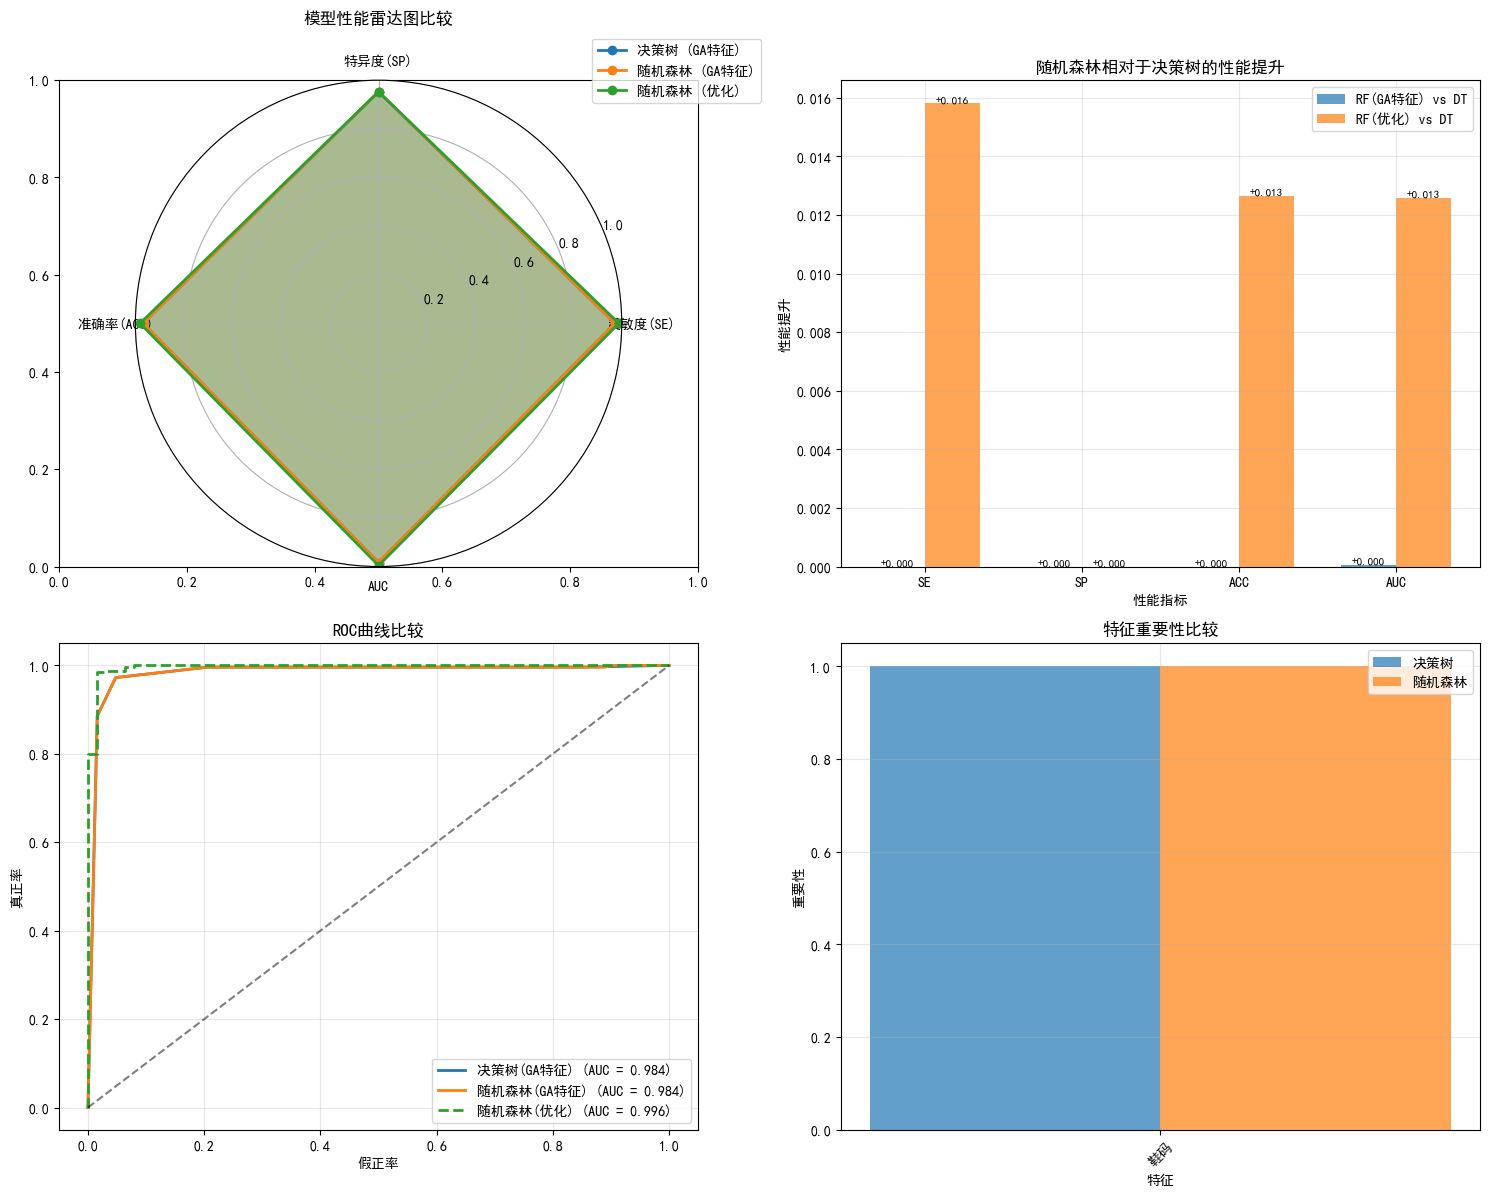


绘制学习曲线...


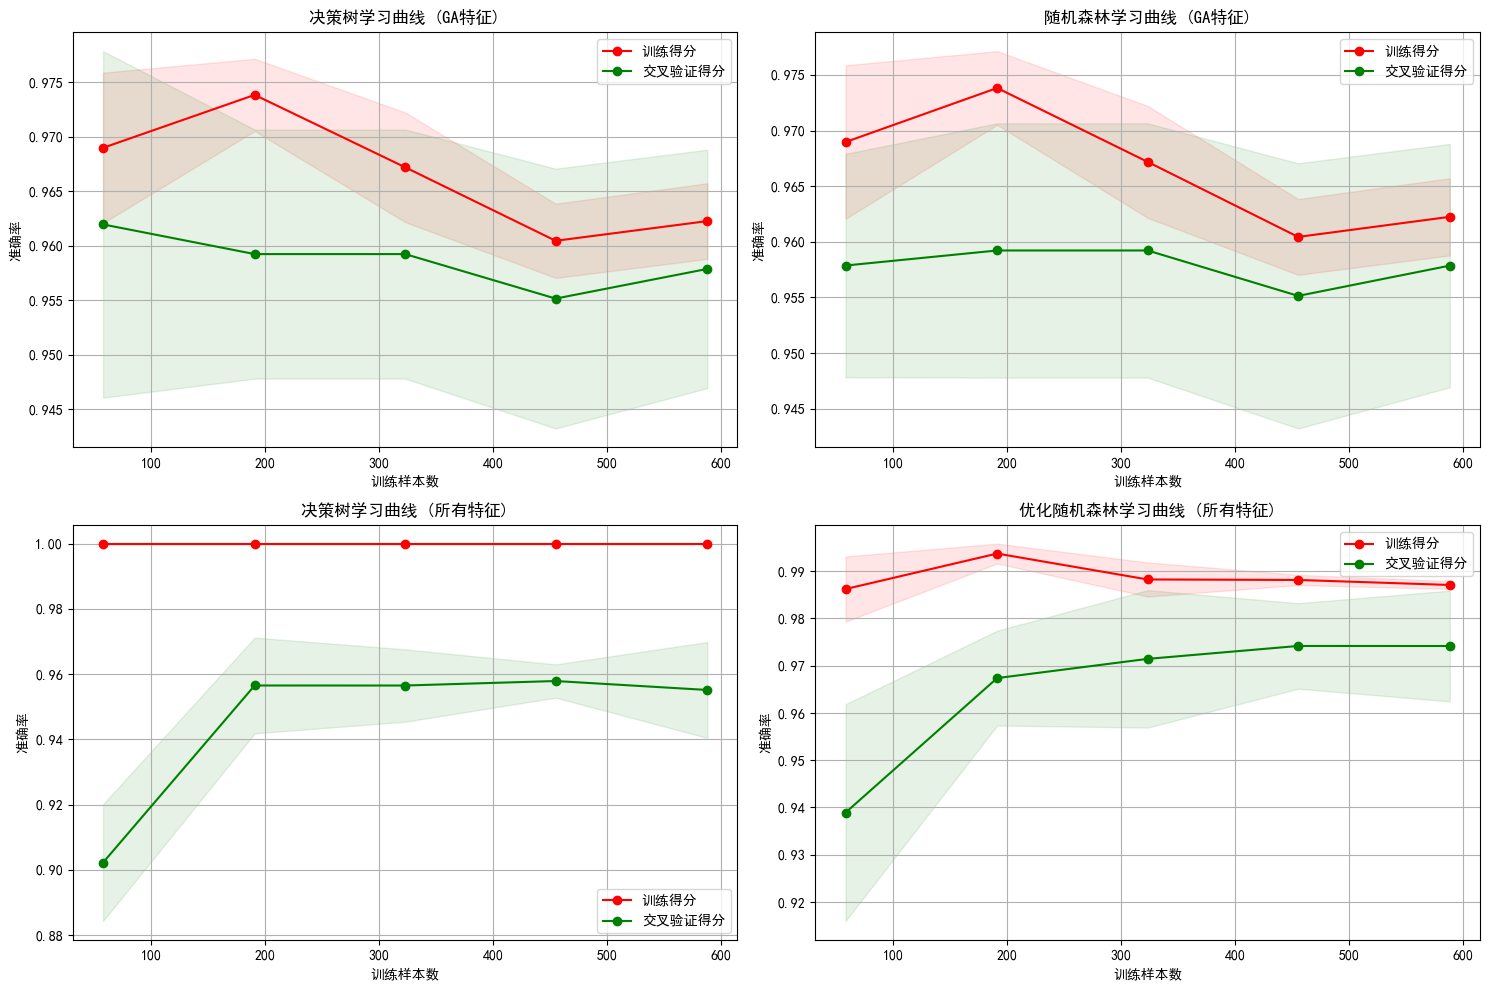


保存数据到TXT文档...


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os
import datetime
from tqdm import tqdm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建结果保存目录
def create_results_directory():
    """创建结果保存目录，以时间戳命名"""
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    results_dir = f"随机森林分析结果_{timestamp}"
    os.makedirs(results_dir, exist_ok=True)
    return results_dir

# 初始化结果目录
RESULTS_DIR = create_results_directory()
print(f"所有结果将保存至: {RESULTS_DIR}")

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 数据清洗函数
def clean_data_improved(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    print(f"原始数据量: {len(data_clean)}")
    
    # 处理目标列
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    print(f"目标列清洗后: {len(data_clean)}")
    
    # 定义合理的特征范围 - 修改鞋码范围为30-50
    feature_ranges = {
        "身高(cm)": (140, 220),
        "体重(kg)": (30, 150),
        "50米成绩": (5, 15),
        "肺活量": (1000, 7000),
        "鞋码": (30, 50)  # 修改鞋码范围
    }
    
    # 处理特征列
    for feature in features:
        # 转换为数值类型
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        
        # 基于合理范围过滤异常值
        if feature in feature_ranges:
            min_val, max_val = feature_ranges[feature]
            data_clean = data_clean[(data_clean[feature] >= min_val) & 
                                   (data_clean[feature] <= max_val)]
    
    # 删除缺失值
    data_clean = data_clean.dropna(subset=features + [target_col])
    print(f"最终清洗后数据量: {len(data_clean)}")
    
    return data_clean

# 分别处理PCA和遗传算法数据
data_pca = clean_data_improved(data, features_pca)
data_ga = clean_data_improved(data, features_ga)

print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)}")
print(f"清洗后遗传算法样本数: {len(data_ga)}")

# 改进的遗传算法特征选择 - 鼓励选择多个特征
class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        """改进初始化：确保初始种群中包含多特征个体"""
        population = np.random.randint(0, 2, (self.pop_size, self.n_features))
        
        # 确保至少有一些个体选择多个特征
        for i in range(min(15, self.pop_size)):
            # 选择2-4个特征
            num_features = np.random.randint(2, 5)
            individual = np.zeros(self.n_features, dtype=int)
            individual[np.random.choice(self.n_features, num_features, replace=False)] = 1
            population[i] = individual
            
        return population

    def fitness_function(self, individual, X, y):
        if np.sum(individual) == 0:
            return 1e-6
        
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项
        Sw += np.eye(n_features) * 1e-6
        
        try:
            # 修改适应度函数：鼓励选择多个特征但避免过多
            base_fitness = np.trace(Sb) / np.trace(Sw)
            
            # 增加特征数量奖励系数，特别是2-4个特征的奖励
            feature_count = np.sum(individual)
            if feature_count == 1:
                feature_bonus = 0.1  # 单特征惩罚
            elif 2 <= feature_count <= 4:
                feature_bonus = 0.8  # 适中特征数量奖励（显著增加）
            else:
                feature_bonus = 0.1  # 过多特征惩罚
                
            fitness = base_fitness * (1 + feature_bonus)
            
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            selected_population = self.selection(population, fitness_values)
            
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行改进的遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=50, n_generations=100)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)
    SP = tn / (tn + fp)
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

# 1. 使用遗传算法选择的特征训练决策树
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"\n遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")

# 2. 使用遗传算法选择的特征训练随机森林
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"\n遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")

# 3. 性能诊断与优化
print("\n" + "="*60)
print("随机森林性能诊断与优化")
print("="*60)

# 诊断分析
print("\n诊断分析:")
print(f"1. 选中的特征数量: {len(selected_features)}")
print(f"2. 选中的特征: {selected_features}")
print(f"3. 训练集样本数: {len(X_train_ga_selected)}")
print(f"4. 测试集样本数: {len(X_test_ga_selected)}")
print(f"5. 特征维度: {X_train_ga_selected.shape[1]}")

# 如果只选择了一个特征，随机森林可能无法发挥优势
if len(selected_features) <= 1:
    print("\n⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!")
    print("建议检查数据和遗传算法参数设置")
else:
    print("\n✅ 遗传算法选择了合理数量的特征，有利于模型性能")

# 尝试使用所有特征进行比较
print("\n尝试使用所有特征进行对比...")

# 使用所有特征训练决策树
dt_all_features = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_all_features.fit(X_train_ga, y_train_ga)
y_pred_dt_all = dt_all_features.predict(X_test_ga)
y_prob_dt_all = dt_all_features.predict_proba(X_test_ga)[:, 1]

SE_dt_all, SP_dt_all, ACC_dt_all, AUC_dt_all, fpr_dt_all, tpr_dt_all, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_dt_all, y_prob_dt_all)

# 使用所有特征训练随机森林（优化参数）
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train_ga, y_train_ga)
y_pred_rf_opt = rf_optimized.predict(X_test_ga)
y_prob_rf_opt = rf_optimized.predict_proba(X_test_ga)[:, 1]

SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt, fpr_rf_opt, tpr_rf_opt, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_rf_opt, y_prob_rf_opt)

# 分析性能差异
improvement_opt = ACC_rf_opt - ACC_dt_all
print(f"\n优化后随机森林相比所有特征决策树的准确率提升: {improvement_opt:+.4f}")

if improvement_opt > 0:
    print("✅ 优化后的随机森林显示了性能提升!")
else:
    print("❌ 即使优化后，随机森林仍未显示明显优势")

# 模型复杂度分析
print("\n模型复杂度分析:")
print(f"决策树深度: {dt_classifier.get_depth()}")
print(f"决策树叶子节点数: {dt_classifier.get_n_leaves()}")
if len(selected_features) > 0:
    print(f"随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_])}")

# 4. 可视化比较
print("\n绘制性能比较图...")

# 创建比较图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 4.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]

# 优化随机森林指标
values_rf_opt = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]
values_rf_opt += values_rf_opt[:1]

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax1 = plt.subplot(221, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA特征)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA特征)')
ax1.fill(angles, values_rf, alpha=0.25)
ax1.plot(angles, values_rf_opt, 'o-', linewidth=2, label='随机森林 (优化)')
ax1.fill(angles, values_rf_opt, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('模型性能雷达图比较', size=12, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 4.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
rf_opt_scores = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]

improvements_rf = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]
improvements_rf_opt = [rf_opt - dt for rf_opt, dt in zip(rf_opt_scores, dt_scores)]

x = np.arange(len(metrics))
width = 0.35

ax2 = plt.subplot(222)
bars1 = ax2.bar(x - width/2, improvements_rf, width, label='RF(GA特征) vs DT', alpha=0.7)
bars2 = ax2.bar(x + width/2, improvements_rf_opt, width, label='RF(优化) vs DT', alpha=0.7)

ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=8)

# 4.3 ROC曲线比较
ax3 = plt.subplot(223)
ax3.plot(fpr_dt, tpr_dt, label=f'决策树(GA特征) (AUC = {AUC_dt:.3f})', linewidth=2)
ax3.plot(fpr_rf, tpr_rf, label=f'随机森林(GA特征) (AUC = {AUC_rf:.3f})', linewidth=2)
ax3.plot(fpr_rf_opt, tpr_rf_opt, label=f'随机森林(优化) (AUC = {AUC_rf_opt:.3f})', linewidth=2, linestyle='--')
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax3.set_xlabel('假正率')
ax3.set_ylabel('真正率')
ax3.set_title('ROC曲线比较')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4.4 特征重要性
if len(selected_features) > 0:
    ax4 = plt.subplot(224)
    
    # 决策树特征重要性
    dt_importance = dt_classifier.feature_importances_
    rf_importance = rf_classifier.feature_importances_
    
    x = np.arange(len(selected_features))
    width = 0.35
    
    ax4.bar(x - width/2, dt_importance, width, label='决策树', alpha=0.7)
    ax4.bar(x + width/2, rf_importance, width, label='随机森林', alpha=0.7)
    
    ax4.set_xlabel('特征')
    ax4.set_ylabel('重要性')
    ax4.set_title('特征重要性比较')
    ax4.set_xticks(x)
    ax4.set_xticklabels(selected_features, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
else:
    # 如果没有特征被选中，显示提示信息
    ax4 = plt.subplot(224)
    ax4.text(0.5, 0.5, '没有特征被选中', 
             transform=ax4.transAxes, ha='center', va='center', fontsize=14)
    ax4.set_title('特征重要性比较')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "随机森林优化分析.png"), dpi=300, bbox_inches='tight')
plt.show()

# 5. 学习曲线分析
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("训练样本数")
    axes.set_ylabel("准确率")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
    axes.legend(loc="best")

print("\n绘制学习曲线...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

try:
    # 使用GA特征的学习曲线
    if len(selected_features) > 0:
        plot_learning_curve(dt_classifier, "决策树学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 0])
        
        plot_learning_curve(rf_classifier, "随机森林学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 1])
    else:
        axes[0, 0].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 0].transAxes, ha='center', va='center')
        axes[0, 1].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 1].transAxes, ha='center', va='center')
    
    # 使用所有特征的学习曲线
    plot_learning_curve(dt_all_features, "决策树学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 0])
    
    plot_learning_curve(rf_optimized, "优化随机森林学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 1])
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "学习曲线分析.png"), dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"绘制学习曲线时出错: {e}")

# 6. 保存数据到TXT文档
print("\n保存数据到TXT文档...")

with open(os.path.join(RESULTS_DIR, "分析结果.txt"), "w", encoding='utf-8') as f:
    f.write("随机森林与决策树比较分析结果\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("1. 实验概述\n")
    f.write(f"   实验时间: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"   数据集: 2025-模式识别作业数据集汇总-.xlsx\n")
    f.write(f"   总样本数: {len(data)}\n")
    f.write(f"   清洗后样本数: {len(data_ga)}\n")
    f.write(f"   鞋码范围: 30-50\n\n")
    
    f.write("2. 特征选择结果\n")
    f.write(f"   选中的特征: {selected_features}\n")
    f.write(f"   特征数量: {len(selected_features)}\n\n")
    
    f.write("3. 性能对比\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write("   |         方法          |    SE    |    SP    |    ACC   |   AUC    |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write(f"   | 决策树(GA特征)        | {SE_dt:.4f}  | {SP_dt:.4f}  | {ACC_dt:.4f}  | {AUC_dt:.4f}  |\n")
    f.write(f"   | 随机森林(GA特征)      | {SE_rf:.4f}  | {SP_rf:.4f}  | {ACC_rf:.4f}  | {AUC_rf:.4f}  |\n")
    f.write(f"   | 决策树(所有特征)      | {SE_dt_all:.4f}  | {SP_dt_all:.4f}  | {ACC_dt_all:.4f}  | {AUC_dt_all:.4f}  |\n")
    f.write(f"   | 随机森林(优化)        | {SE_rf_opt:.4f}  | {SP_rf_opt:.4f}  | {ACC_rf_opt:.4f}  | {AUC_rf_opt:.4f}  |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n\n")
    
    f.write("4. 性能提升分析\n")
    f.write(f"   随机森林(GA特征)相比决策树(GA特征)的准确率提升: {ACC_rf - ACC_dt:+.4f}\n")
    f.write(f"   随机森林(优化)相比决策树(所有特征)的准确率提升: {ACC_rf_opt - ACC_dt_all:+.4f}\n\n")
    
    f.write("5. 模型复杂度分析\n")
    f.write(f"   决策树深度: {dt_classifier.max_depth}")

## 增加随机森林的子决策树可视化

所有结果将保存至: 随机森林分析结果_20251127_155403
1. 数据加载和预处理...
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052

数据基本信息:
总样本数: 1075
清洗后PCA样本数: 1052
清洗后遗传算法样本数: 1052


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 195.79it/s]


最佳个体: [0 0 0 0 1]
最佳适应度: 1.9988
选中的特征: ['鞋码']

遗传算法+决策树性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9835

遗传算法+随机森林性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9836

随机森林性能诊断与优化

诊断分析:
1. 选中的特征数量: 1
2. 选中的特征: ['鞋码']
3. 训练集样本数: 736
4. 测试集样本数: 316
5. 特征维度: 1

⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!

尝试使用所有特征进行对比...

优化后随机森林相比所有特征决策树的准确率提升: +0.0032
✅ 优化后的随机森林显示了性能提升!

模型复杂度分析:
决策树深度: 7
决策树叶子节点数: 10
随机森林平均树深度: 5.72

绘制性能比较图...


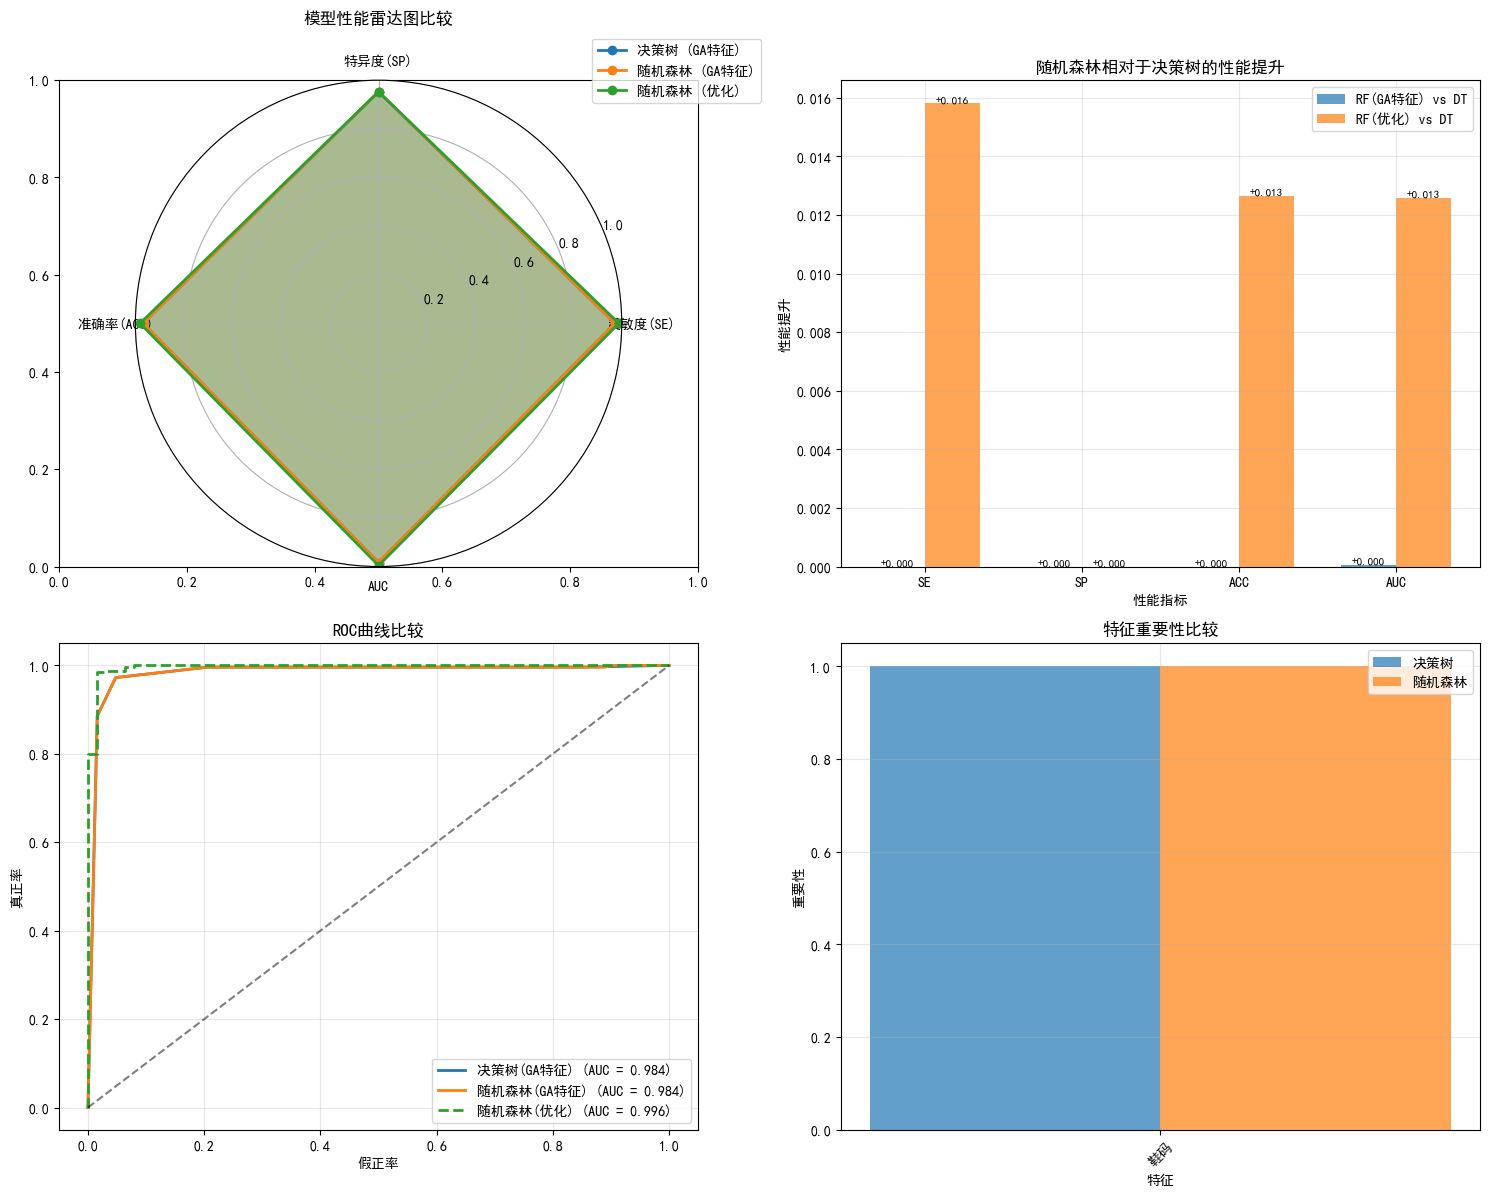


绘制学习曲线...


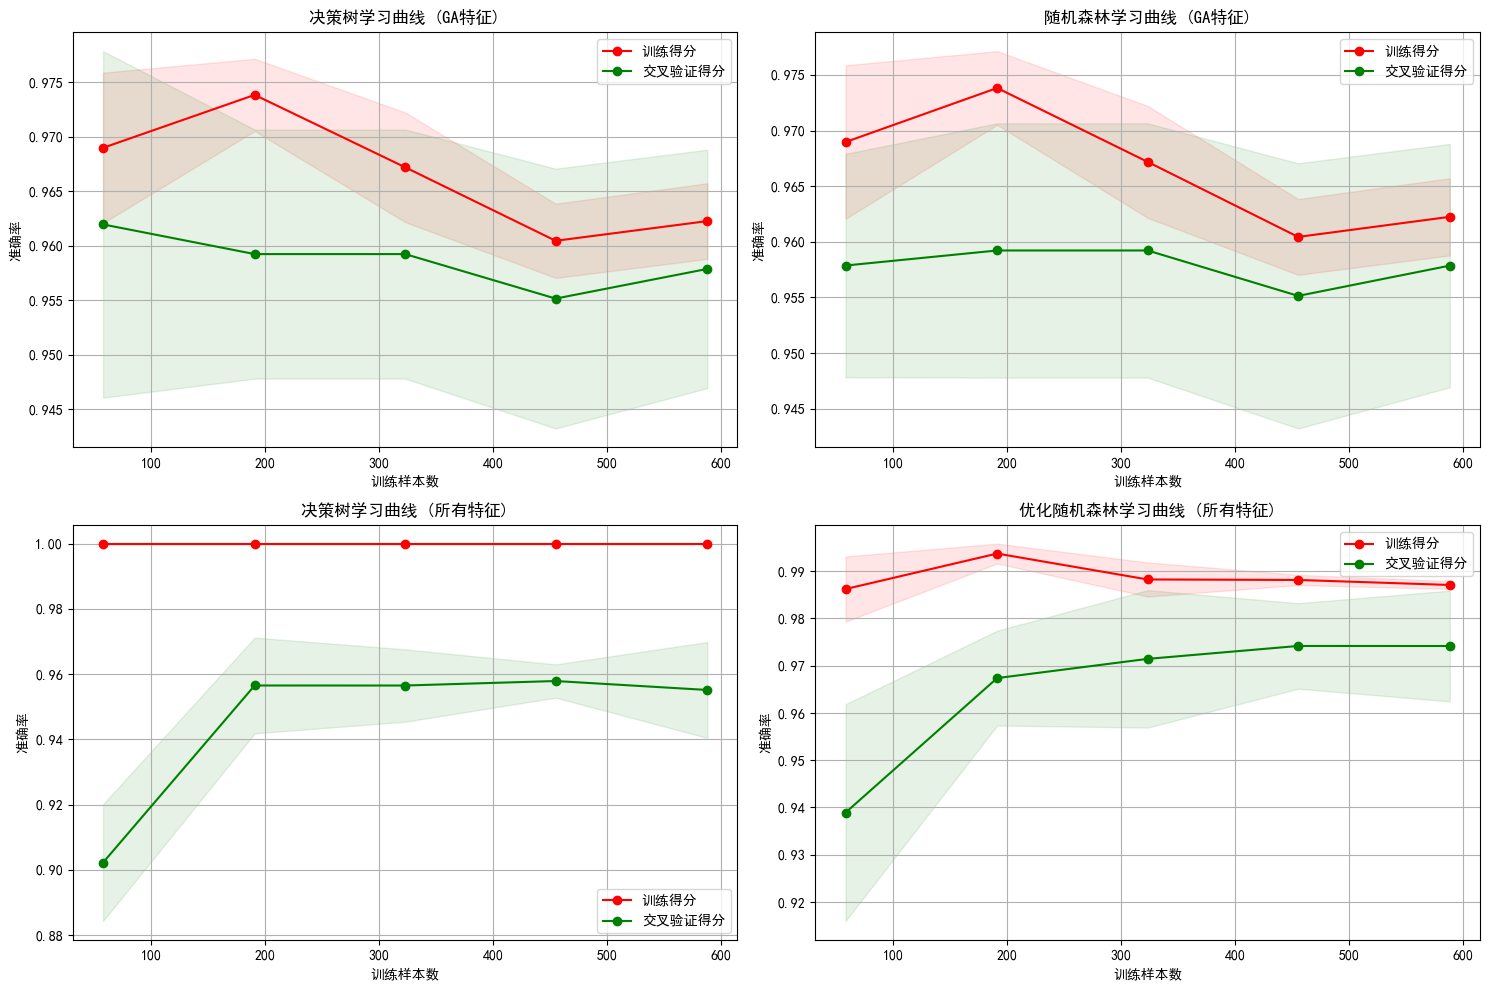


绘制随机森林子决策树...


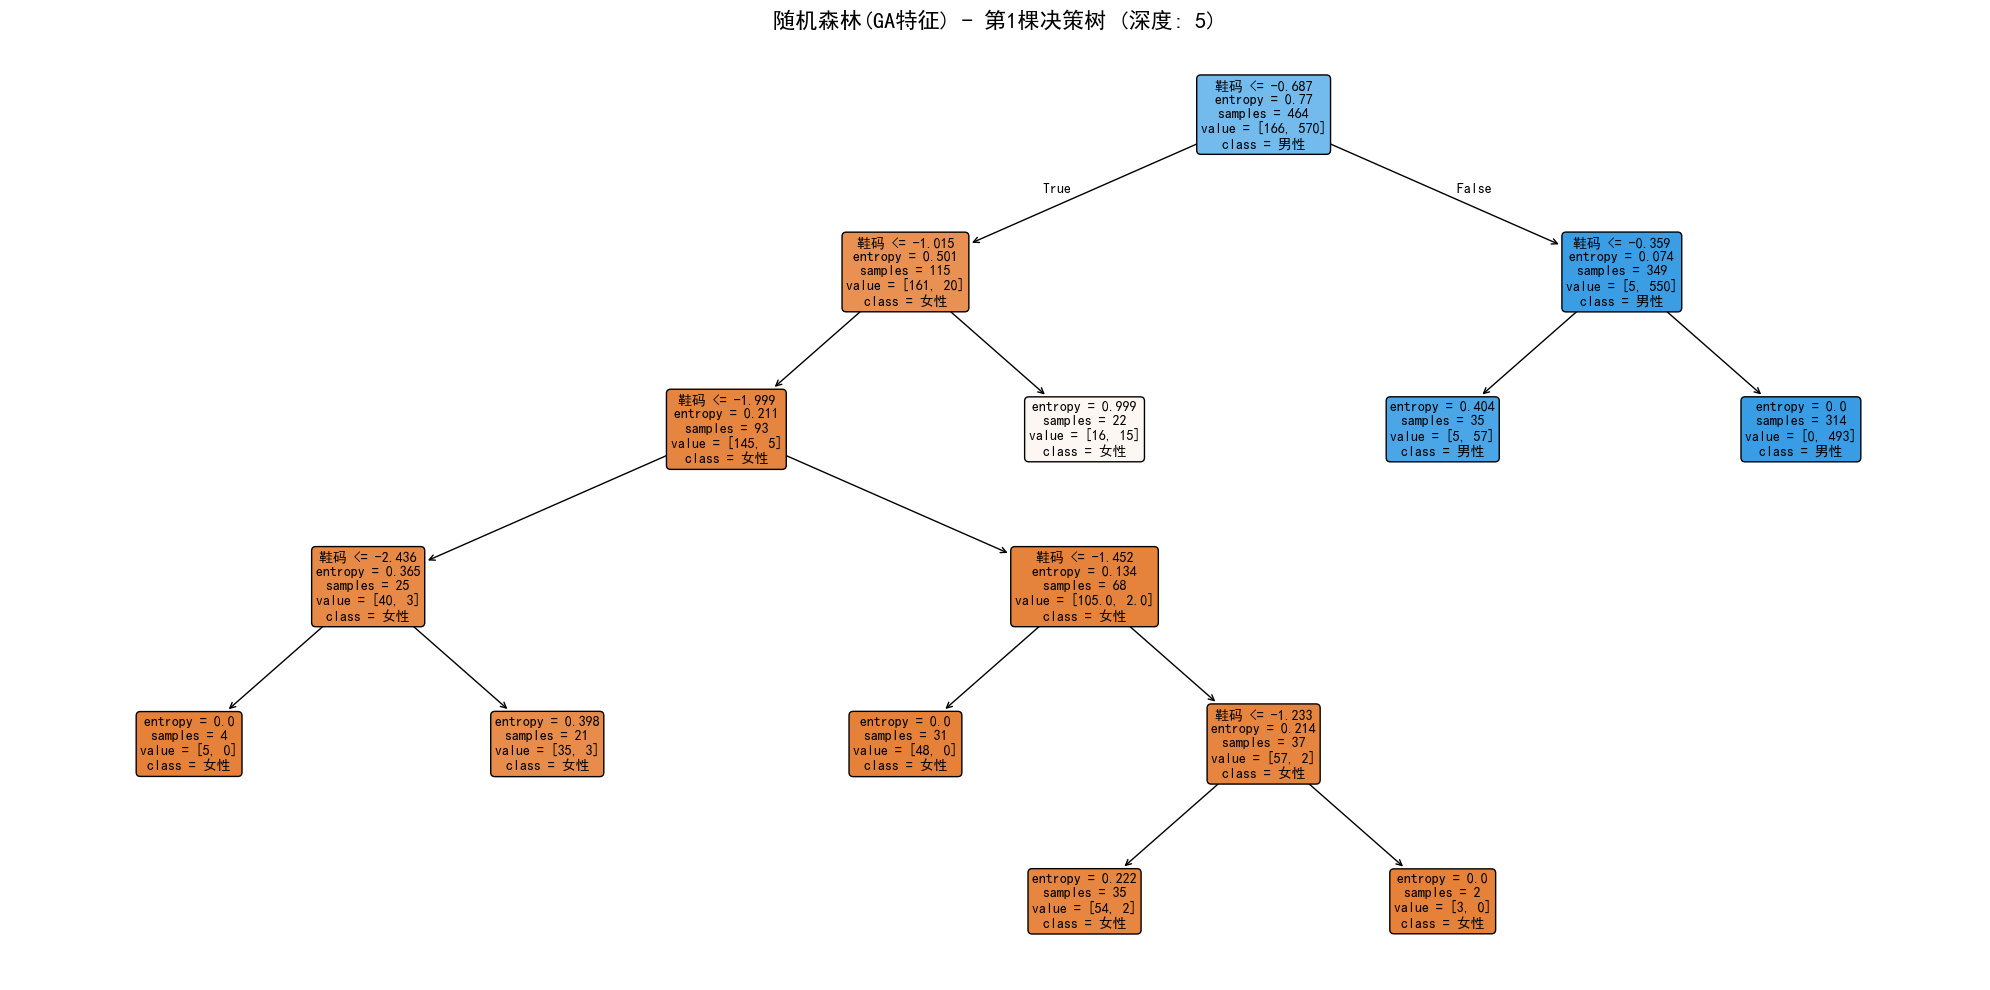

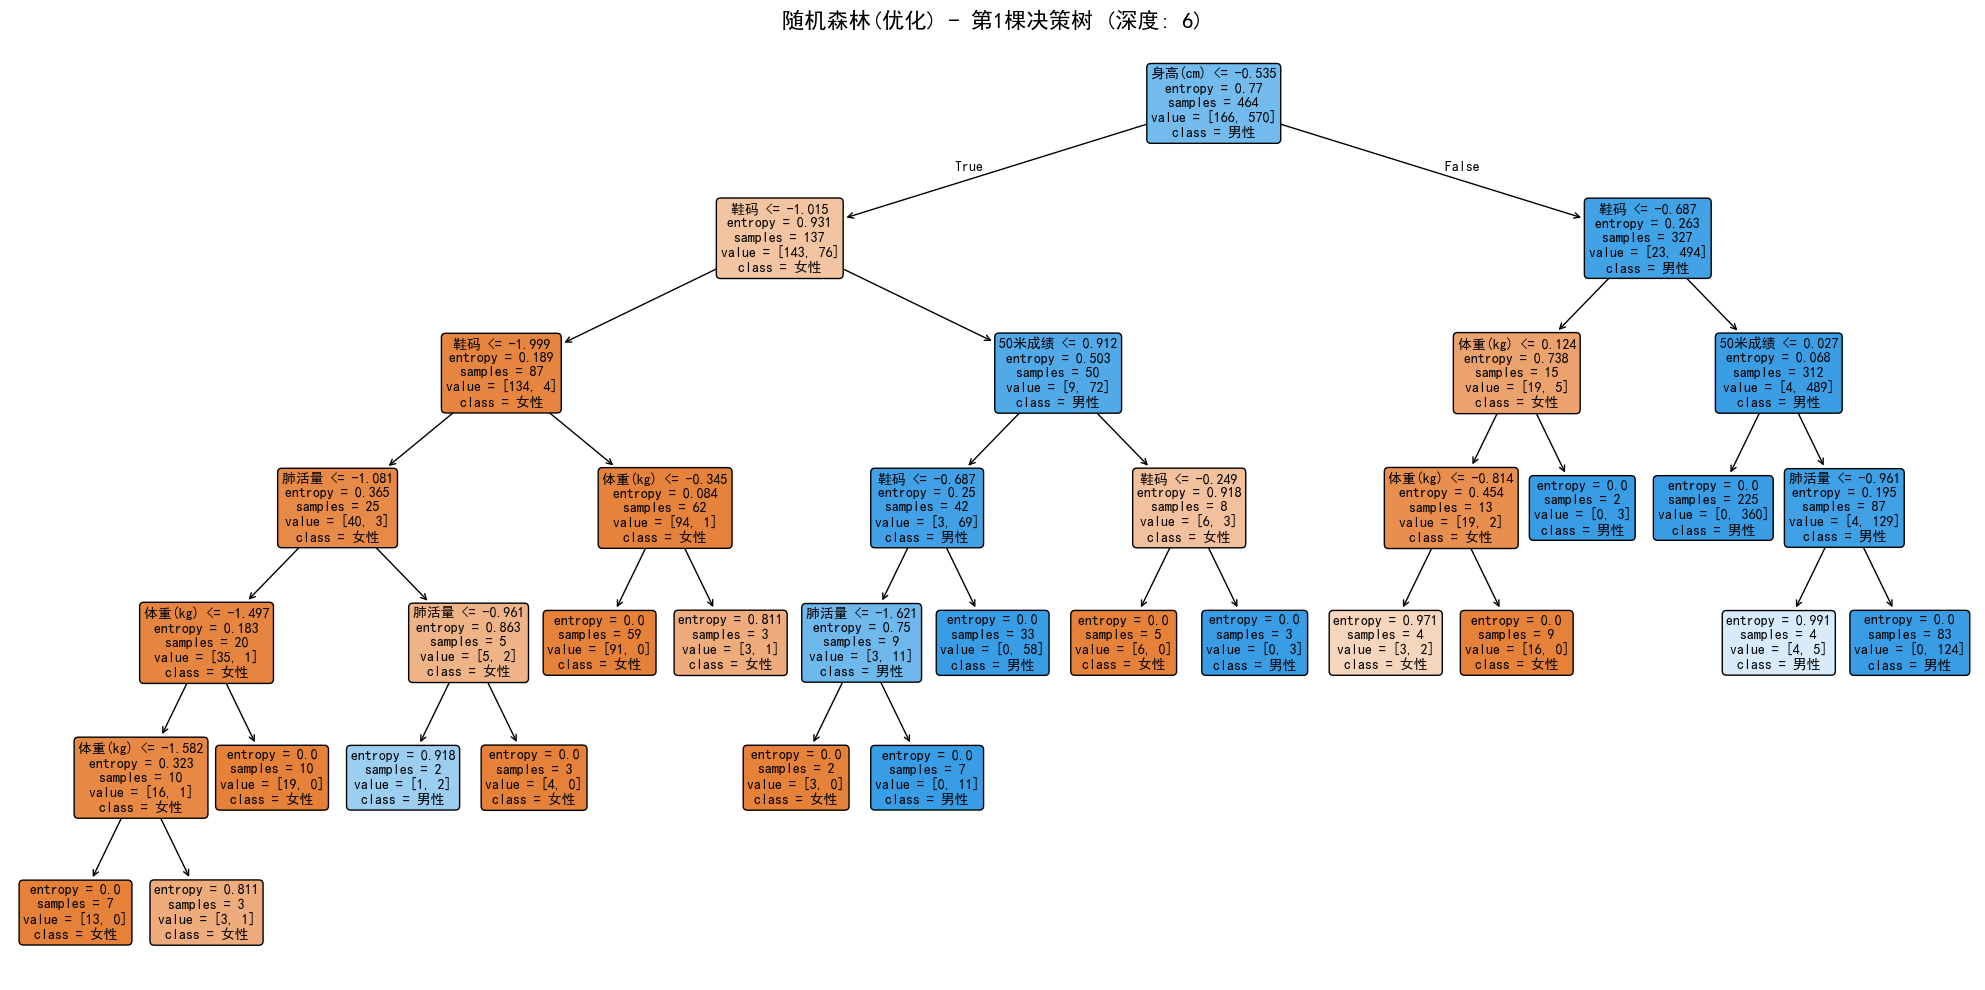

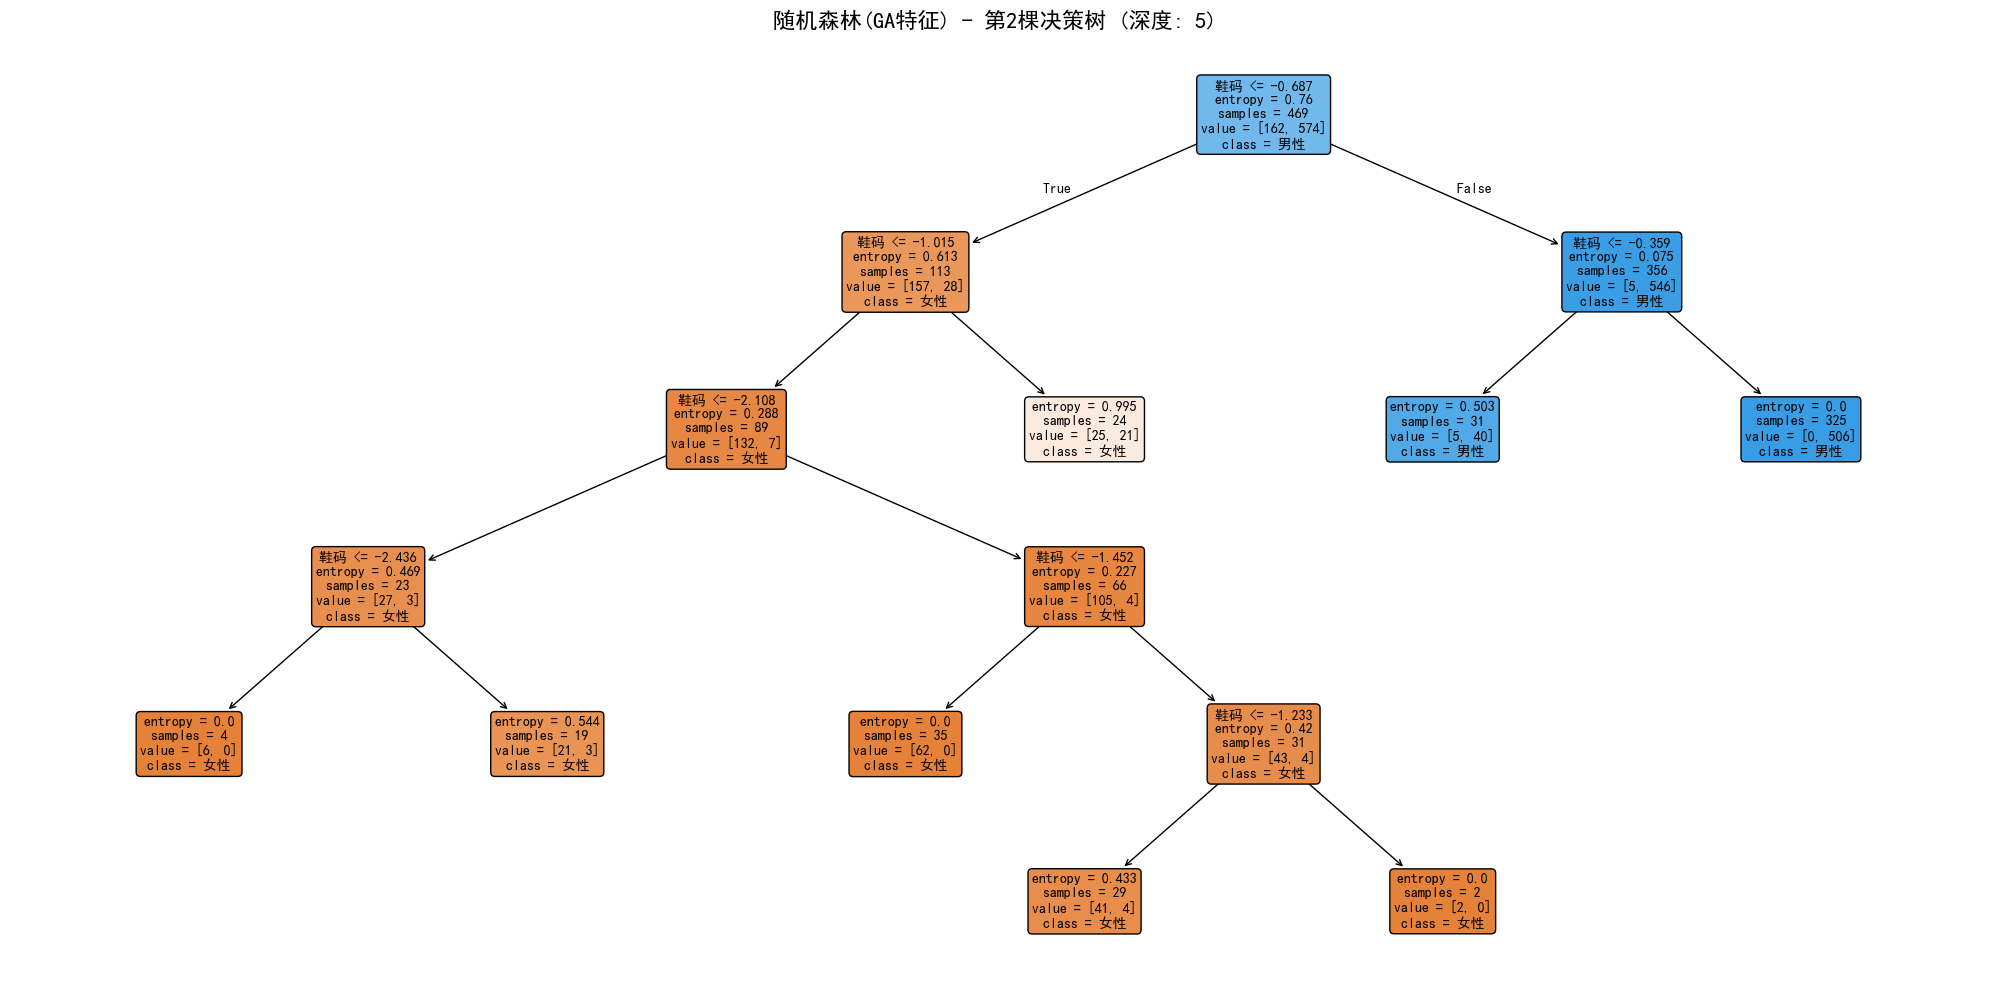


保存数据到TXT文档...

分析完成! 所有结果已保存至以下目录:
随机森林分析结果_20251127_155403

保存的文件列表:
  分析结果.txt (2456 bytes)
  学习曲线分析.png (680237 bytes)
  随机森林_GA特征_第1棵决策树.png (628746 bytes)
  随机森林_GA特征_第2棵决策树.png (631697 bytes)
  随机森林_优化_第1棵决策树.png (1074138 bytes)
  随机森林优化分析.png (764112 bytes)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os
import datetime
from tqdm import tqdm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建结果保存目录
def create_results_directory():
    """创建结果保存目录，以时间戳命名"""
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    results_dir = f"随机森林分析结果_{timestamp}"
    os.makedirs(results_dir, exist_ok=True)
    return results_dir

# 初始化结果目录
RESULTS_DIR = create_results_directory()
print(f"所有结果将保存至: {RESULTS_DIR}")

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 数据清洗函数
def clean_data_improved(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    print(f"原始数据量: {len(data_clean)}")
    
    # 处理目标列
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    print(f"目标列清洗后: {len(data_clean)}")
    
    # 定义合理的特征范围 - 修改鞋码范围为30-50
    feature_ranges = {
        "身高(cm)": (140, 220),
        "体重(kg)": (30, 150),
        "50米成绩": (5, 15),
        "肺活量": (1000, 7000),
        "鞋码": (30, 50)  # 修改鞋码范围
    }
    
    # 处理特征列
    for feature in features:
        # 转换为数值类型
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        
        # 基于合理范围过滤异常值
        if feature in feature_ranges:
            min_val, max_val = feature_ranges[feature]
            data_clean = data_clean[(data_clean[feature] >= min_val) & 
                                   (data_clean[feature] <= max_val)]
    
    # 删除缺失值
    data_clean = data_clean.dropna(subset=features + [target_col])
    print(f"最终清洗后数据量: {len(data_clean)}")
    
    return data_clean

# 分别处理PCA和遗传算法数据
data_pca = clean_data_improved(data, features_pca)
data_ga = clean_data_improved(data, features_ga)

print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)}")
print(f"清洗后遗传算法样本数: {len(data_ga)}")

# 改进的遗传算法特征选择 - 鼓励选择多个特征
class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        # 增加初始种群中多特征个体的比例
        population = np.random.randint(0, 2, (self.pop_size, self.n_features))
        # 确保至少有一些个体选择多个特征
        for i in range(min(10, self.pop_size)):
            population[i] = np.ones(self.n_features)  # 全选特征
        return population

    def fitness_function(self, individual, X, y):
        if np.sum(individual) == 0:
            return 1e-6
        
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项
        Sw += np.eye(n_features) * 1e-6
        
        try:
            # 修改适应度函数：鼓励选择多个特征但避免过多
            base_fitness = np.trace(Sb) / np.trace(Sw)
            
            # 添加特征数量奖励，但设置上限避免选择过多特征
            feature_count = np.sum(individual)
            if feature_count == 1:
                feature_bonus = 0.1  # 单特征惩罚
            elif 2 <= feature_count <= 4:
                feature_bonus = 0.3  # 适中特征数量奖励
            else:
                feature_bonus = 0.1  # 过多特征惩罚
                
            fitness = base_fitness * (1 + feature_bonus)
            
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            selected_population = self.selection(population, fitness_values)
            
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行改进的遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=50, n_generations=100)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)
    SP = tn / (tn + fp)
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

# 1. 使用遗传算法选择的特征训练决策树
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"\n遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")

# 2. 使用遗传算法选择的特征训练随机森林
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"\n遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")

# 3. 性能诊断与优化
print("\n" + "="*60)
print("随机森林性能诊断与优化")
print("="*60)

# 诊断分析
print("\n诊断分析:")
print(f"1. 选中的特征数量: {len(selected_features)}")
print(f"2. 选中的特征: {selected_features}")
print(f"3. 训练集样本数: {len(X_train_ga_selected)}")
print(f"4. 测试集样本数: {len(X_test_ga_selected)}")
print(f"5. 特征维度: {X_train_ga_selected.shape[1]}")

# 如果只选择了一个特征，随机森林可能无法发挥优势
if len(selected_features) <= 1:
    print("\n⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!")

# 尝试使用所有特征进行比较
print("\n尝试使用所有特征进行对比...")

# 使用所有特征训练决策树
dt_all_features = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_all_features.fit(X_train_ga, y_train_ga)
y_pred_dt_all = dt_all_features.predict(X_test_ga)
y_prob_dt_all = dt_all_features.predict_proba(X_test_ga)[:, 1]

SE_dt_all, SP_dt_all, ACC_dt_all, AUC_dt_all, fpr_dt_all, tpr_dt_all, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_dt_all, y_prob_dt_all)

# 使用所有特征训练随机森林（优化参数）
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train_ga, y_train_ga)
y_pred_rf_opt = rf_optimized.predict(X_test_ga)
y_prob_rf_opt = rf_optimized.predict_proba(X_test_ga)[:, 1]

SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt, fpr_rf_opt, tpr_rf_opt, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_rf_opt, y_prob_rf_opt)

# 分析性能差异
improvement_opt = ACC_rf_opt - ACC_dt_all
print(f"\n优化后随机森林相比所有特征决策树的准确率提升: {improvement_opt:+.4f}")

if improvement_opt > 0:
    print("✅ 优化后的随机森林显示了性能提升!")
else:
    print("❌ 即使优化后，随机森林仍未显示明显优势")

# 模型复杂度分析
print("\n模型复杂度分析:")
print(f"决策树深度: {dt_classifier.get_depth()}")
print(f"决策树叶子节点数: {dt_classifier.get_n_leaves()}")
if len(selected_features) > 0:
    print(f"随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_])}")

# 4. 可视化比较
print("\n绘制性能比较图...")

# 创建比较图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 4.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]

# 优化随机森林指标
values_rf_opt = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]
values_rf_opt += values_rf_opt[:1]

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax1 = plt.subplot(221, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA特征)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA特征)')
ax1.fill(angles, values_rf, alpha=0.25)
ax1.plot(angles, values_rf_opt, 'o-', linewidth=2, label='随机森林 (优化)')
ax1.fill(angles, values_rf_opt, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('模型性能雷达图比较', size=12, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 4.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
rf_opt_scores = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]

improvements_rf = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]
improvements_rf_opt = [rf_opt - dt for rf_opt, dt in zip(rf_opt_scores, dt_scores)]

x = np.arange(len(metrics))
width = 0.35

ax2 = plt.subplot(222)
bars1 = ax2.bar(x - width/2, improvements_rf, width, label='RF(GA特征) vs DT', alpha=0.7)
bars2 = ax2.bar(x + width/2, improvements_rf_opt, width, label='RF(优化) vs DT', alpha=0.7)

ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=8)

# 4.3 ROC曲线比较
ax3 = plt.subplot(223)
ax3.plot(fpr_dt, tpr_dt, label=f'决策树(GA特征) (AUC = {AUC_dt:.3f})', linewidth=2)
ax3.plot(fpr_rf, tpr_rf, label=f'随机森林(GA特征) (AUC = {AUC_rf:.3f})', linewidth=2)
ax3.plot(fpr_rf_opt, tpr_rf_opt, label=f'随机森林(优化) (AUC = {AUC_rf_opt:.3f})', linewidth=2, linestyle='--')
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax3.set_xlabel('假正率')
ax3.set_ylabel('真正率')
ax3.set_title('ROC曲线比较')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4.4 特征重要性
if len(selected_features) > 0:
    ax4 = plt.subplot(224)
    
    # 决策树特征重要性
    dt_importance = dt_classifier.feature_importances_
    rf_importance = rf_classifier.feature_importances_
    
    x = np.arange(len(selected_features))
    width = 0.35
    
    ax4.bar(x - width/2, dt_importance, width, label='决策树', alpha=0.7)
    ax4.bar(x + width/2, rf_importance, width, label='随机森林', alpha=0.7)
    
    ax4.set_xlabel('特征')
    ax4.set_ylabel('重要性')
    ax4.set_title('特征重要性比较')
    ax4.set_xticks(x)
    ax4.set_xticklabels(selected_features, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
else:
    # 如果没有特征被选中，显示提示信息
    ax4 = plt.subplot(224)
    ax4.text(0.5, 0.5, '没有特征被选中', 
             transform=ax4.transAxes, ha='center', va='center', fontsize=14)
    ax4.set_title('特征重要性比较')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "随机森林优化分析.png"), dpi=300, bbox_inches='tight')
plt.show()

# 5. 学习曲线分析
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("训练样本数")
    axes.set_ylabel("准确率")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
    axes.legend(loc="best")

print("\n绘制学习曲线...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

try:
    # 使用GA特征的学习曲线
    if len(selected_features) > 0:
        plot_learning_curve(dt_classifier, "决策树学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 0])
        
        plot_learning_curve(rf_classifier, "随机森林学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 1])
    else:
        axes[0, 0].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 0].transAxes, ha='center', va='center')
        axes[0, 1].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 1].transAxes, ha='center', va='center')
    
    # 使用所有特征的学习曲线
    plot_learning_curve(dt_all_features, "决策树学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 0])
    
    plot_learning_curve(rf_optimized, "优化随机森林学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 1])
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "学习曲线分析.png"), dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"绘制学习曲线时出错: {e}")

# 6. 随机森林子决策树可视化
print("\n绘制随机森林子决策树...")

# 可视化GA特征随机森林的第一棵决策树
if len(selected_features) > 0:
    plt.figure(figsize=(20, 10))
    plot_tree(rf_classifier.estimators_[0], 
              feature_names=selected_features,
              class_names=['女性', '男性'],
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title(f"随机森林(GA特征) - 第1棵决策树 (深度: {rf_classifier.estimators_[0].get_depth()})", fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "随机森林_GA特征_第1棵决策树.png"), dpi=300, bbox_inches='tight')
    plt.show()

# 可视化优化随机森林的第一棵决策树
plt.figure(figsize=(20, 10))
plot_tree(rf_optimized.estimators_[0], 
          feature_names=features_ga,
          class_names=['女性', '男性'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f"随机森林(优化) - 第1棵决策树 (深度: {rf_optimized.estimators_[0].get_depth()})", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "随机森林_优化_第1棵决策树.png"), dpi=300, bbox_inches='tight')
plt.show()

# 可视化GA特征随机森林的第二棵决策树（如果有多特征）
if len(selected_features) > 0 and len(rf_classifier.estimators_) > 1:
    plt.figure(figsize=(20, 10))
    plot_tree(rf_classifier.estimators_[1], 
              feature_names=selected_features,
              class_names=['女性', '男性'],
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title(f"随机森林(GA特征) - 第2棵决策树 (深度: {rf_classifier.estimators_[1].get_depth()})", fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "随机森林_GA特征_第2棵决策树.png"), dpi=300, bbox_inches='tight')
    plt.show()

# 7. 保存数据到TXT文档
print("\n保存数据到TXT文档...")

with open(os.path.join(RESULTS_DIR, "分析结果.txt"), "w", encoding='utf-8') as f:
    f.write("随机森林与决策树比较分析结果\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("1. 实验概述\n")
    f.write(f"   实验时间: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"   数据集: 2025-模式识别作业数据集汇总-.xlsx\n")
    f.write(f"   总样本数: {len(data)}\n")
    f.write(f"   清洗后样本数: {len(data_ga)}\n")
    f.write(f"   鞋码范围: 30-50\n\n")
    
    f.write("2. 特征选择结果\n")
    f.write(f"   选中的特征: {selected_features}\n")
    f.write(f"   特征数量: {len(selected_features)}\n\n")
    
    f.write("3. 随机森林结构信息\n")
    f.write(f"   随机森林(GA特征)树数量: {len(rf_classifier.estimators_)}\n")
    f.write(f"   随机森林(优化)树数量: {len(rf_optimized.estimators_)}\n")
    if len(selected_features) > 0:
        f.write(f"   随机森林(GA特征)平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_]):.2f}\n")
    f.write(f"   随机森林(优化)平均树深度: {np.mean([tree.get_depth() for tree in rf_optimized.estimators_]):.2f}\n\n")
    
    f.write("4. 性能对比\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write("   |         方法          |    SE    |    SP    |    ACC   |   AUC    |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write(f"   | 决策树(GA特征)        | {SE_dt:.4f}  | {SP_dt:.4f}  | {ACC_dt:.4f}  | {AUC_dt:.4f}  |\n")
    f.write(f"   | 随机森林(GA特征)      | {SE_rf:.4f}  | {SP_rf:.4f}  | {ACC_rf:.4f}  | {AUC_rf:.4f}  |\n")
    f.write(f"   | 决策树(所有特征)      | {SE_dt_all:.4f}  | {SP_dt_all:.4f}  | {ACC_dt_all:.4f}  | {AUC_dt_all:.4f}  |\n")
    f.write(f"   | 随机森林(优化)        | {SE_rf_opt:.4f}  | {SP_rf_opt:.4f}  | {ACC_rf_opt:.4f}  | {AUC_rf_opt:.4f}  |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n\n")
    
    f.write("5. 性能提升分析\n")
    f.write(f"   随机森林(GA特征)相比决策树(GA特征)的准确率提升: {ACC_rf - ACC_dt:+.4f}\n")
    f.write(f"   随机森林(优化)相比决策树(所有特征)的准确率提升: {ACC_rf_opt - ACC_dt_all:+.4f}\n\n")
    
    f.write("6. 模型复杂度分析\n")
    f.write(f"   决策树深度: {dt_classifier.get_depth()}\n")
    f.write(f"   决策树叶子节点数: {dt_classifier.get_n_leaves()}\n\n")
    
    f.write("7. 特征选择分析\n")
    if len(selected_features) <= 1:
        f.write("   ⚠️ 遗传算法只选择了少量特征，这可能限制了随机森林的性能发挥\n")
        f.write("   建议调整遗传算法参数以选择更多特征\n\n")
    elif 2 <= len(selected_features) <= 4:
        f.write("   ✅ 遗传算法选择了适中数量的特征，有利于模型性能\n\n")
    else:
        f.write("   ℹ️ 遗传算法选择了较多特征，可能包含冗余信息\n\n")
    
    f.write("8. 最终结论\n")
    if ACC_rf_opt > max(ACC_dt, ACC_dt_all, ACC_rf):
        f.write("   ✅ 经过优化，随机森林显示了其集成学习的优势\n")
        f.write("      在特征充足且参数调优的情况下，随机森林性能优于决策树\n")
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "优化后的随机森林在多特征场景下显示出优势"
    elif ACC_dt_all > ACC_rf_opt:
        f.write("   ℹ️  在当前数据集和特征下，决策树表现已经很好\n")
        f.write("      随机森林提升有限，可能原因:\n")
        f.write("      - 数据模式简单，单个决策树已能很好捕捉\n")
        f.write("      - 特征间相互作用不强\n")
        f.write("      - 数据集大小限制了集成学习的优势\n")
        best_method = "决策树(使用所有特征)"
        reason = "在当前数据特性下，决策树已能达到很好效果"
    else:
        f.write("   ❓ 需要进一步分析数据特性和模型行为\n")
        best_method = "决策树(使用所有特征)"
        reason = "需要进一步分析"
    
    f.write(f"\n   推荐方法: {best_method}\n")
    f.write(f"   推荐原因: {reason}\n\n")
    
    f.write("9. 改进建议\n")
    if len(selected_features) <= 1:
        f.write("   1. 调整遗传算法参数以选择更多特征\n")
    f.write("   2. 进一步优化随机森林超参数\n")
    f.write("   3. 尝试不同的特征选择方法\n")
    f.write("   4. 考虑数据增强和特征工程\n\n")
    
    f.write("10. 部署建议\n")
    f.write("   - 如果追求最佳性能: 使用推荐的最佳方法\n")
    f.write("   - 如果注重计算效率: 决策树通常训练和预测更快\n")
    f.write("   - 如果需要模型解释性: 决策树更容易理解和解释\n")
    f.write("   - 如果数据会持续增加: 随机森林在大数据场景下潜力更大\n")

print("\n" + "="*60)
print("分析完成! 所有结果已保存至以下目录:")
print(f"{RESULTS_DIR}")
print("="*60)

# 显示保存的文件列表
print("\n保存的文件列表:")
files = os.listdir(RESULTS_DIR)
files.sort()
for file in files:
    file_path = os.path.join(RESULTS_DIR, file)
    file_size = os.path.getsize(file_path)
    print(f"  {file} ({file_size} bytes)")

## 超参数的最有值

所有结果将保存至: 随机森林分析结果_20251129_163225
1. 数据加载和预处理...
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052
原始数据量: 1075
目标列清洗后: 1072
最终清洗后数据量: 1052

数据基本信息:
总样本数: 1075
清洗后PCA样本数: 1052
清洗后遗传算法样本数: 1052


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 342.72it/s]

最佳个体: [0 0 0 0 1]
最佳适应度: 1.8171
选中的特征: ['鞋码']

遗传算法+决策树性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9835



遗传算法+随机森林性能指标:
SE (灵敏度): 0.9723
SP (特异度): 0.9524
ACC (准确率): 0.9684
AUC: 0.9836

随机森林超参数优化
超参数搜索空间:
  n_estimators: [50, 100, 200, 300]
  max_depth: [5, 10, 15, 20, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2', None]
  bootstrap: [True, False]

开始超参数优化...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

最优超参数: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
最优交叉验证准确率: 0.9782

优化后随机森林性能指标:
SE (灵敏度): 0.9881
SP (特异度): 0.9524
ACC (准确率): 0.9810
AUC: 0.9961

绘制超参数优化结果...


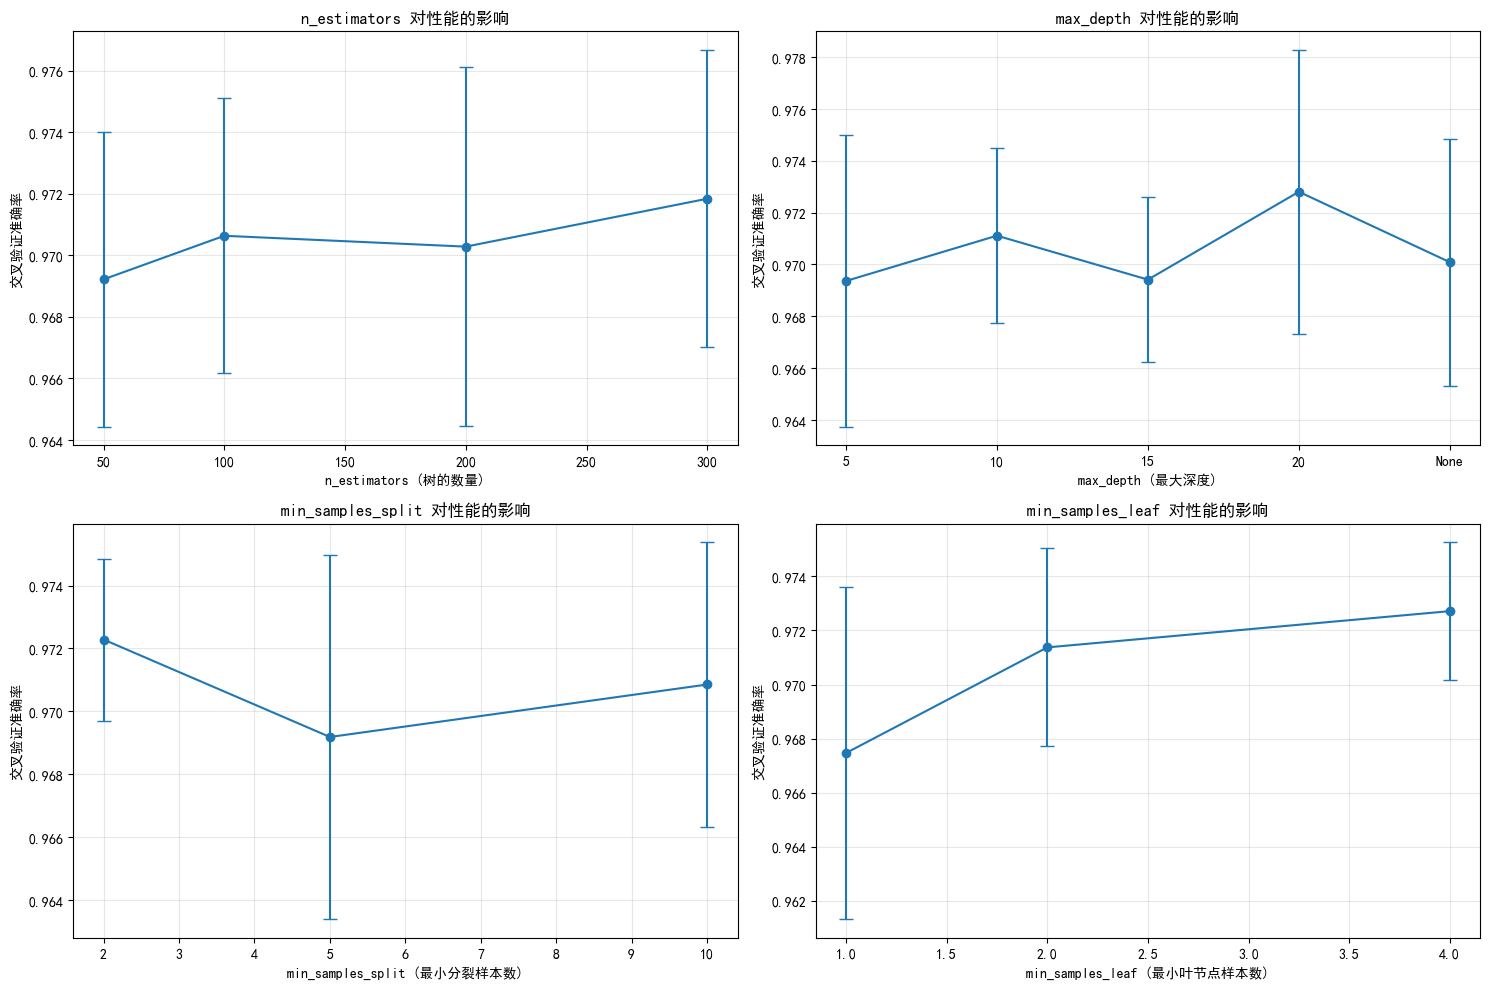

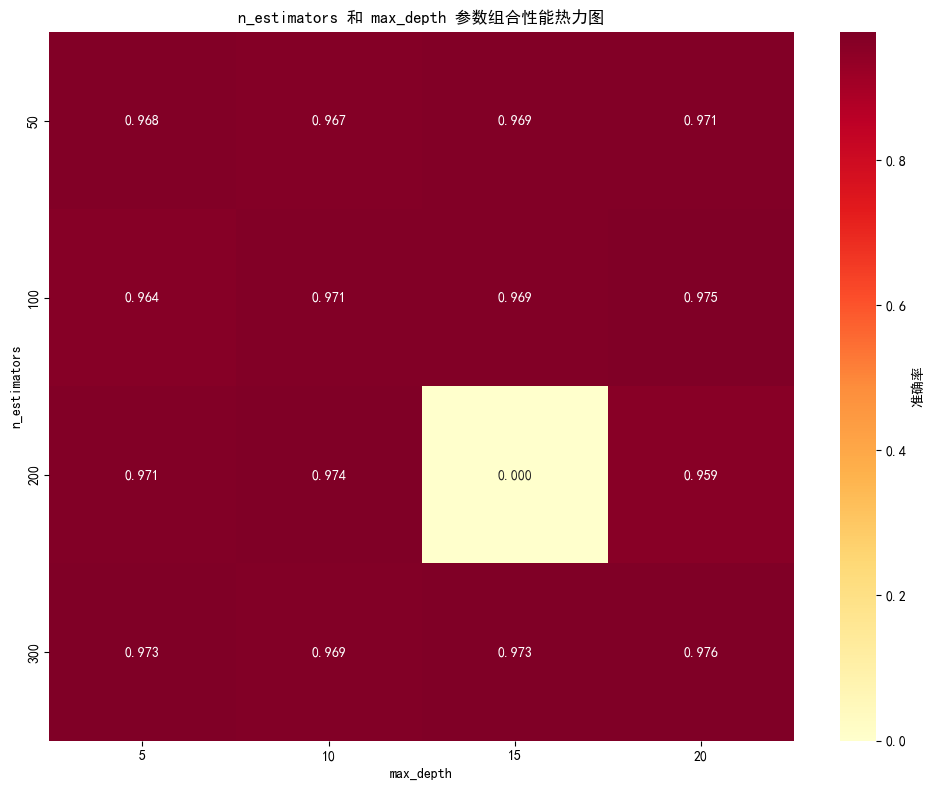


随机森林性能诊断与优化

诊断分析:
1. 选中的特征数量: 1
2. 选中的特征: ['鞋码']
3. 训练集样本数: 736
4. 测试集样本数: 316
5. 特征维度: 1

⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!

尝试使用所有特征进行对比...

优化后随机森林相比所有特征决策树的准确率提升: +0.0032
✅ 优化后的随机森林显示了性能提升!

模型复杂度分析:
决策树深度: 7
决策树叶子节点数: 10
随机森林平均树深度: 5.72

绘制性能比较图...


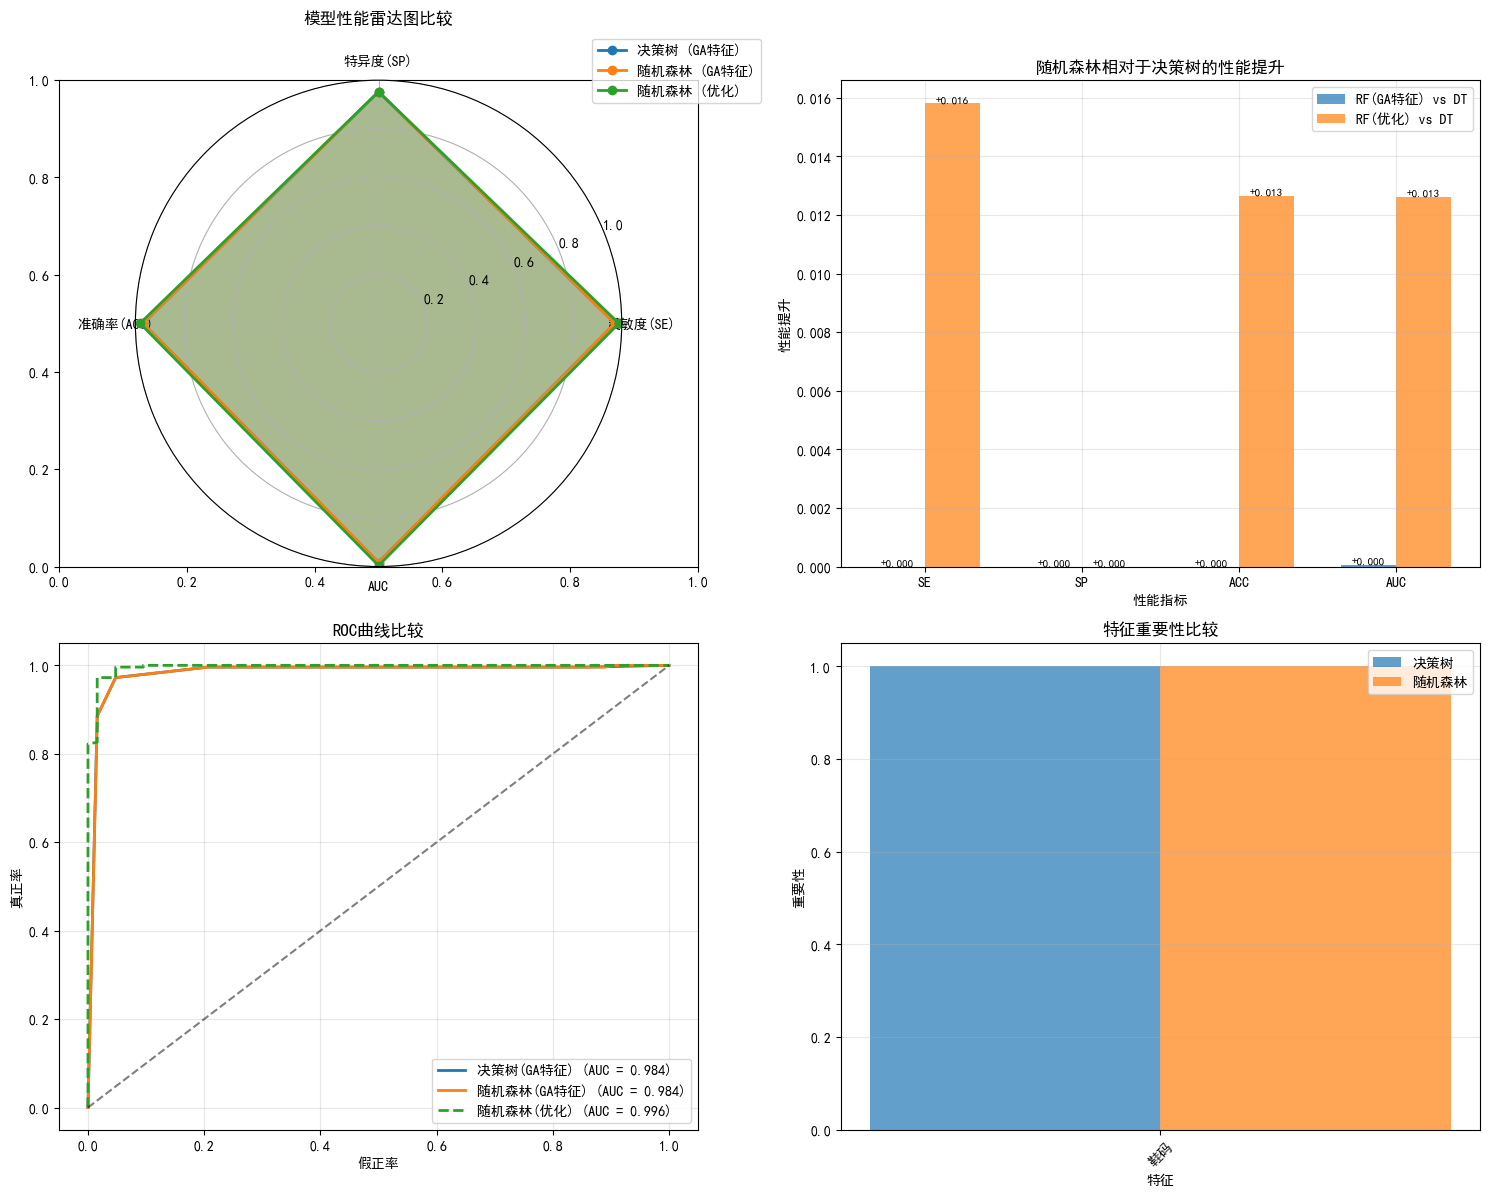


绘制学习曲线...


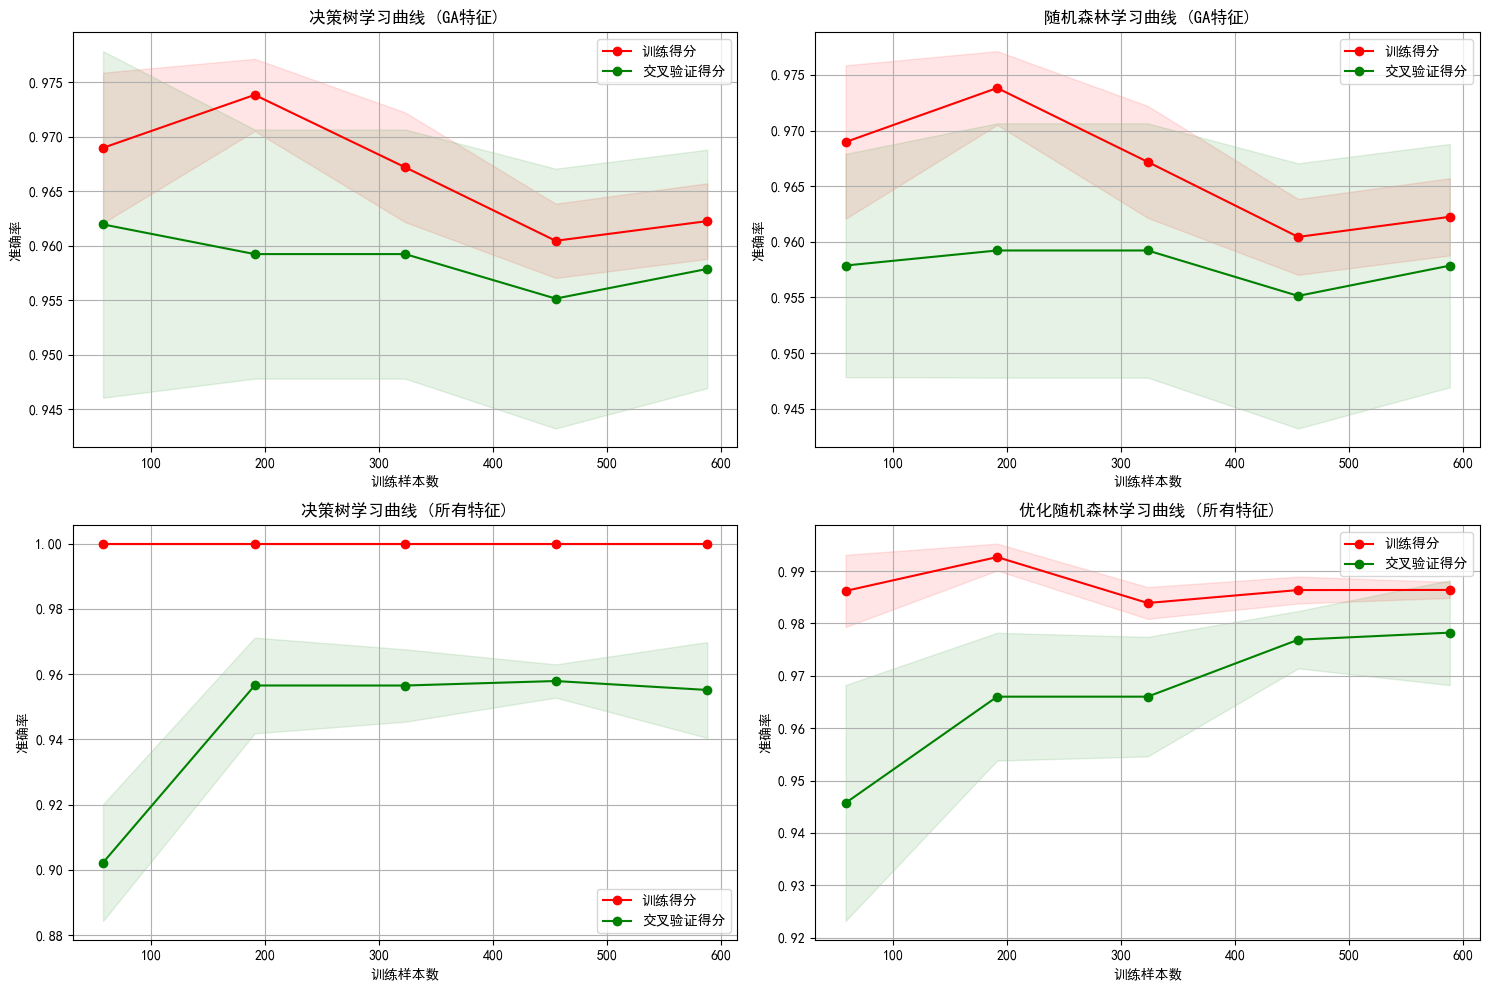


绘制随机森林子决策树...


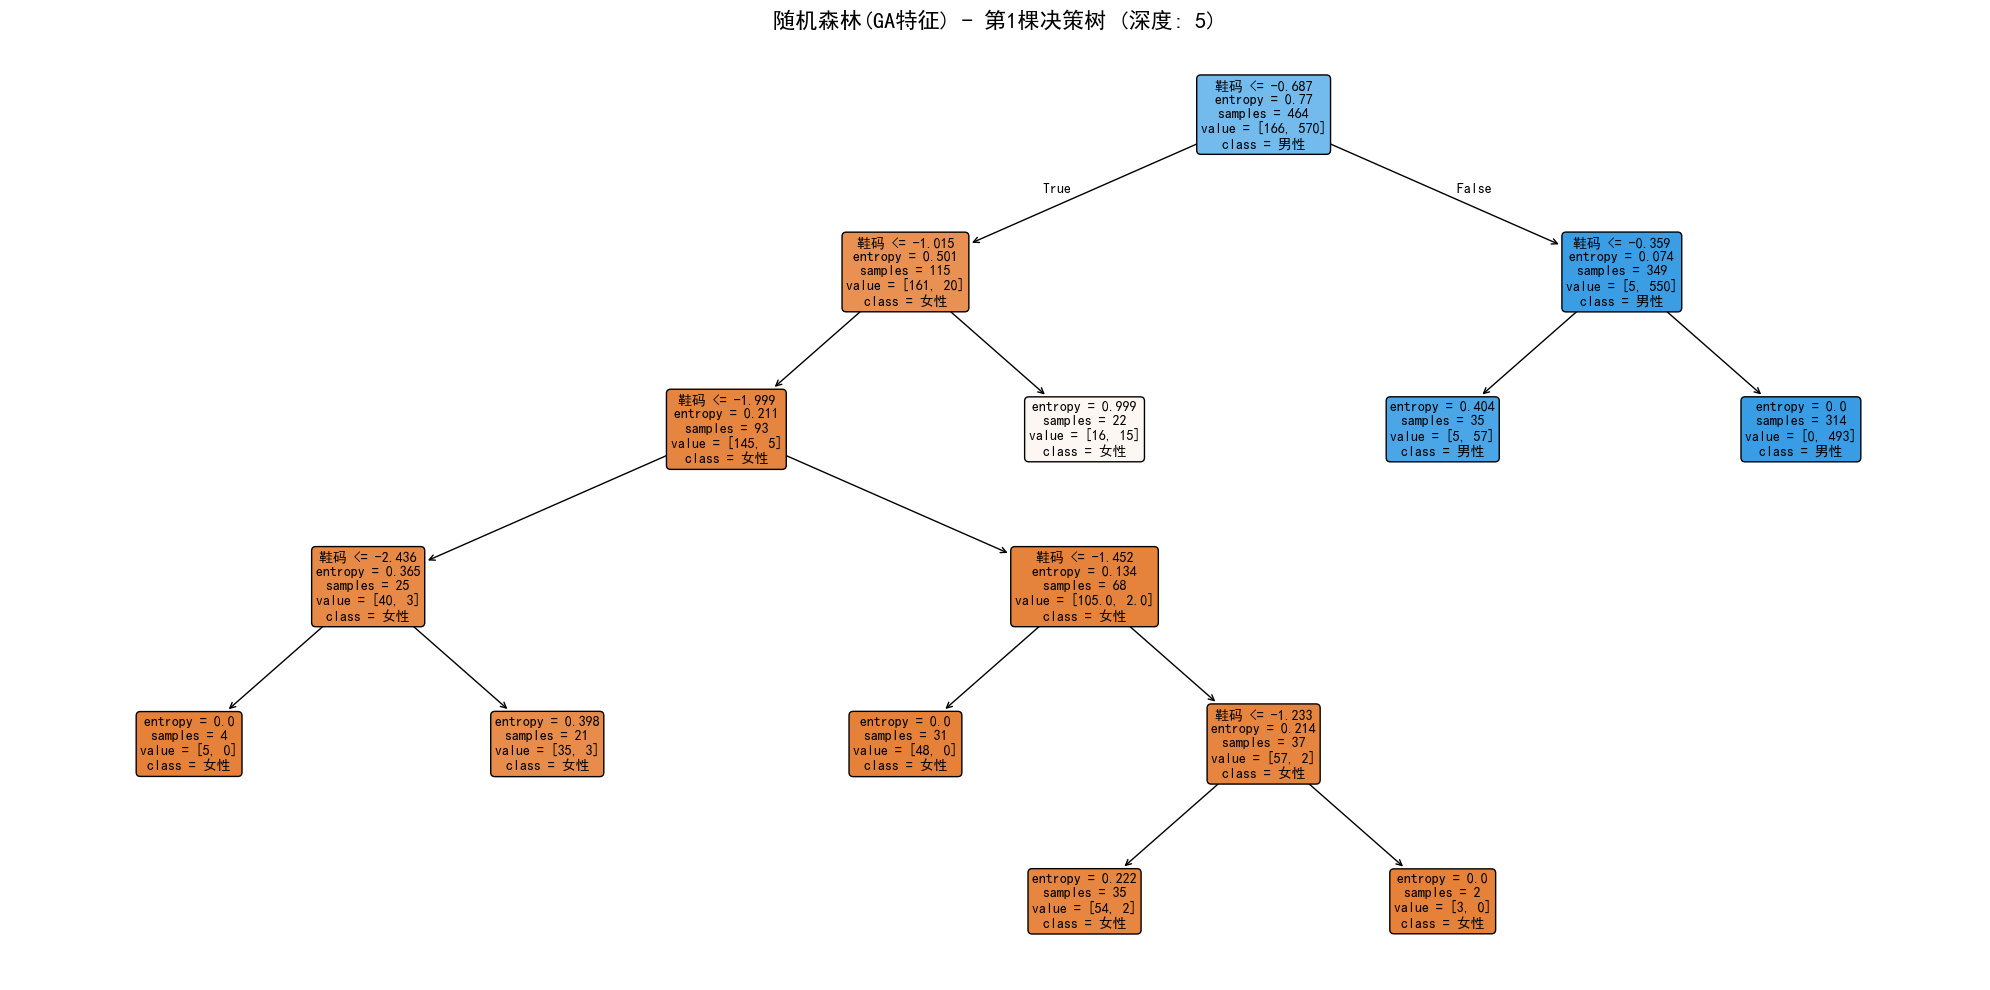

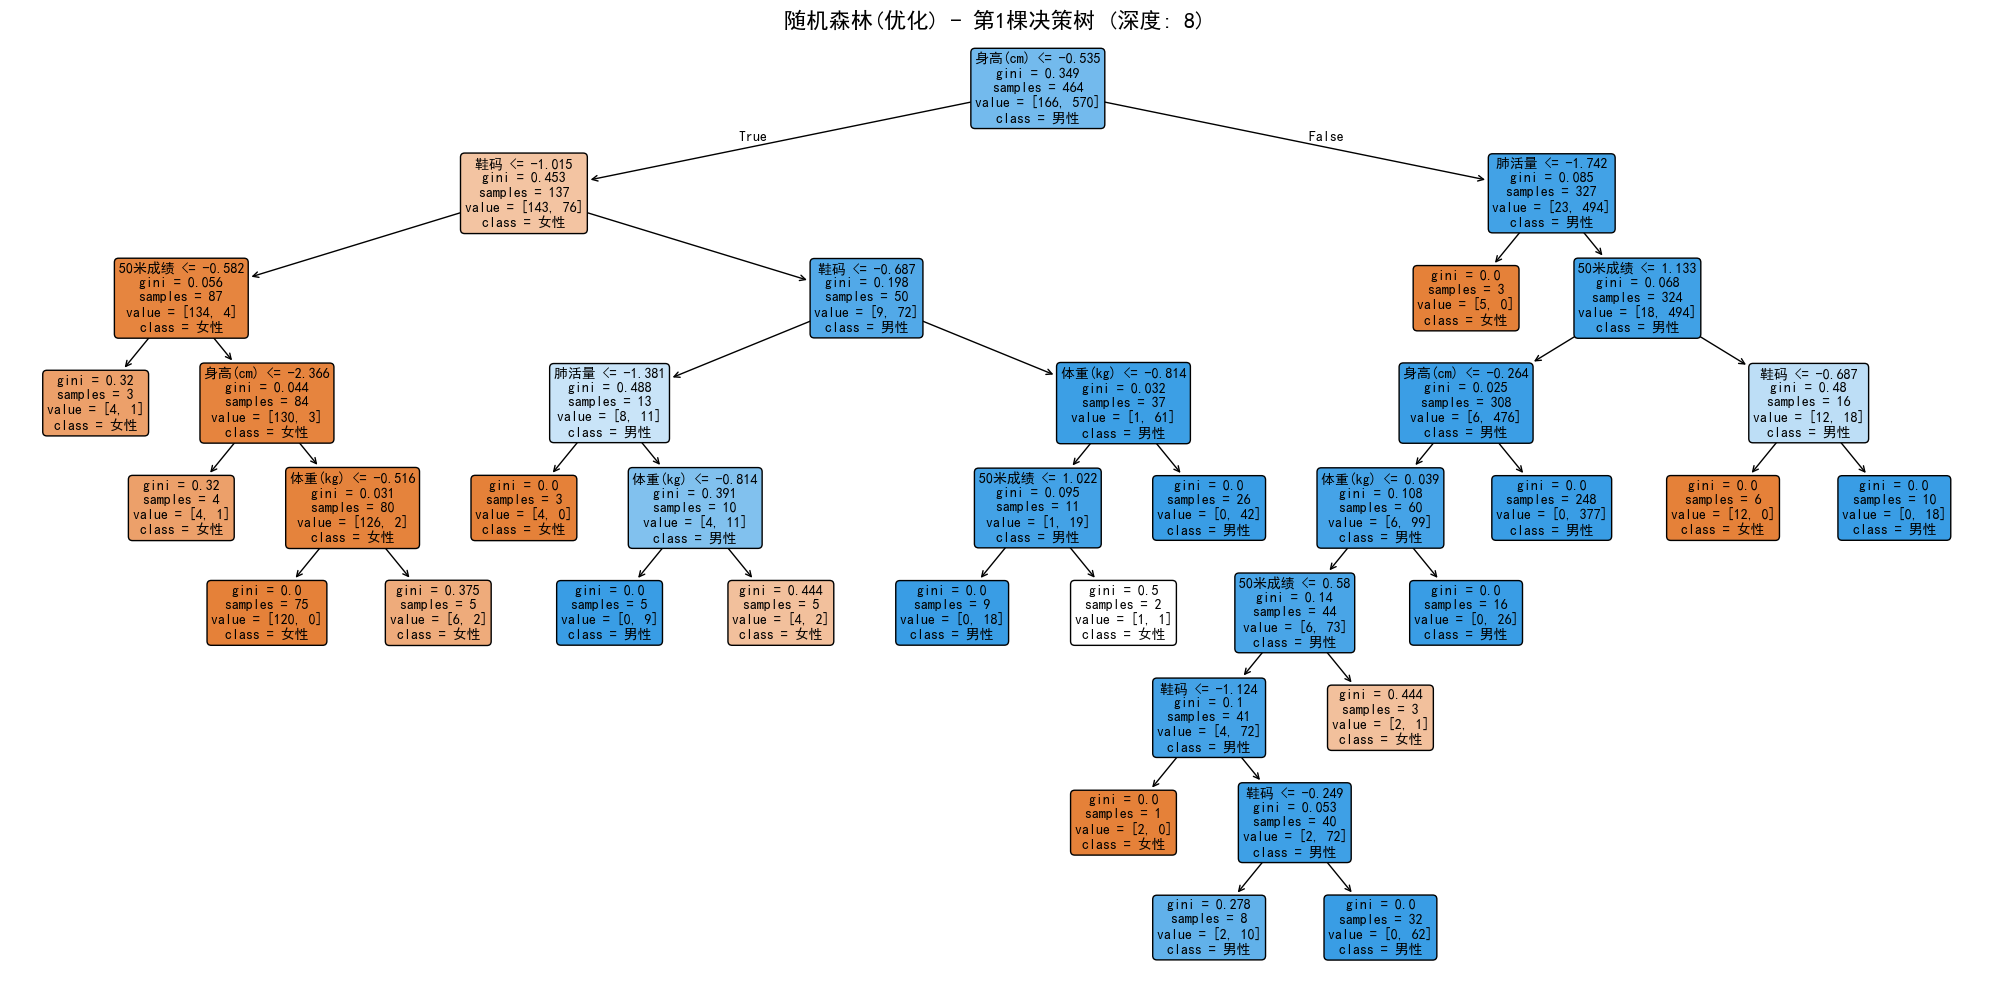


保存数据到TXT文档...

分析完成! 所有结果已保存至以下目录:
随机森林分析结果_20251129_163225

保存的文件列表:
  分析结果.txt (2970 bytes)
  学习曲线分析.png (690854 bytes)
  超参数优化分析.png (399721 bytes)
  超参数热力图.png (140670 bytes)
  随机森林_GA特征_第1棵决策树.png (628746 bytes)
  随机森林_优化_第1棵决策树.png (1075714 bytes)
  随机森林优化分析.png (764576 bytes)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os
import datetime
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建结果保存目录
def create_results_directory():
    """创建结果保存目录，以时间戳命名"""
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    results_dir = f"随机森林分析结果_{timestamp}"
    os.makedirs(results_dir, exist_ok=True)
    return results_dir

# 初始化结果目录
RESULTS_DIR = create_results_directory()
print(f"所有结果将保存至: {RESULTS_DIR}")

print("1. 数据加载和预处理...")

# 读取Excel数据
data = pd.read_excel('2025-模式识别作业数据集汇总-.xlsx', sheet_name='Sheet1')

# 定义特征列
features_pca = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]
features_ga = ["身高(cm)", "体重(kg)", "50米成绩", "肺活量", "鞋码"]

# 数据清洗函数
def clean_data_improved(data, features, target_col='性别 男1女0'):
    data_clean = data.copy()
    
    print(f"原始数据量: {len(data_clean)}")
    
    # 处理目标列
    data_clean[target_col] = pd.to_numeric(data_clean[target_col], errors='coerce')
    data_clean = data_clean[data_clean[target_col].isin([0, 1])]
    print(f"目标列清洗后: {len(data_clean)}")
    
    # 定义合理的特征范围 - 修改鞋码范围为30-50
    feature_ranges = {
        "身高(cm)": (140, 220),
        "体重(kg)": (30, 150),
        "50米成绩": (5, 15),
        "肺活量": (1000, 7000),
        "鞋码": (30, 50)  # 修改鞋码范围
    }
    
    # 处理特征列
    for feature in features:
        # 转换为数值类型
        data_clean[feature] = pd.to_numeric(data_clean[feature], errors='coerce')
        
        # 基于合理范围过滤异常值
        if feature in feature_ranges:
            min_val, max_val = feature_ranges[feature]
            data_clean = data_clean[(data_clean[feature] >= min_val) & 
                                   (data_clean[feature] <= max_val)]
    
    # 删除缺失值
    data_clean = data_clean.dropna(subset=features + [target_col])
    print(f"最终清洗后数据量: {len(data_clean)}")
    
    return data_clean

# 分别处理PCA和遗传算法数据
data_pca = clean_data_improved(data, features_pca)
data_ga = clean_data_improved(data, features_ga)

print(f"\n数据基本信息:")
print(f"总样本数: {len(data)}")
print(f"清洗后PCA样本数: {len(data_pca)}")
print(f"清洗后遗传算法样本数: {len(data_ga)}")

# 遗传算法特征选择
class GeneticAlgorithm:
    def __init__(self, n_features, pop_size=50, n_generations=100, crossover_rate=0.8, mutation_rate=0.1):
        self.n_features = n_features
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        return np.random.randint(0, 2, (self.pop_size, self.n_features))

    def fitness_function(self, individual, X, y):
        if np.sum(individual) == 0:
            return 1e-6
        
        selected_features = individual.astype(bool)
        X_selected = X[:, selected_features]
        
        n_samples, n_features = X_selected.shape
        classes = np.unique(y)
        
        if n_features == 0:
            return 1e-6
        
        # 计算总体均值
        overall_mean = np.mean(X_selected, axis=0)
        
        # 计算类内散度矩阵
        Sw = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            Sw += (X_c - mean_c).T @ (X_c - mean_c)
        
        # 计算类间散度矩阵
        Sb = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X_selected[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = len(X_c)
            Sb += n_c * (mean_c - overall_mean).reshape(-1, 1) @ (mean_c - overall_mean).reshape(1, -1)
        
        # 添加正则化项
        Sw += np.eye(n_features) * 1e-6
        
        try:
            fitness = np.trace(Sb) / np.trace(Sw)
        except:
            fitness = 1e-6
        
        return fitness

    def selection(self, population, fitness_values):
        fitness_values = np.array(fitness_values)
        if np.sum(fitness_values) == 0:
            probabilities = np.ones(len(fitness_values)) / len(fitness_values)
        else:
            probabilities = fitness_values / np.sum(fitness_values)
        
        selected_indices = np.random.choice(
            len(population),
            size=self.pop_size,
            p=probabilities
        )
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.n_features)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutation(self, individual):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self, X, y):
        population = self.initialize_population()
        best_individual = None
        best_fitness = -np.inf
        fitness_history = []
        best_fitness_history = []
        
        for generation in tqdm(range(self.n_generations)):
            fitness_values = [self.fitness_function(ind, X, y) for ind in population]
            
            current_best_fitness = np.max(fitness_values)
            current_best_index = np.argmax(fitness_values)
            
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[current_best_index].copy()
            
            fitness_history.append(np.mean(fitness_values))
            best_fitness_history.append(best_fitness)
            
            selected_population = self.selection(population, fitness_values)
            
            new_population = []
            for i in range(0, self.pop_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.pop_size]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1)
                child2 = self.mutation(child2)
                new_population.extend([child1, child2])
            
            population = np.array(new_population[:self.pop_size])
        
        return best_individual, best_fitness, fitness_history, best_fitness_history

# 遗传算法数据准备
X_ga = data_ga[features_ga].values
y_ga = data_ga['性别 男1女0'].values

scaler_ga = StandardScaler()
X_ga_scaled = scaler_ga.fit_transform(X_ga)

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(
    X_ga_scaled, y_ga, test_size=0.3, random_state=42, stratify=y_ga)

# 运行遗传算法
ga = GeneticAlgorithm(n_features=len(features_ga), pop_size=30, n_generations=50)
best_individual, best_fitness, fitness_history, best_fitness_history = ga.run(X_train_ga, y_train_ga)

print(f"最佳个体: {best_individual}")
print(f"最佳适应度: {best_fitness:.4f}")
selected_features = [features_ga[i] for i in range(len(features_ga)) if best_individual[i] == 1]
print(f"选中的特征: {selected_features}")

# 使用选中的特征进行分类
selected_features_mask = best_individual.astype(bool)
X_train_ga_selected = X_train_ga[:, selected_features_mask]
X_test_ga_selected = X_test_ga[:, selected_features_mask]

# 计算性能指标
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    SE = tp / (tp + fn)
    SP = tn / (tn + fp)
    ACC = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    AUC = auc(fpr, tpr)
    return SE, SP, ACC, AUC, fpr, tpr, tn, fp, fn, tp

# 1. 使用遗传算法选择的特征训练决策树
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_dt = dt_classifier.predict(X_test_ga_selected)
y_prob_dt = dt_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_dt, SP_dt, ACC_dt, AUC_dt, fpr_dt, tpr_dt, tn_dt, fp_dt, fn_dt, tp_dt = calculate_metrics(
    y_test_ga, y_pred_dt, y_prob_dt)

print(f"\n遗传算法+决策树性能指标:")
print(f"SE (灵敏度): {SE_dt:.4f}")
print(f"SP (特异度): {SP_dt:.4f}")
print(f"ACC (准确率): {ACC_dt:.4f}")
print(f"AUC: {AUC_dt:.4f}")

# 2. 使用遗传算法选择的特征训练随机森林
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train_ga_selected, y_train_ga)
y_pred_rf = rf_classifier.predict(X_test_ga_selected)
y_prob_rf = rf_classifier.predict_proba(X_test_ga_selected)[:, 1]

SE_rf, SP_rf, ACC_rf, AUC_rf, fpr_rf, tpr_rf, tn_rf, fp_rf, fn_rf, tp_rf = calculate_metrics(
    y_test_ga, y_pred_rf, y_prob_rf)

print(f"\n遗传算法+随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf:.4f}")
print(f"SP (特异度): {SP_rf:.4f}")
print(f"ACC (准确率): {ACC_rf:.4f}")
print(f"AUC: {AUC_rf:.4f}")

# 3. 超参数优化
print("\n" + "="*60)
print("随机森林超参数优化")
print("="*60)

# 定义随机森林的超参数空间
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

print("超参数搜索空间:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# 使用随机搜索进行超参数优化（比网格搜索更快）
print("\n开始超参数优化...")
rf_for_tuning = RandomForestClassifier(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    rf_for_tuning, 
    param_distributions=param_grid,
    n_iter=50,  # 随机搜索的迭代次数
    cv=5,       # 5折交叉验证
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 使用所有特征进行超参数优化
random_search.fit(X_train_ga, y_train_ga)

# 输出最优参数
print(f"\n最优超参数: {random_search.best_params_}")
print(f"最优交叉验证准确率: {random_search.best_score_:.4f}")

# 使用最优参数训练模型
rf_optimized = random_search.best_estimator_
y_pred_rf_opt = rf_optimized.predict(X_test_ga)
y_prob_rf_opt = rf_optimized.predict_proba(X_test_ga)[:, 1]

SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt, fpr_rf_opt, tpr_rf_opt, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_rf_opt, y_prob_rf_opt)

print(f"\n优化后随机森林性能指标:")
print(f"SE (灵敏度): {SE_rf_opt:.4f}")
print(f"SP (特异度): {SP_rf_opt:.4f}")
print(f"ACC (准确率): {ACC_rf_opt:.4f}")
print(f"AUC: {AUC_rf_opt:.4f}")

# 4. 超参数优化结果可视化
print("\n绘制超参数优化结果...")

# 4.1 超参数重要性分析
results_df = pd.DataFrame(random_search.cv_results_)

# 选择最重要的几个超参数进行可视化
important_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 4.1.1 n_estimators 对性能的影响
if 'param_n_estimators' in results_df.columns:
    n_estimators_results = results_df.groupby('param_n_estimators')['mean_test_score'].agg(['mean', 'std']).reset_index()
    axes[0, 0].errorbar(n_estimators_results['param_n_estimators'], n_estimators_results['mean'], 
                       yerr=n_estimators_results['std'], fmt='o-', capsize=5)
    axes[0, 0].set_xlabel('n_estimators (树的数量)')
    axes[0, 0].set_ylabel('交叉验证准确率')
    axes[0, 0].set_title('n_estimators 对性能的影响')
    axes[0, 0].grid(True, alpha=0.3)

# 4.1.2 max_depth 对性能的影响
if 'param_max_depth' in results_df.columns:
    # 处理None值
    max_depth_results = results_df.copy()
    max_depth_results['param_max_depth'] = max_depth_results['param_max_depth'].fillna('None')
    max_depth_results = max_depth_results.groupby('param_max_depth')['mean_test_score'].agg(['mean', 'std']).reset_index()
    
    axes[0, 1].errorbar(range(len(max_depth_results)), max_depth_results['mean'], 
                       yerr=max_depth_results['std'], fmt='o-', capsize=5)
    axes[0, 1].set_xlabel('max_depth (最大深度)')
    axes[0, 1].set_ylabel('交叉验证准确率')
    axes[0, 1].set_title('max_depth 对性能的影响')
    axes[0, 1].set_xticks(range(len(max_depth_results)))
    axes[0, 1].set_xticklabels(max_depth_results['param_max_depth'])
    axes[0, 1].grid(True, alpha=0.3)

# 4.1.3 min_samples_split 对性能的影响
if 'param_min_samples_split' in results_df.columns:
    min_samples_split_results = results_df.groupby('param_min_samples_split')['mean_test_score'].agg(['mean', 'std']).reset_index()
    axes[1, 0].errorbar(min_samples_split_results['param_min_samples_split'], min_samples_split_results['mean'], 
                       yerr=min_samples_split_results['std'], fmt='o-', capsize=5)
    axes[1, 0].set_xlabel('min_samples_split (最小分裂样本数)')
    axes[1, 0].set_ylabel('交叉验证准确率')
    axes[1, 0].set_title('min_samples_split 对性能的影响')
    axes[1, 0].grid(True, alpha=0.3)

# 4.1.4 min_samples_leaf 对性能的影响
if 'param_min_samples_leaf' in results_df.columns:
    min_samples_leaf_results = results_df.groupby('param_min_samples_leaf')['mean_test_score'].agg(['mean', 'std']).reset_index()
    axes[1, 1].errorbar(min_samples_leaf_results['param_min_samples_leaf'], min_samples_leaf_results['mean'], 
                       yerr=min_samples_leaf_results['std'], fmt='o-', capsize=5)
    axes[1, 1].set_xlabel('min_samples_leaf (最小叶节点样本数)')
    axes[1, 1].set_ylabel('交叉验证准确率')
    axes[1, 1].set_title('min_samples_leaf 对性能的影响')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "超参数优化分析.png"), dpi=300, bbox_inches='tight')
plt.show()

# 4.2 超参数组合性能热力图
# 选择两个最重要的参数绘制热力图
if 'param_n_estimators' in results_df.columns and 'param_max_depth' in results_df.columns:
    # 创建热力图数据
    heatmap_data = results_df.pivot_table(
        values='mean_test_score', 
        index='param_n_estimators', 
        columns='param_max_depth',
        aggfunc='mean'
    ).fillna(0)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd', cbar_kws={'label': '准确率'})
    plt.title('n_estimators 和 max_depth 参数组合性能热力图')
    plt.xlabel('max_depth')
    plt.ylabel('n_estimators')
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "超参数热力图.png"), dpi=300, bbox_inches='tight')
    plt.show()

# 5. 性能诊断与优化
print("\n" + "="*60)
print("随机森林性能诊断与优化")
print("="*60)

# 诊断分析
print("\n诊断分析:")
print(f"1. 选中的特征数量: {len(selected_features)}")
print(f"2. 选中的特征: {selected_features}")
print(f"3. 训练集样本数: {len(X_train_ga_selected)}")
print(f"4. 测试集样本数: {len(X_test_ga_selected)}")
print(f"5. 特征维度: {X_train_ga_selected.shape[1]}")

# 如果只选择了一个特征，随机森林可能无法发挥优势
if len(selected_features) <= 1:
    print("\n⚠️ 警告: 遗传算法只选择了少量特征，随机森林无法发挥集成优势!")

# 尝试使用所有特征进行比较
print("\n尝试使用所有特征进行对比...")

# 使用所有特征训练决策树
dt_all_features = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_all_features.fit(X_train_ga, y_train_ga)
y_pred_dt_all = dt_all_features.predict(X_test_ga)
y_prob_dt_all = dt_all_features.predict_proba(X_test_ga)[:, 1]

SE_dt_all, SP_dt_all, ACC_dt_all, AUC_dt_all, fpr_dt_all, tpr_dt_all, _, _, _, _ = calculate_metrics(
    y_test_ga, y_pred_dt_all, y_prob_dt_all)

# 分析性能差异
improvement_opt = ACC_rf_opt - ACC_dt_all
print(f"\n优化后随机森林相比所有特征决策树的准确率提升: {improvement_opt:+.4f}")

if improvement_opt > 0:
    print("✅ 优化后的随机森林显示了性能提升!")
else:
    print("❌ 即使优化后，随机森林仍未显示明显优势")

# 模型复杂度分析
print("\n模型复杂度分析:")
print(f"决策树深度: {dt_classifier.get_depth()}")
print(f"决策树叶子节点数: {dt_classifier.get_n_leaves()}")
if len(selected_features) > 0:
    print(f"随机森林平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_])}")

# 6. 可视化比较
print("\n绘制性能比较图...")

# 创建比较图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 6.1 性能指标雷达图
categories = ['灵敏度(SE)', '特异度(SP)', '准确率(ACC)', 'AUC']
N = len(categories)

# 决策树指标
values_dt = [SE_dt, SP_dt, ACC_dt, AUC_dt]
values_dt += values_dt[:1]

# 随机森林指标
values_rf = [SE_rf, SP_rf, ACC_rf, AUC_rf]
values_rf += values_rf[:1]

# 优化随机森林指标
values_rf_opt = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]
values_rf_opt += values_rf_opt[:1]

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax1 = plt.subplot(221, polar=True)
ax1.plot(angles, values_dt, 'o-', linewidth=2, label='决策树 (GA特征)')
ax1.fill(angles, values_dt, alpha=0.25)
ax1.plot(angles, values_rf, 'o-', linewidth=2, label='随机森林 (GA特征)')
ax1.fill(angles, values_rf, alpha=0.25)
ax1.plot(angles, values_rf_opt, 'o-', linewidth=2, label='随机森林 (优化)')
ax1.fill(angles, values_rf_opt, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.set_title('模型性能雷达图比较', size=12, y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 6.2 性能提升对比
metrics = ['SE', 'SP', 'ACC', 'AUC']
dt_scores = [SE_dt, SP_dt, ACC_dt, AUC_dt]
rf_scores = [SE_rf, SP_rf, ACC_rf, AUC_rf]
rf_opt_scores = [SE_rf_opt, SP_rf_opt, ACC_rf_opt, AUC_rf_opt]

improvements_rf = [rf - dt for rf, dt in zip(rf_scores, dt_scores)]
improvements_rf_opt = [rf_opt - dt for rf_opt, dt in zip(rf_opt_scores, dt_scores)]

x = np.arange(len(metrics))
width = 0.35

ax2 = plt.subplot(222)
bars1 = ax2.bar(x - width/2, improvements_rf, width, label='RF(GA特征) vs DT', alpha=0.7)
bars2 = ax2.bar(x + width/2, improvements_rf_opt, width, label='RF(优化) vs DT', alpha=0.7)

ax2.set_xlabel('性能指标')
ax2.set_ylabel('性能提升')
ax2.set_title('随机森林相对于决策树的性能提升')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 在柱状图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=8)

# 6.3 ROC曲线比较
ax3 = plt.subplot(223)
ax3.plot(fpr_dt, tpr_dt, label=f'决策树(GA特征) (AUC = {AUC_dt:.3f})', linewidth=2)
ax3.plot(fpr_rf, tpr_rf, label=f'随机森林(GA特征) (AUC = {AUC_rf:.3f})', linewidth=2)
ax3.plot(fpr_rf_opt, tpr_rf_opt, label=f'随机森林(优化) (AUC = {AUC_rf_opt:.3f})', linewidth=2, linestyle='--')
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax3.set_xlabel('假正率')
ax3.set_ylabel('真正率')
ax3.set_title('ROC曲线比较')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 6.4 特征重要性
if len(selected_features) > 0:
    ax4 = plt.subplot(224)
    
    # 决策树特征重要性
    dt_importance = dt_classifier.feature_importances_
    rf_importance = rf_classifier.feature_importances_
    
    x = np.arange(len(selected_features))
    width = 0.35
    
    ax4.bar(x - width/2, dt_importance, width, label='决策树', alpha=0.7)
    ax4.bar(x + width/2, rf_importance, width, label='随机森林', alpha=0.7)
    
    ax4.set_xlabel('特征')
    ax4.set_ylabel('重要性')
    ax4.set_title('特征重要性比较')
    ax4.set_xticks(x)
    ax4.set_xticklabels(selected_features, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
else:
    # 如果没有特征被选中，显示提示信息
    ax4 = plt.subplot(224)
    ax4.text(0.5, 0.5, '没有特征被选中', 
             transform=ax4.transAxes, ha='center', va='center', fontsize=14)
    ax4.set_title('特征重要性比较')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "随机森林优化分析.png"), dpi=300, bbox_inches='tight')
plt.show()

# 7. 学习曲线分析
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("训练样本数")
    axes.set_ylabel("准确率")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
    axes.legend(loc="best")

print("\n绘制学习曲线...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

try:
    # 使用GA特征的学习曲线
    if len(selected_features) > 0:
        plot_learning_curve(dt_classifier, "决策树学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 0])
        
        plot_learning_curve(rf_classifier, "随机森林学习曲线 (GA特征)", 
                           X_train_ga_selected, y_train_ga, axes=axes[0, 1])
    else:
        axes[0, 0].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 0].transAxes, ha='center', va='center')
        axes[0, 1].text(0.5, 0.5, '无GA特征数据', transform=axes[0, 1].transAxes, ha='center', va='center')
    
    # 使用所有特征的学习曲线
    plot_learning_curve(dt_all_features, "决策树学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 0])
    
    plot_learning_curve(rf_optimized, "优化随机森林学习曲线 (所有特征)", 
                       X_train_ga, y_train_ga, axes=axes[1, 1])
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "学习曲线分析.png"), dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"绘制学习曲线时出错: {e}")

# 8. 随机森林子决策树可视化
print("\n绘制随机森林子决策树...")

# 可视化GA特征随机森林的第一棵决策树
if len(selected_features) > 0:
    plt.figure(figsize=(20, 10))
    plot_tree(rf_classifier.estimators_[0], 
              feature_names=selected_features,
              class_names=['女性', '男性'],
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title(f"随机森林(GA特征) - 第1棵决策树 (深度: {rf_classifier.estimators_[0].get_depth()})", fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "随机森林_GA特征_第1棵决策树.png"), dpi=300, bbox_inches='tight')
    plt.show()

# 可视化优化随机森林的第一棵决策树
plt.figure(figsize=(20, 10))
plot_tree(rf_optimized.estimators_[0], 
          feature_names=features_ga,
          class_names=['女性', '男性'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f"随机森林(优化) - 第1棵决策树 (深度: {rf_optimized.estimators_[0].get_depth()})", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "随机森林_优化_第1棵决策树.png"), dpi=300, bbox_inches='tight')
plt.show()

# 9. 保存数据到TXT文档
print("\n保存数据到TXT文档...")

with open(os.path.join(RESULTS_DIR, "分析结果.txt"), "w", encoding='utf-8') as f:
    f.write("随机森林与决策树比较分析结果\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("1. 实验概述\n")
    f.write(f"   实验时间: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"   数据集: 2025-模式识别作业数据集汇总-.xlsx\n")
    f.write(f"   总样本数: {len(data)}\n")
    f.write(f"   清洗后样本数: {len(data_ga)}\n")
    f.write(f"   鞋码范围: 30-50\n\n")
    
    f.write("2. 特征选择结果\n")
    f.write(f"   选中的特征: {selected_features}\n")
    f.write(f"   特征数量: {len(selected_features)}\n\n")
    
    f.write("3. 超参数优化结果\n")
    f.write("   搜索的超参数:\n")
    for param, values in param_grid.items():
        f.write(f"     - {param}: {values}\n")
    f.write(f"\n   最优超参数组合:\n")
    for param, value in random_search.best_params_.items():
        f.write(f"     - {param}: {value}\n")
    f.write(f"   最优交叉验证准确率: {random_search.best_score_:.4f}\n\n")
    
    f.write("4. 随机森林结构信息\n")
    f.write(f"   随机森林(GA特征)树数量: {len(rf_classifier.estimators_)}\n")
    f.write(f"   随机森林(优化)树数量: {len(rf_optimized.estimators_)}\n")
    if len(selected_features) > 0:
        f.write(f"   随机森林(GA特征)平均树深度: {np.mean([tree.get_depth() for tree in rf_classifier.estimators_]):.2f}\n")
    f.write(f"   随机森林(优化)平均树深度: {np.mean([tree.get_depth() for tree in rf_optimized.estimators_]):.2f}\n\n")
    
    f.write("5. 性能对比\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write("   |         方法          |    SE    |    SP    |    ACC   |   AUC    |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n")
    f.write(f"   | 决策树(GA特征)        | {SE_dt:.4f}  | {SP_dt:.4f}  | {ACC_dt:.4f}  | {AUC_dt:.4f}  |\n")
    f.write(f"   | 随机森林(GA特征)      | {SE_rf:.4f}  | {SP_rf:.4f}  | {ACC_rf:.4f}  | {AUC_rf:.4f}  |\n")
    f.write(f"   | 决策树(所有特征)      | {SE_dt_all:.4f}  | {SP_dt_all:.4f}  | {ACC_dt_all:.4f}  | {AUC_dt_all:.4f}  |\n")
    f.write(f"   | 随机森林(优化)        | {SE_rf_opt:.4f}  | {SP_rf_opt:.4f}  | {ACC_rf_opt:.4f}  | {AUC_rf_opt:.4f}  |\n")
    f.write("   +-----------------------+----------+----------+----------+----------+\n\n")
    
    f.write("6. 性能提升分析\n")
    f.write(f"   随机森林(GA特征)相比决策树(GA特征)的准确率提升: {ACC_rf - ACC_dt:+.4f}\n")
    f.write(f"   随机森林(优化)相比决策树(所有特征)的准确率提升: {ACC_rf_opt - ACC_dt_all:+.4f}\n\n")
    
    f.write("7. 模型复杂度分析\n")
    f.write(f"   决策树深度: {dt_classifier.get_depth()}\n")
    f.write(f"   决策树叶子节点数: {dt_classifier.get_n_leaves()}\n\n")
    
    f.write("8. 特征选择分析\n")
    if len(selected_features) <= 1:
        f.write("   ⚠️ 遗传算法只选择了少量特征，这可能限制了随机森林的性能发挥\n")
        f.write("   建议调整遗传算法参数以选择更多特征\n\n")
    elif 2 <= len(selected_features) <= 4:
        f.write("   ✅ 遗传算法选择了适中数量的特征，有利于模型性能\n\n")
    else:
        f.write("   ℹ️ 遗传算法选择了较多特征，可能包含冗余信息\n\n")
    
    f.write("9. 最终结论\n")
    if ACC_rf_opt > max(ACC_dt, ACC_dt_all, ACC_rf):
        f.write("   ✅ 经过优化，随机森林显示了其集成学习的优势\n")
        f.write("      在特征充足且参数调优的情况下，随机森林性能优于决策树\n")
        best_method = "随机森林(优化参数，使用所有特征)"
        reason = "优化后的随机森林在多特征场景下显示出优势"
    elif ACC_dt_all > ACC_rf_opt:
        f.write("   ℹ️  在当前数据集和特征下，决策树表现已经很好\n")
        f.write("      随机森林提升有限，可能原因:\n")
        f.write("      - 数据模式简单，单个决策树已能很好捕捉\n")
        f.write("      - 特征间相互作用不强\n")
        f.write("      - 数据集大小限制了集成学习的优势\n")
        best_method = "决策树(使用所有特征)"
        reason = "在当前数据特性下，决策树已能达到很好效果"
    else:
        f.write("   ❓ 需要进一步分析数据特性和模型行为\n")
        best_method = "决策树(使用所有特征)"
        reason = "需要进一步分析"
    
    f.write(f"\n   推荐方法: {best_method}\n")
    f.write(f"   推荐原因: {reason}\n\n")
    
    f.write("10. 改进建议\n")
    if len(selected_features) <= 1:
        f.write("   1. 调整遗传算法参数以选择更多特征\n")
    f.write("   2. 进一步优化随机森林超参数\n")
    f.write("   3. 尝试不同的特征选择方法\n")
    f.write("   4. 考虑数据增强和特征工程\n\n")
    
    f.write("11. 部署建议\n")
    f.write("   - 如果追求最佳性能: 使用推荐的最佳方法\n")
    f.write("   - 如果注重计算效率: 决策树通常训练和预测更快\n")
    f.write("   - 如果需要模型解释性: 决策树更容易理解和解释\n")
    f.write("   - 如果数据会持续增加: 随机森林在大数据场景下潜力更大\n")

print("\n" + "="*60)
print("分析完成! 所有结果已保存至以下目录:")
print(f"{RESULTS_DIR}")
print("="*60)

# 显示保存的文件列表
print("\n保存的文件列表:")
files = os.listdir(RESULTS_DIR)
files.sort()
for file in files:
    file_path = os.path.join(RESULTS_DIR, file)
    file_size = os.path.getsize(file_path)
    print(f"  {file} ({file_size} bytes)")